In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter
import matplotlib
import collections
import json
import itertools

In [2]:
G = nx.read_weighted_edgelist("dati.csv", delimiter = ",", create_using = nx.DiGraph)

In [3]:
G = G.to_undirected()

In [4]:
er = nx.read_graphml(r'C:\Users\Utente\Desktop\SnaProject\modelli\ER.graphml')
cm = nx.read_graphml(r'C:\Users\Utente\Desktop\SnaProject\modelli\CM.graphml')
ba = nx.read_graphml(r'C:\Users\Utente\Desktop\SnaProject\modelli\BA.graphml')
ws = nx.read_graphml(r'C:\Users\Utente\Desktop\SnaProject\modelli\WS.graphml')

## Degree Centrality

In [5]:
degree_sequence = [(n, d)  for n, d in G.degree()]
degree_sequence.sort(key = lambda tup: tup[1], reverse = True)
real_world_degree_list = [i[1] for i in degree_sequence]

In [6]:
degree_sequence[0:10]

[('9666', 5006),
 ('4235', 2834),
 ('13169', 2770),
 ('1784', 2665),
 ('19298', 2488),
 ('10211', 2248),
 ('9820', 1950),
 ('12907', 1847),
 ('1504', 1725),
 ('4861', 1650)]

### ER Degree Centrality

In [7]:
er_degree_sequence = [(n, d)  for n, d in er.degree()]
er_degree_sequence.sort(key = lambda tup: tup[1], reverse = True)  # sorts in place
er_degree_list = [i[1] for i in er_degree_sequence]

### WS Degree Centrality

In [8]:
ws_degree_sequence = [(n, d)  for n, d in ws.degree()]  # degree sequence
ws_degree_sequence.sort(key = lambda tup: tup[1], reverse = True)  # sorts in place
ws_degree_list = [i[1] for i in ws_degree_sequence]

### BA Degree Centrality

In [9]:
ba_degree_sequence = [(n, d)  for n, d in ba.degree()]  # degree sequence
ba_degree_sequence.sort(key = lambda tup: tup[1], reverse = True)  # sorts in place
ba_degree_list = [i[1] for i in ba_degree_sequence]

### CM Degree Centrality

In [10]:
cm_in_degree_sequence = [(n, d)  for n, d in cm.in_degree()]  # in_degree sequence
cm_out_degree_sequence = [(n, d) for n, d in cm.out_degree()]  # out_degree sequence
cm_in_degree_sequence.sort(key = lambda tup: tup[1], reverse = True)  # sorts in place
cm_degree_list = [i[1] for i in cm_in_degree_sequence]

In [11]:
degree_data = {
    "real_word":{
        "name":"Real World",
        "list":real_world_degree_list
    },
    "erdos_renyi":{
        "name":"Erdős-Rényi",
        "list":er_degree_list
    },
    "watts_strogatz":{
        "name":"Watts Strogatz",
        "list":ws_degree_list
    },
    "barabasi–Albert":{
        "name":"Barabási Albert",
        "list":ba_degree_list
    },
    "configuration_model":{
        "name":"Configuration Model",
        "list":cm_degree_list
    }
}
real_world_degree_data = {
    "real_word":{
        "name":"Real World",
        "list":real_world_degree_list
    }
}

In [12]:
degree_data2 = {
    "real_word":{
        "name":"Real World",
        "list":real_world_degree_list
    },
    "barabasi–Albert":{
        "name":"Barabási Albert",
        "list":ba_degree_list
    },
    "configuration_model":{
        "name":"Configuration Model",
        "list":cm_degree_list
    }
}
real_world_degree_data = {
    "real_word":{
        "name":"Real World",
        "list":real_world_degree_list
    }
}

In [13]:
def box_plot(data, title):
    plot_list = []
    labels = []
    for k, v in data.items():
        plot_list.append(v["list"])
        labels.append(v["name"])
    fig = plt.figure(figsize=(16,8), dpi = 300)
    ax = fig.add_subplot(111)
    plt.boxplot(plot_list,labels = labels)
    
    fontsize = 15
    
    plt.yticks(fontsize = fontsize, alpha = 1)
    plt.xlabel('Models', fontsize = fontsize)
    plt.ylabel(title, fontsize = fontsize)
    plt.title(title+" Box Plot", fontsize = fontsize)
    plt.grid(axis = 'both', alpha = .3)
    plt.yscale("log")
    
    
    # rimuovo i borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)   
    plt.show()

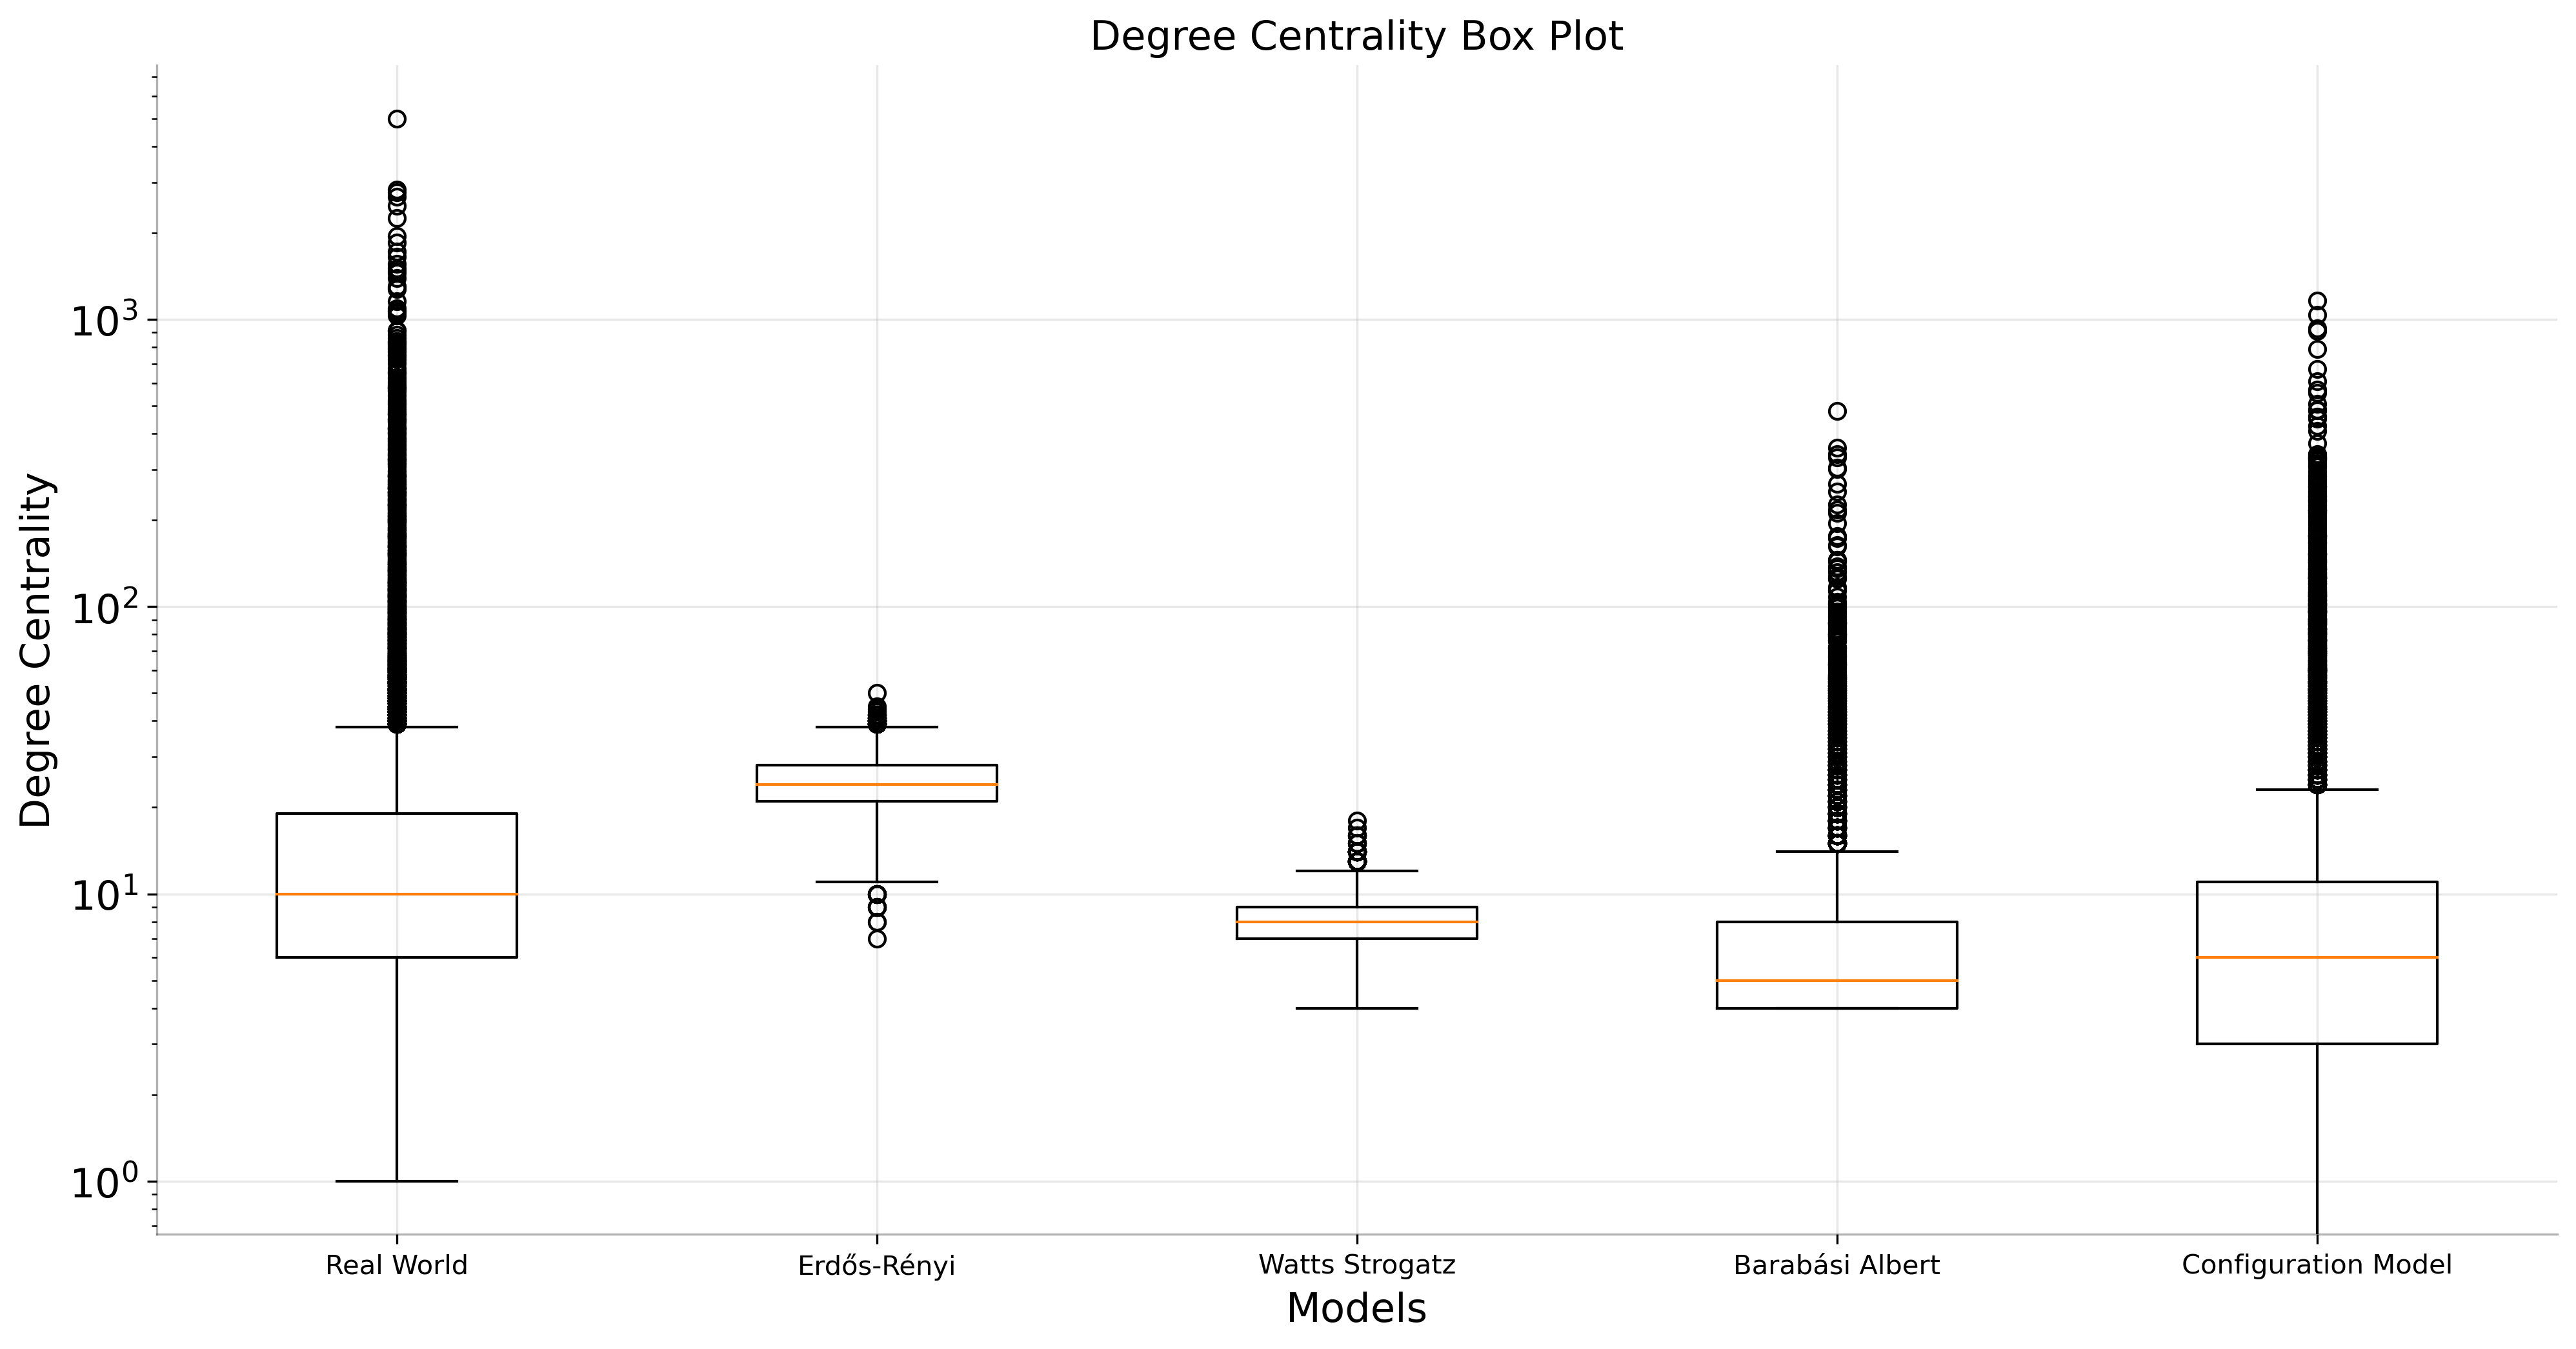

In [14]:
box_plot(degree_data, "Degree Centrality")

In [15]:
def dist_plot(data, title):
    fig = plt.figure(figsize = (16,8), dpi = 300)
    ax = fig.add_subplot(111)
    for k, v in data.items():
        sns.distplot(v["list"], label = v["name"], hist = False)
    
    
    fontsize = 15
    
    plt.yticks(fontsize = fontsize, alpha = 1)
    plt.xlabel(title, fontsize = fontsize)
    plt.ylabel("Density", fontsize = fontsize)
    plt.title(title + " Density Plot", fontsize = fontsize)
    plt.legend(fontsize = fontsize)
    plt.grid(axis = 'both', alpha = .3)
    plt.xscale("log")
    
    # rimuovo i borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)   
    plt.show()

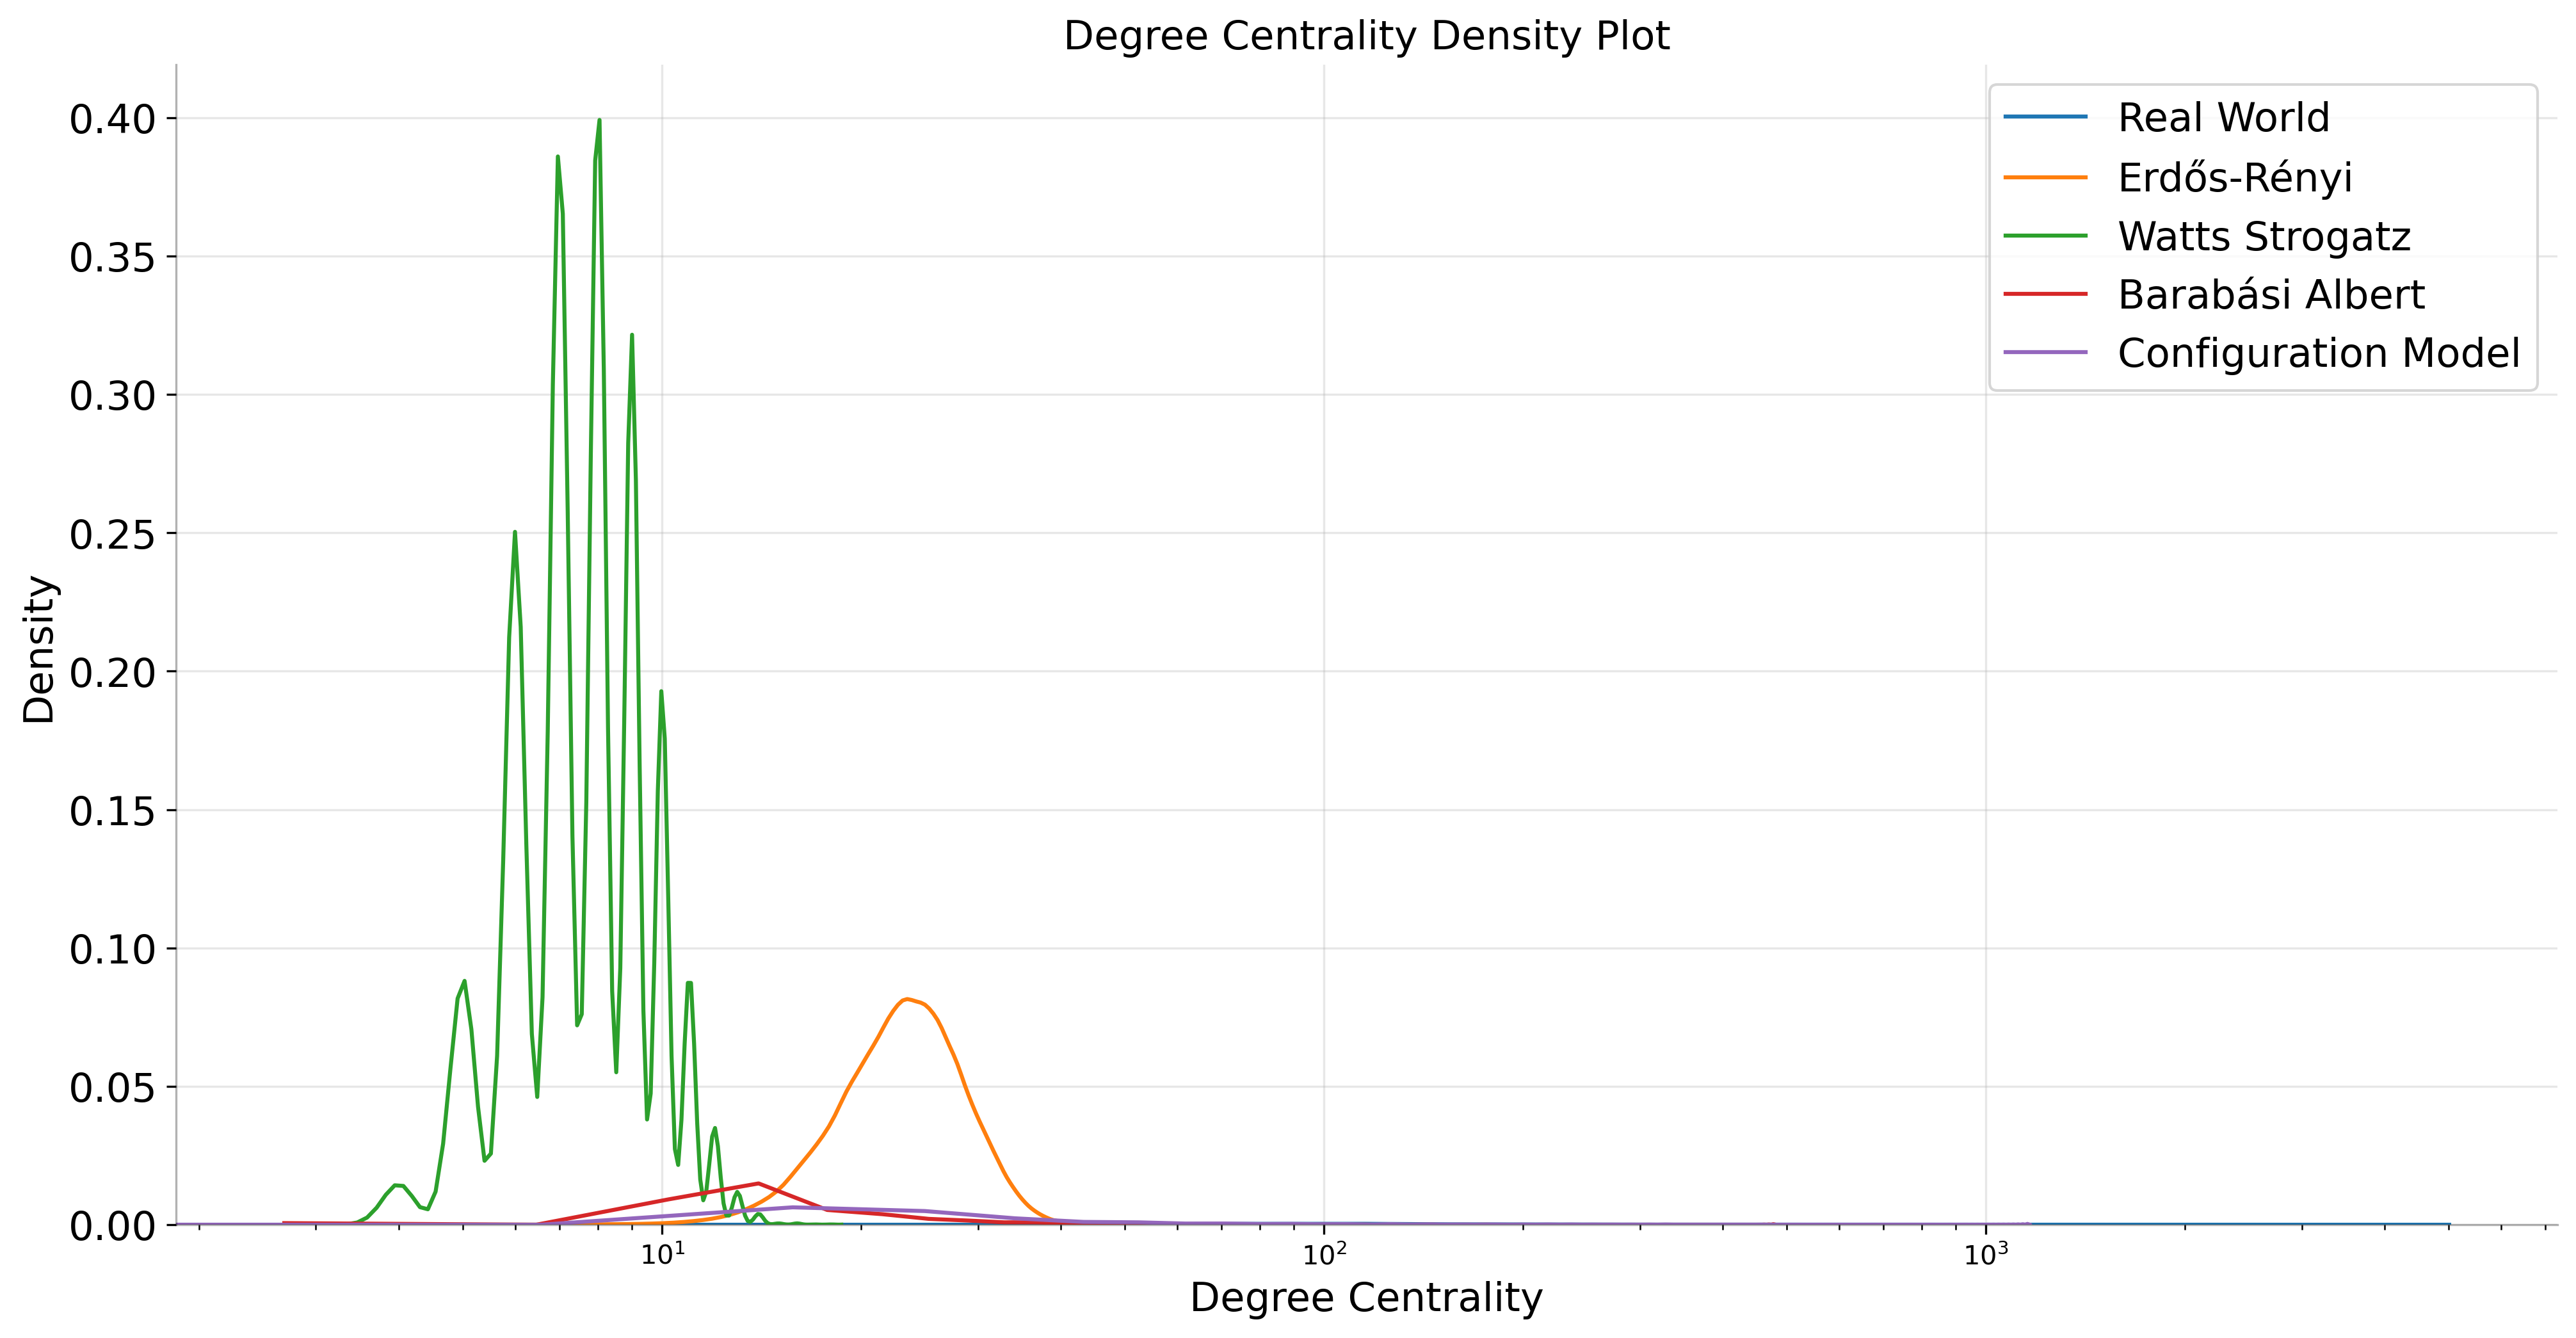

In [16]:
dist_plot(degree_data, "Degree Centrality")

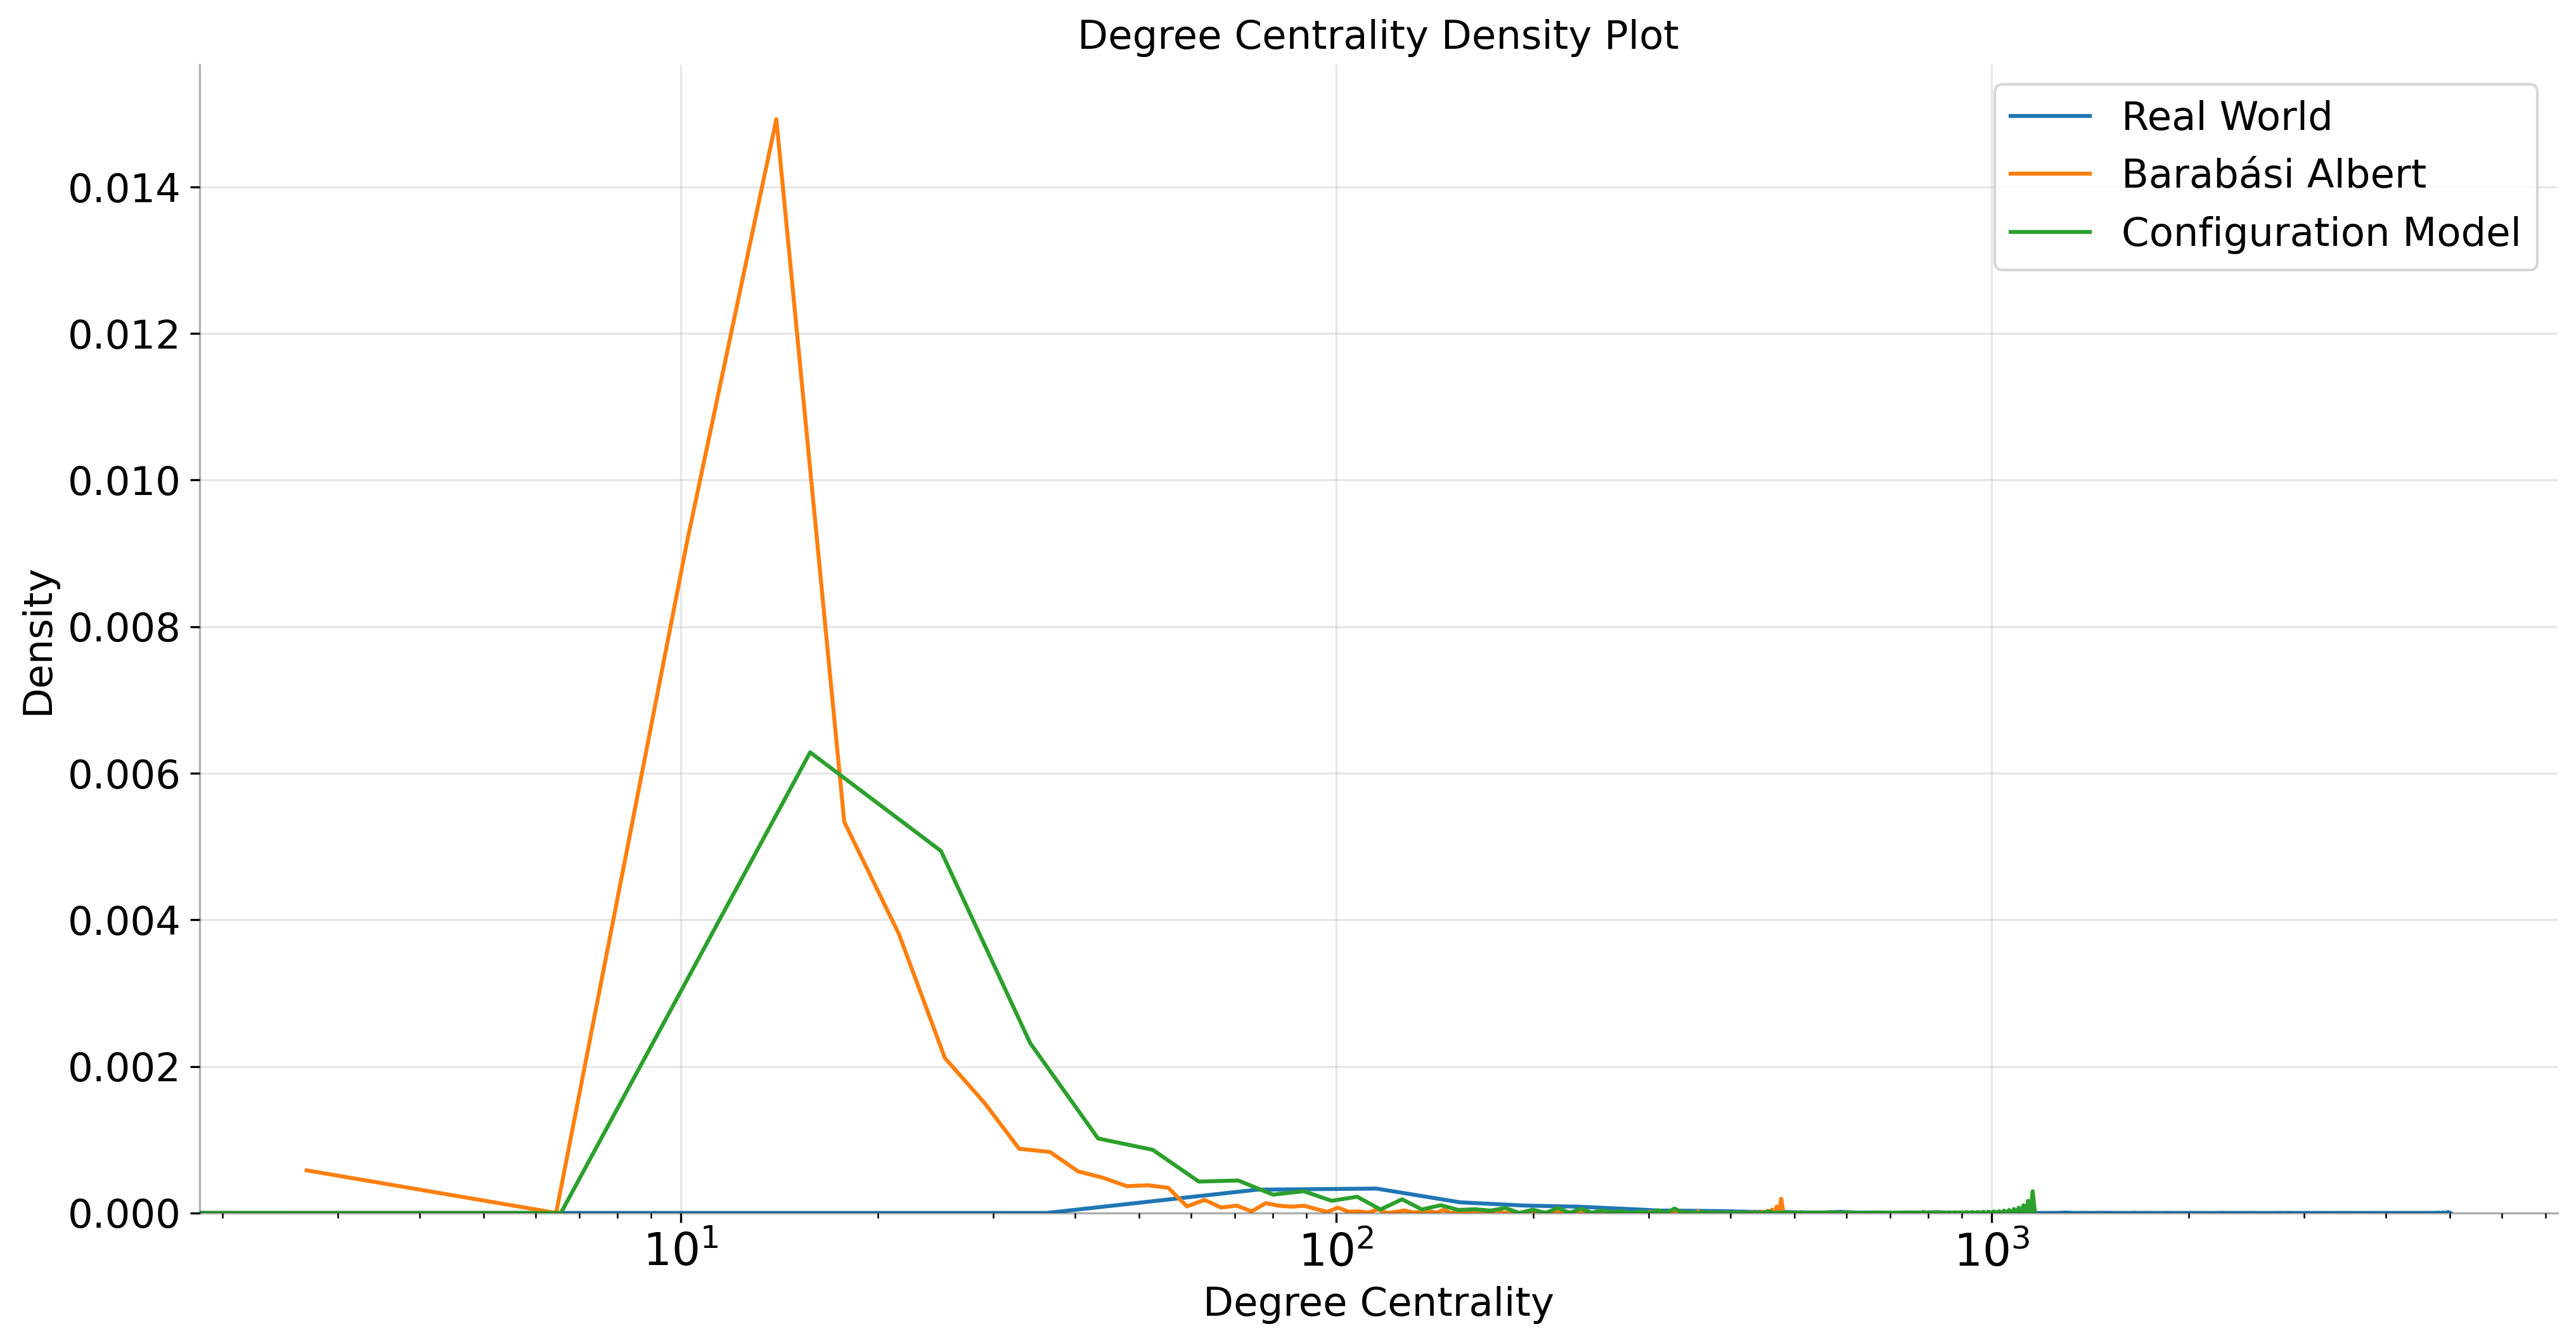

In [79]:
dist_plot(degree_data2, "Degree Centrality")

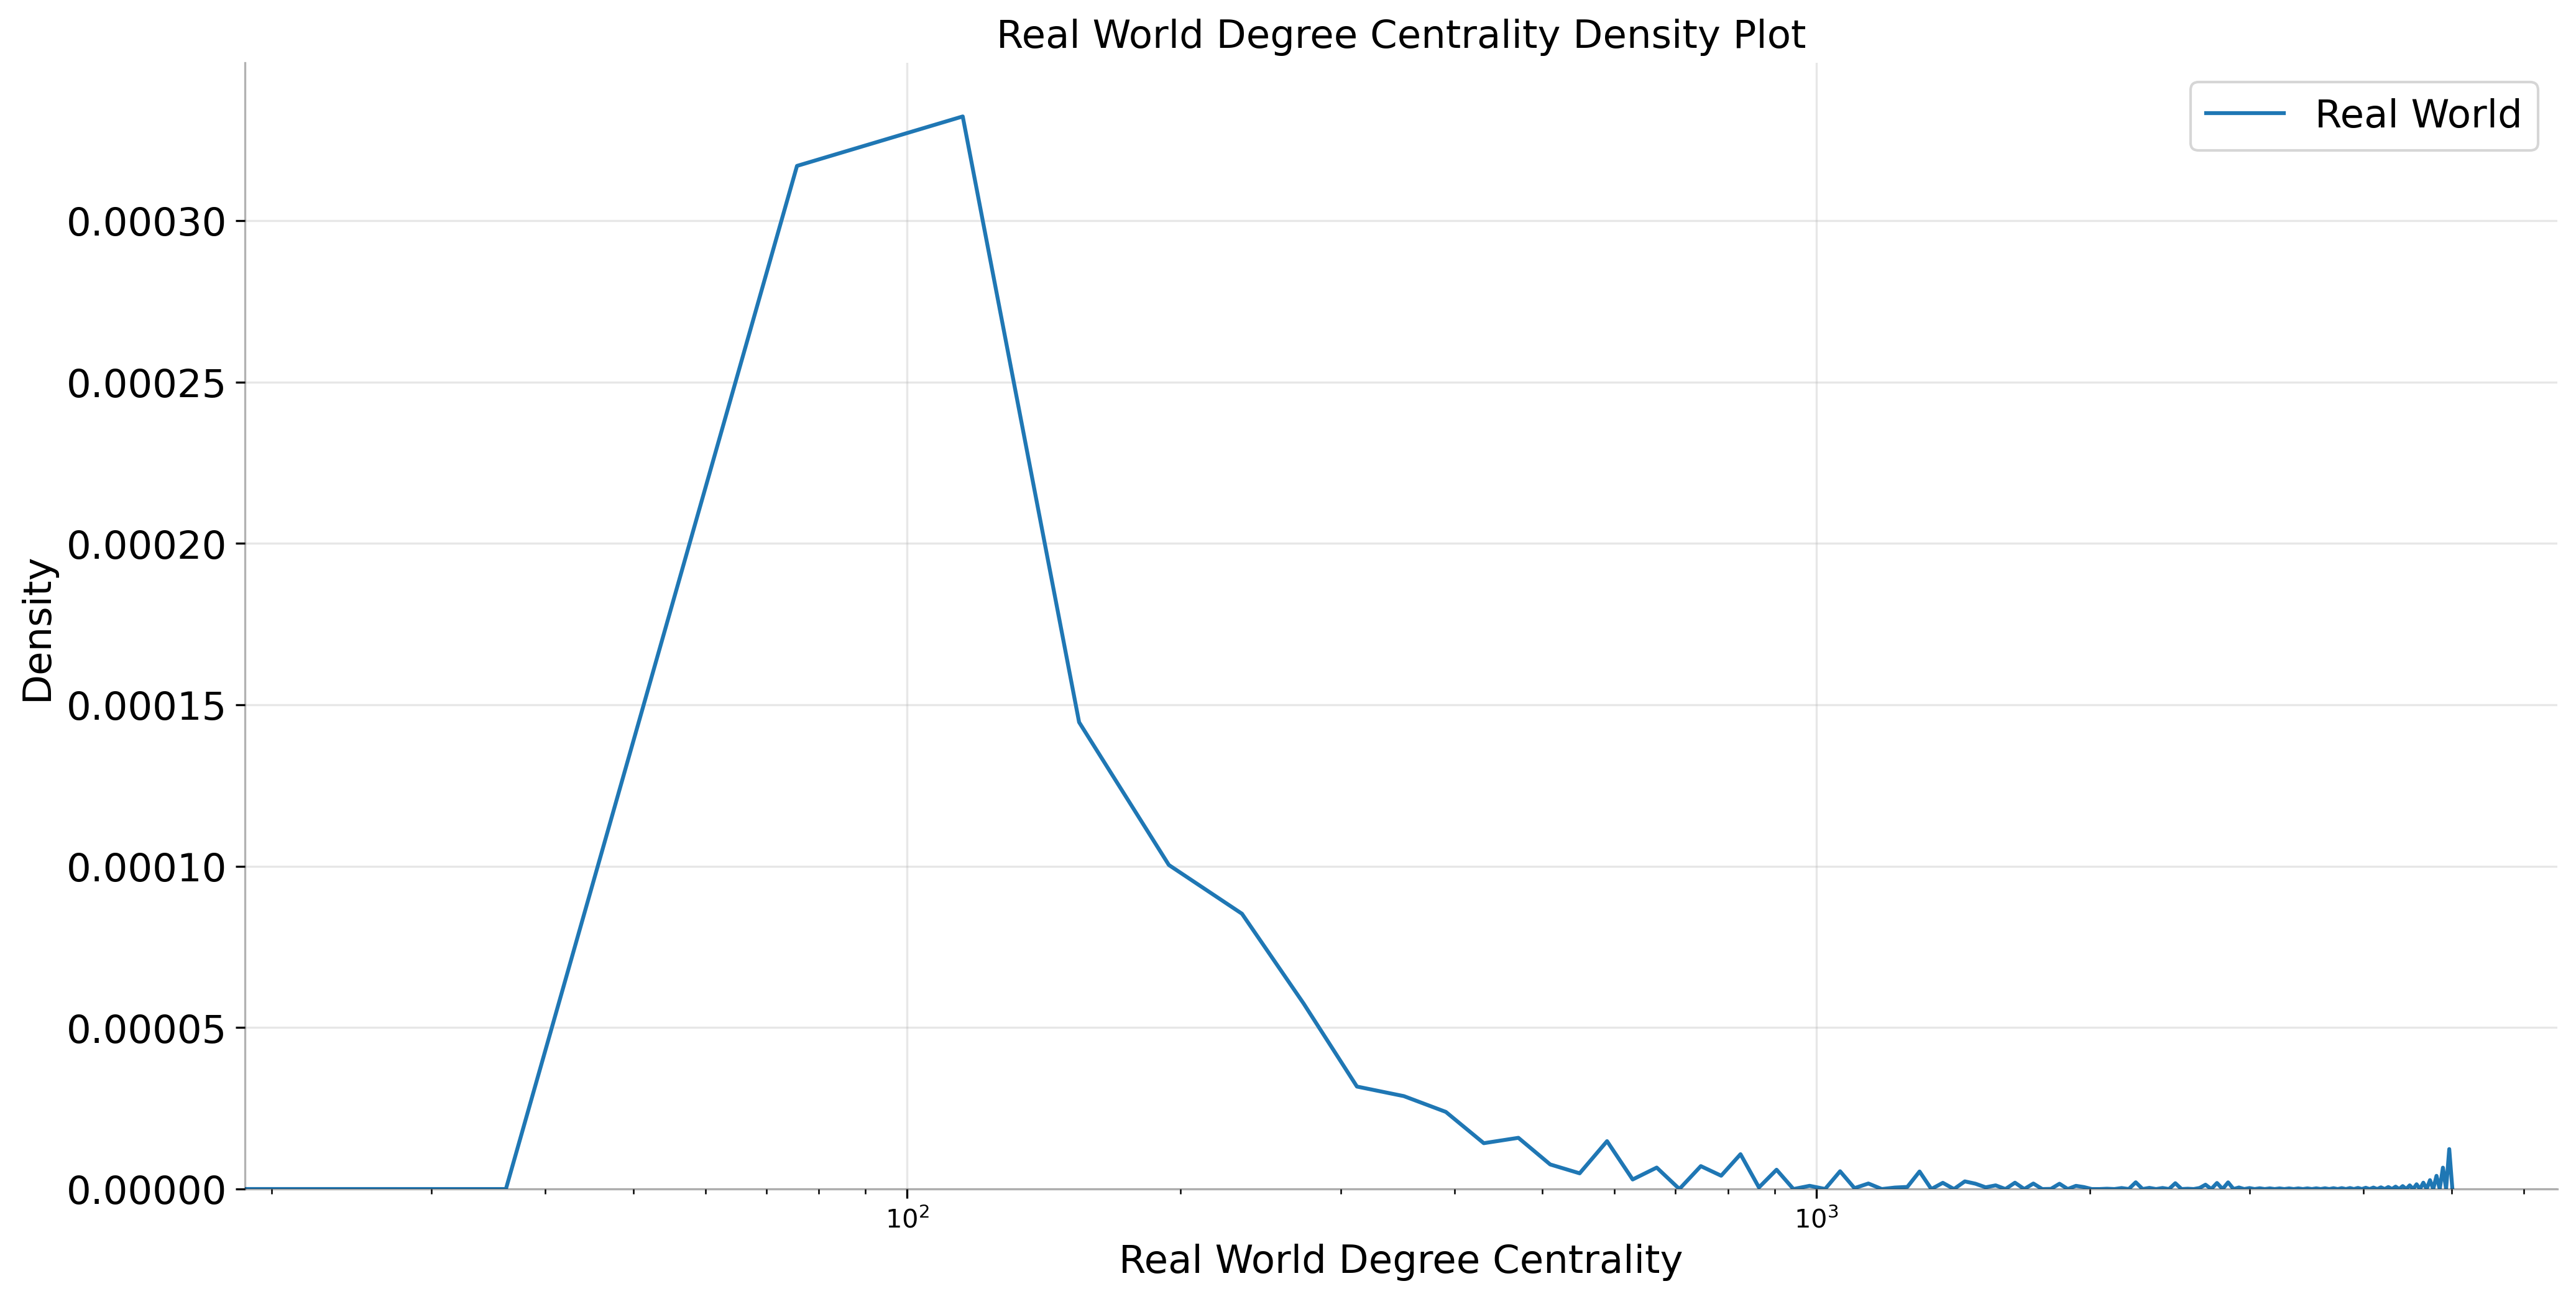

In [17]:
dist_plot(real_world_degree_data, "Real World Degree Centrality")

# Connectivity-Based Centrality

### Eigenvector Centrality

In [18]:
eigenvector_centrality = nx.eigenvector_centrality(G)

In [19]:
eigenvector_centrality = {k: v for k, v in sorted(eigenvector_centrality.items(), key = lambda item: item[1], reverse = True)}

In [20]:
dict(itertools.islice(eigenvector_centrality.items(), 10))#Top Ten

{'9666': 0.19454383388584434,
 '4235': 0.158859386553185,
 '1784': 0.15555716368378678,
 '9820': 0.13026470514603336,
 '4861': 0.12144225316898988,
 '1504': 0.11170712226596022,
 '10211': 0.10987915158372685,
 '12907': 0.1085665757017822,
 '19298': 0.09827640785240559,
 '3014': 0.0975155229578505}

In [21]:
real_world_eigenvector_list = list(eigenvector_centrality.values())

### ER EigenVector Centrality

In [22]:
er_eigenvector_centrality = nx.eigenvector_centrality(er)
er_eigenvector_centrality = {k: v for k, v in sorted(er_eigenvector_centrality.items(), key = lambda item: item[1], reverse = True)}
er_eigenvector_list = list(er_eigenvector_centrality.values())

### WS EigenVector Centrality

In [23]:
ws_eigenvector_centrality = nx.eigenvector_centrality(ws)
ws_eigenvector_centrality = {k: v for k, v in sorted(ws_eigenvector_centrality.items(), key = lambda item: item[1], reverse = True)}
ws_eigenvector_list = list(ws_eigenvector_centrality.values())

### BA EigenVector Centrality

In [24]:
ba_eigenvector_centrality = nx.eigenvector_centrality(ba)
ba_eigenvector_centrality = {k: v for k, v in sorted(ba_eigenvector_centrality.items(), key = lambda item: item[1], reverse = True)}
ba_eigenvector_list = list(ba_eigenvector_centrality.values())

### CM EigenVector Centrality

In [25]:
cm_eigenvector_centrality = nx.eigenvector_centrality(cm)
cm_eigenvector_centrality = {k: v for k, v in sorted(cm_eigenvector_centrality.items(), key = lambda item: item[1], reverse = True)}
cm_eigenvector_list = list(cm_eigenvector_centrality.values())

In [26]:
eigenvector_data = {
    "real_word":{
        "name":"Real World",
        "list":real_world_eigenvector_list
    },
    "erdos_renyi":{
        "name":"Erdős-Rényi",
        "list":er_eigenvector_list
    },
    "watts_strogatz":{
        "name":"Watts Strogatz",
        "list":ws_eigenvector_list
    },
    "barabasi–Albert":{
        "name":"Barabási Albert",
        "list":ba_eigenvector_list
    },
    "configuration_model":{
        "name":"Configuration Model",
        "list":cm_eigenvector_list
    }
}
real_world_eigenvector_data = {
    "real_word":{
        "name":"Real World",
        "list":real_world_eigenvector_list
    }
}

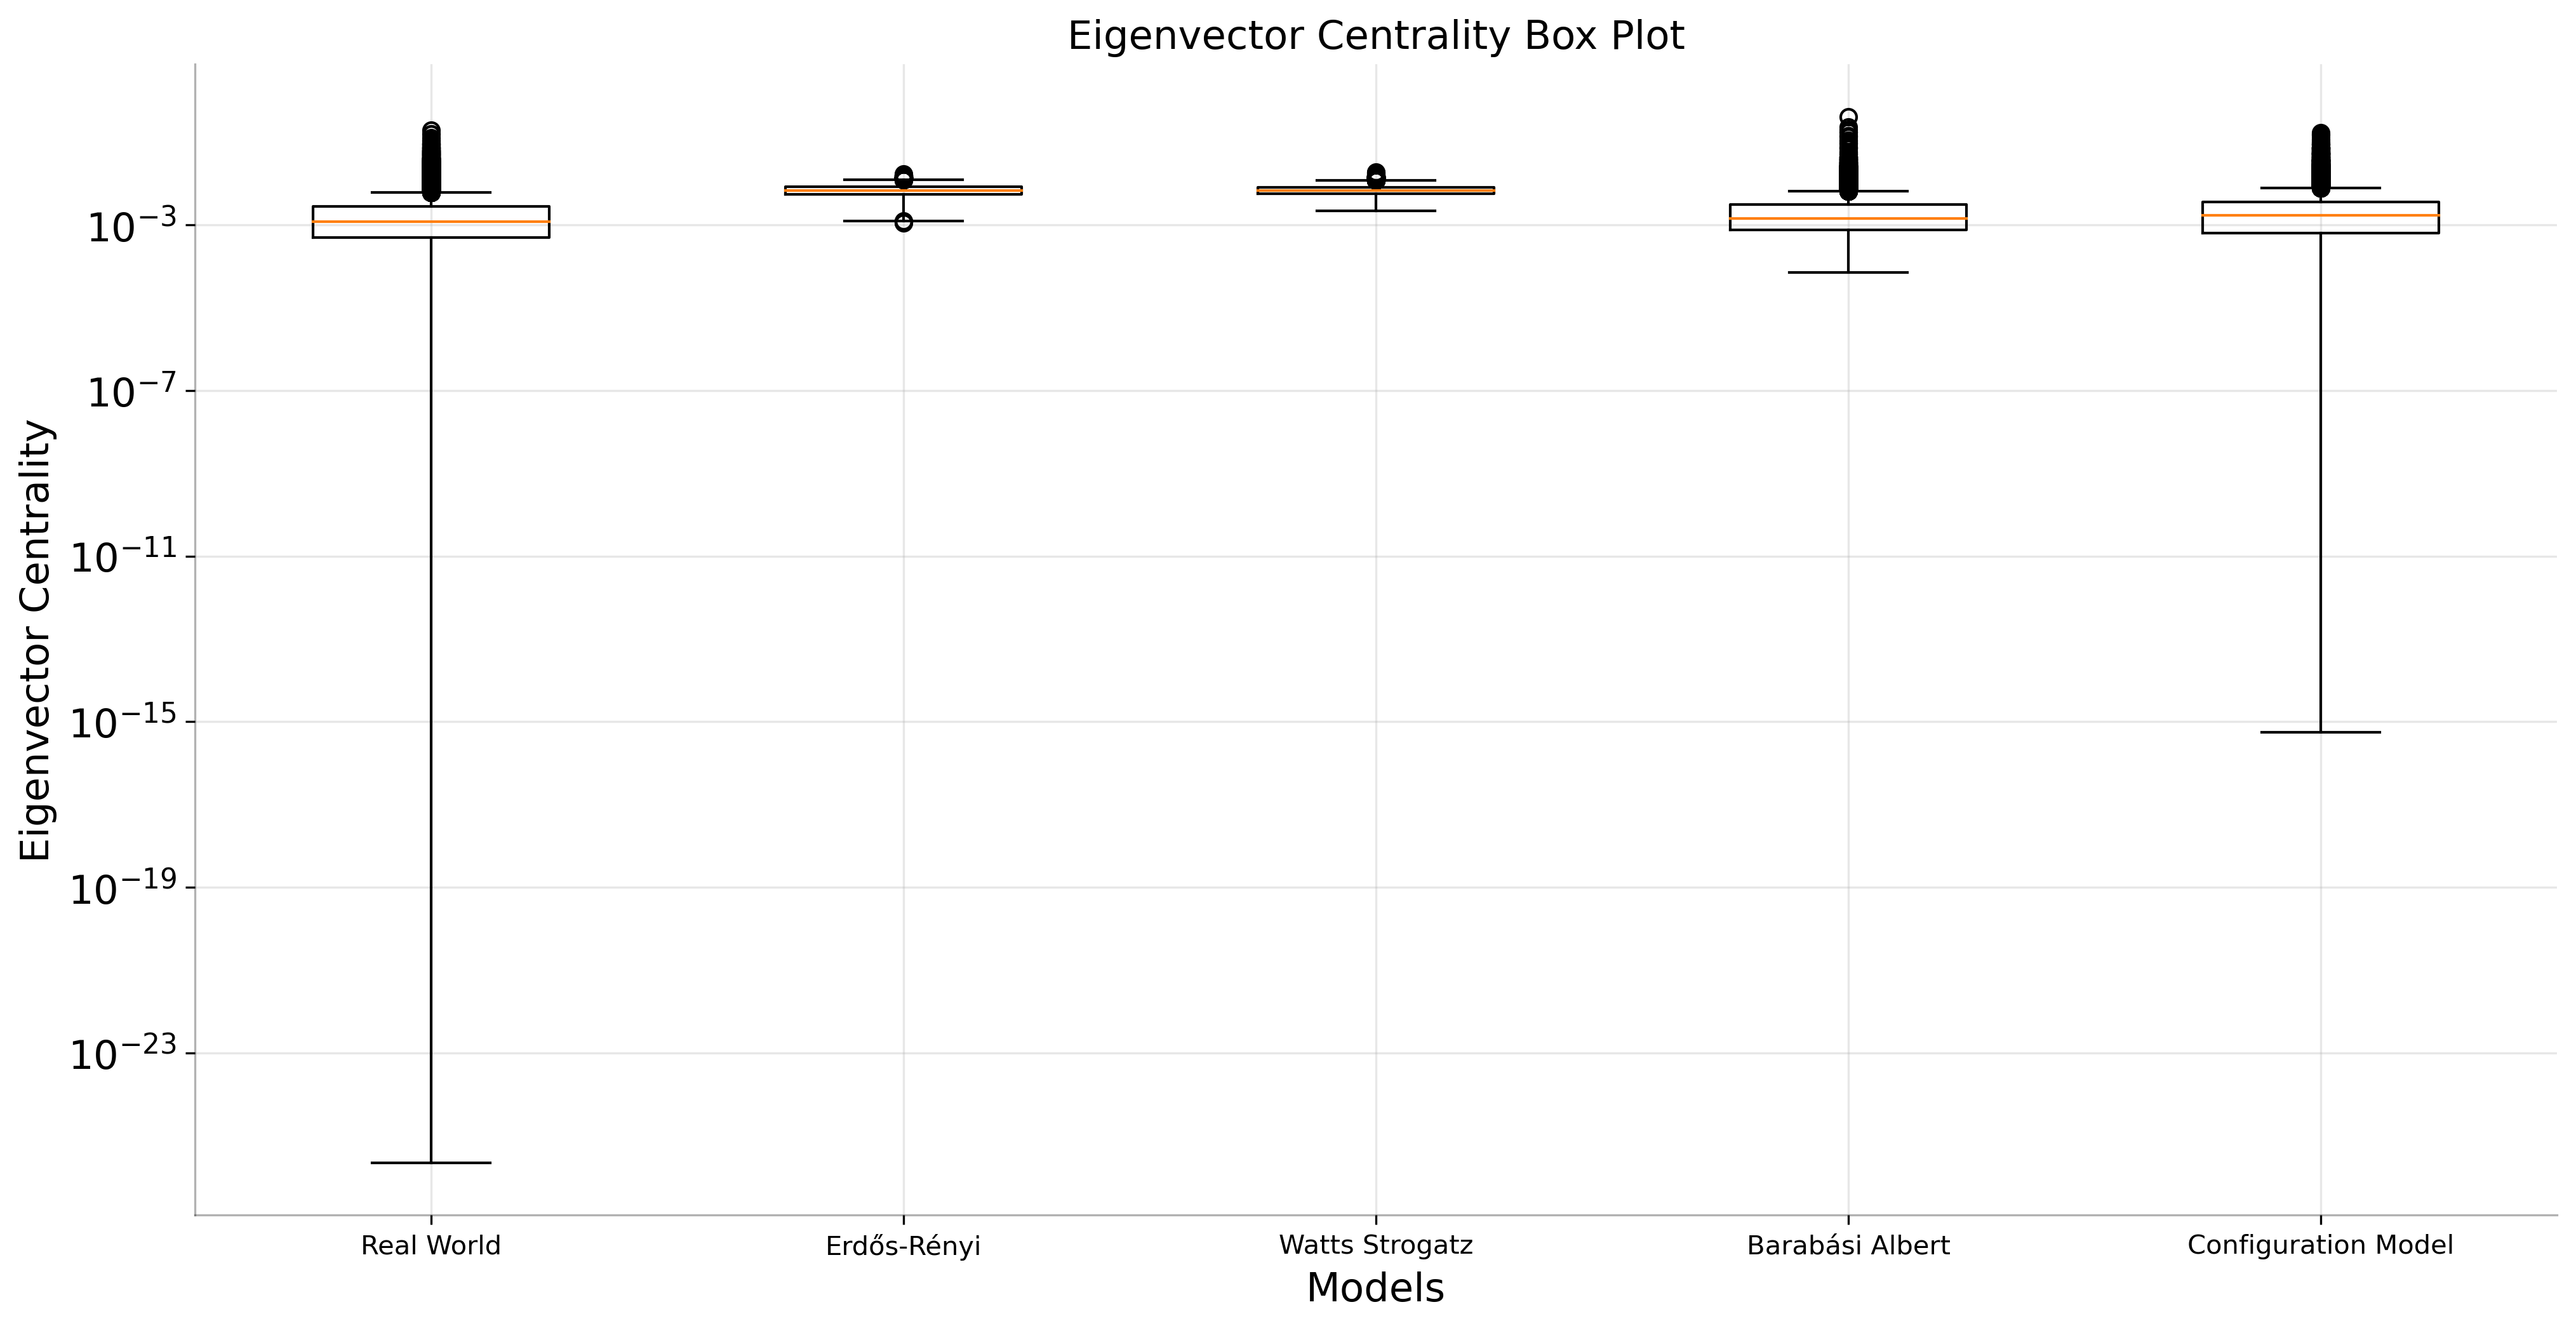

In [27]:
box_plot(eigenvector_data, "Eigenvector Centrality")

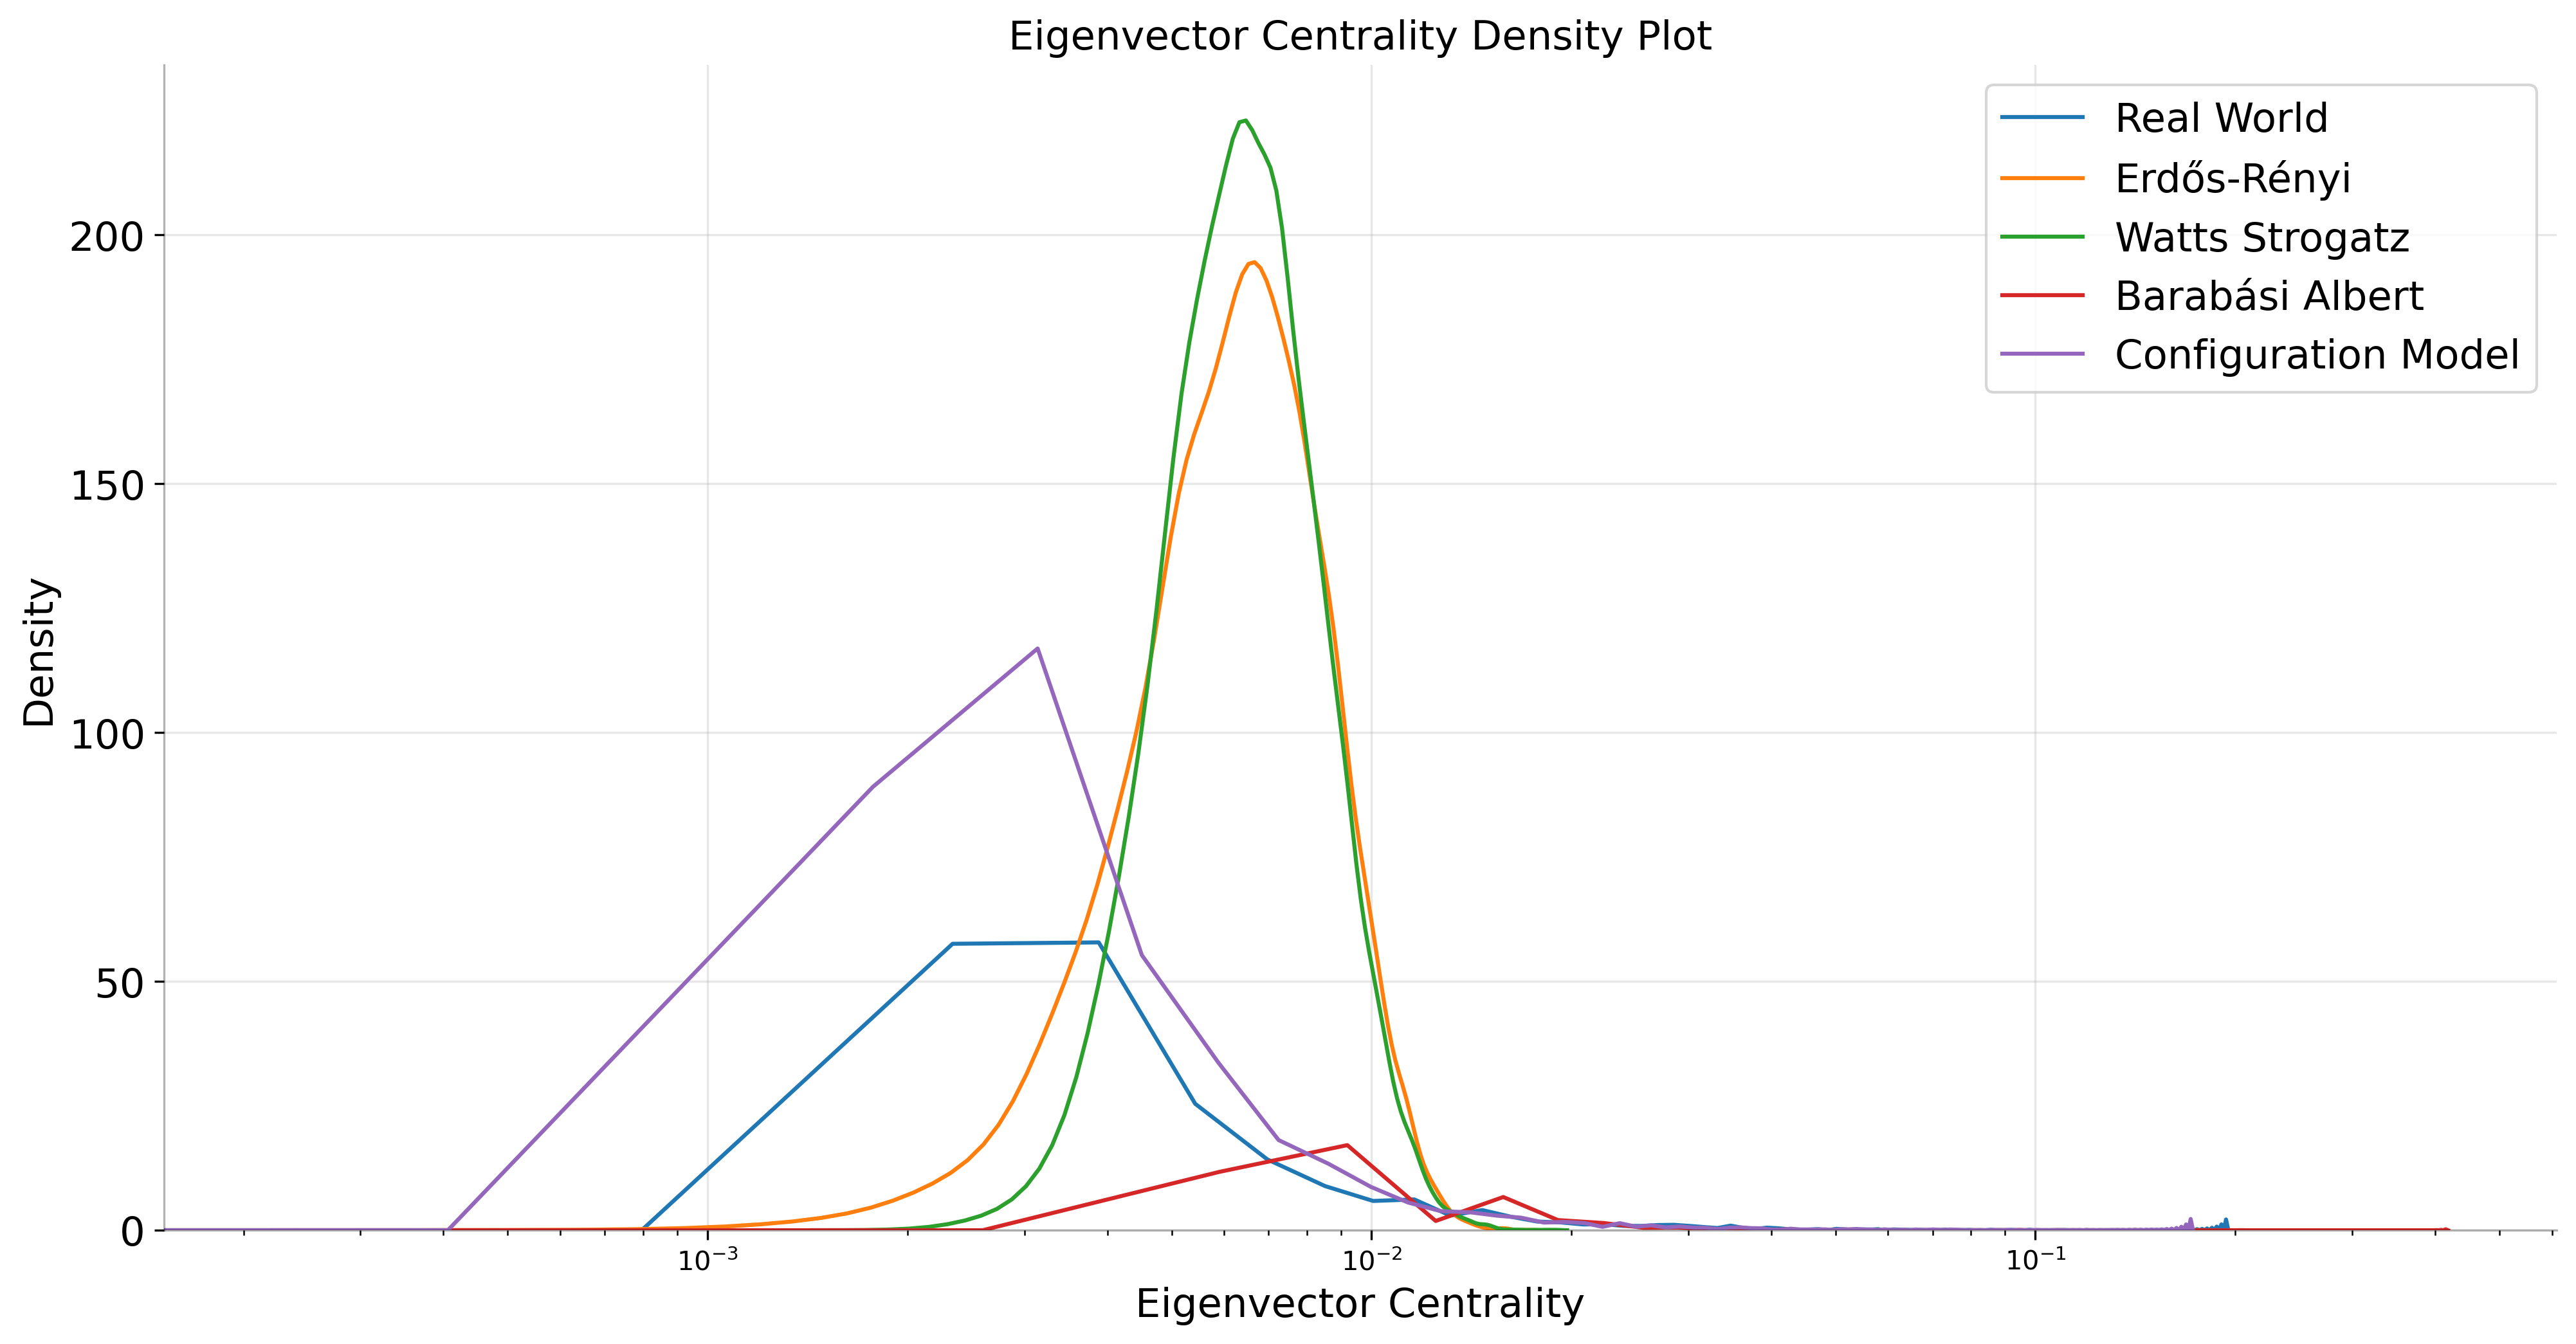

In [28]:
dist_plot(eigenvector_data, "Eigenvector Centrality")

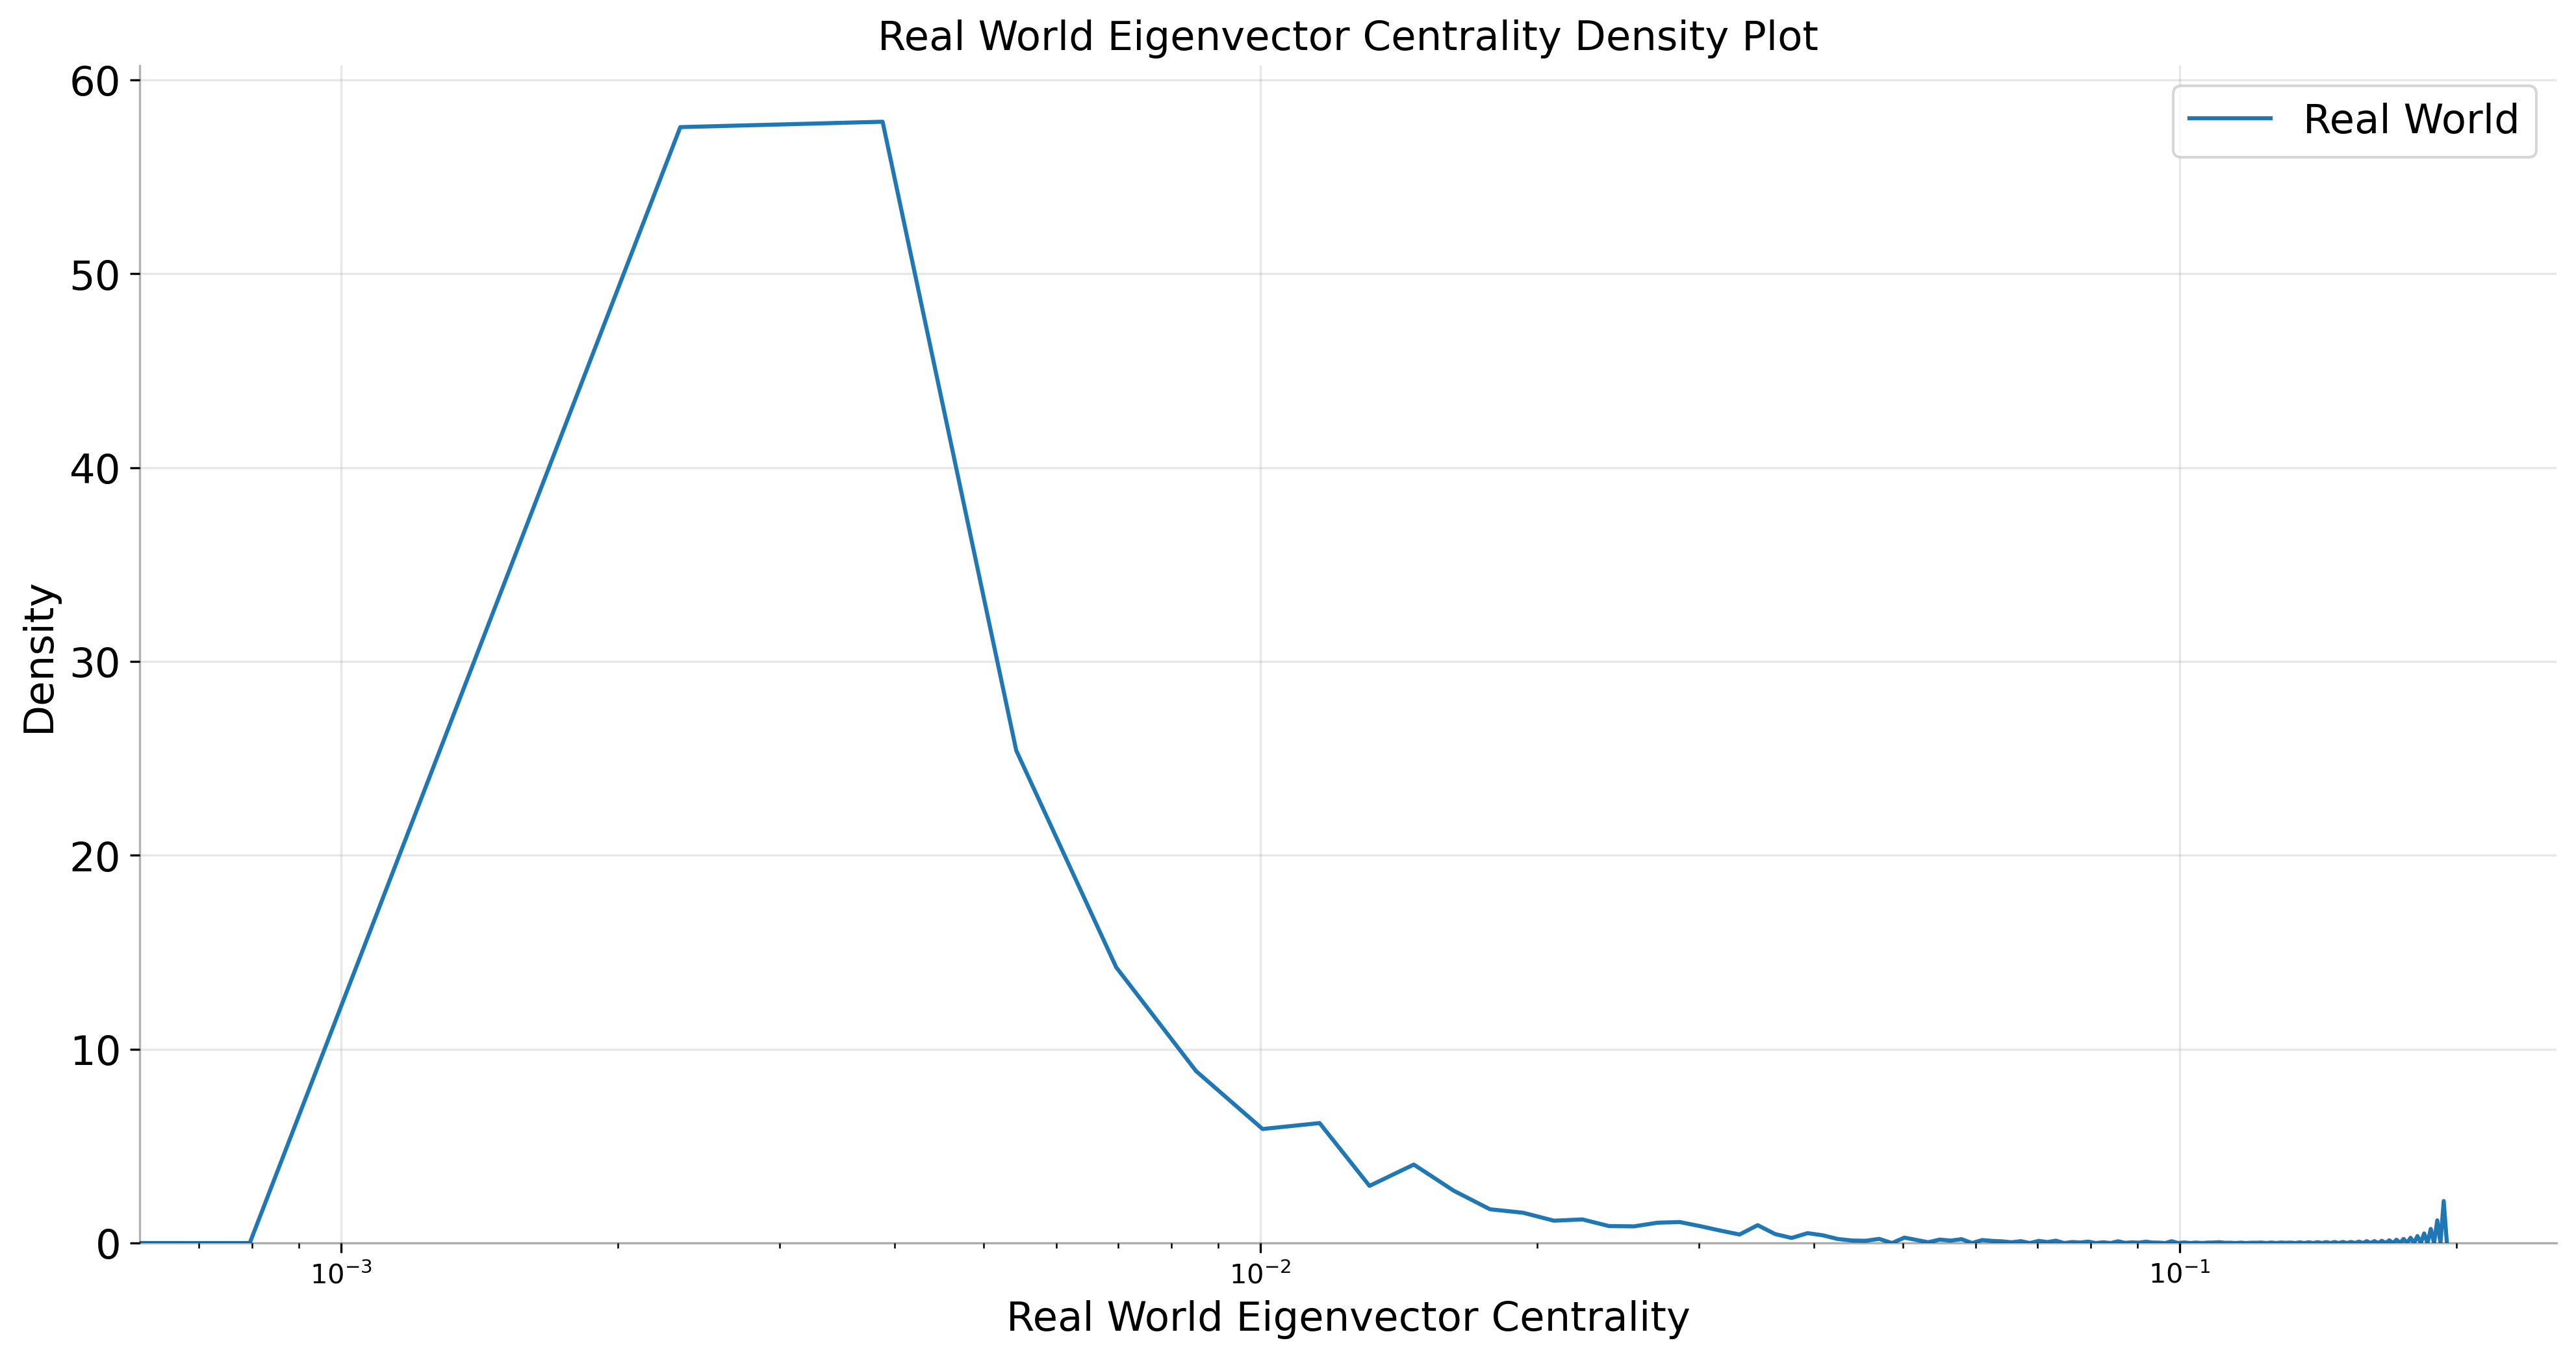

In [29]:
dist_plot(real_world_eigenvector_data, "Real World Eigenvector Centrality")

### Page Rank Centrality

In [30]:
page_rank_centrality = nx.pagerank(G, alpha = 0.85)

In [31]:
page_rank_centrality = {k: v for k, v in sorted(page_rank_centrality.items(), key = lambda item: item[1], reverse = True)}

In [32]:
dict(itertools.islice(page_rank_centrality.items(), 10))# top Ten

{'9666': 0.009624999567693223,
 '13169': 0.00835028252858104,
 '8732': 0.00622555455362348,
 '19298': 0.005377897476327036,
 '4235': 0.0044998668485512336,
 '10211': 0.0044776035346630666,
 '1784': 0.00414882135237821,
 '7777': 0.003963721265936163,
 '2339': 0.003498279856021074,
 '14531': 0.0034296495505036547}

In [33]:
real_world_pagerank_list = list(page_rank_centrality.values())

### ER PageRank Centrality

In [34]:
er_page_rank_centrality = nx.pagerank(er, alpha = 0.85)
er_page_rank_centrality = {k: v for k, v in sorted(er_page_rank_centrality.items(), key = lambda item: item[1], reverse = True)}
er_pagerank_list = list(er_page_rank_centrality.values())

### WS PageRank Centrality

In [35]:
ws_page_rank_centrality = nx.pagerank(ws, alpha = 0.85)
ws_page_rank_centrality = {k: v for k, v in sorted(ws_page_rank_centrality.items(), key = lambda item: item[1], reverse = True)}
ws_pagerank_list = list(ws_page_rank_centrality.values())

### BA PageRank Centrality

In [36]:
ba_page_rank_centrality = nx.pagerank(ba, alpha = 0.85)
ba_page_rank_centrality = {k: v for k, v in sorted(ba_page_rank_centrality.items(), key = lambda item: item[1], reverse = True)}
ba_pagerank_list = list(ba_page_rank_centrality.values())

### CM PageRank Centrality

In [37]:
cm_page_rank_centrality = nx.pagerank(cm, alpha = 0.85)
cm_page_rank_centrality = {k: v for k, v in sorted(cm_page_rank_centrality.items(), key = lambda item: item[1], reverse = True)}
cm_pagerank_list = list(cm_page_rank_centrality.values())

In [38]:
pagerank_data = {
    "real_word":{
        "name":"Real World",
        "list":real_world_pagerank_list
    },
    "erdos_renyi":{
        "name":"Erdős-Rényi",
        "list":er_pagerank_list
    },
    "watts_strogatz":{
        "name":"Watts Strogatz",
        "list":ws_pagerank_list
    },
    "barabasi–Albert":{
        "name":"Barabási Albert",
        "list":ba_pagerank_list
    },
    "configuration_model":{
        "name":"Configuration Model",
        "list":cm_pagerank_list
    }
}
real_world_pagerank_data = {
    "real_word":{
        "name":"Real World",
        "list":real_world_pagerank_list
    }
}

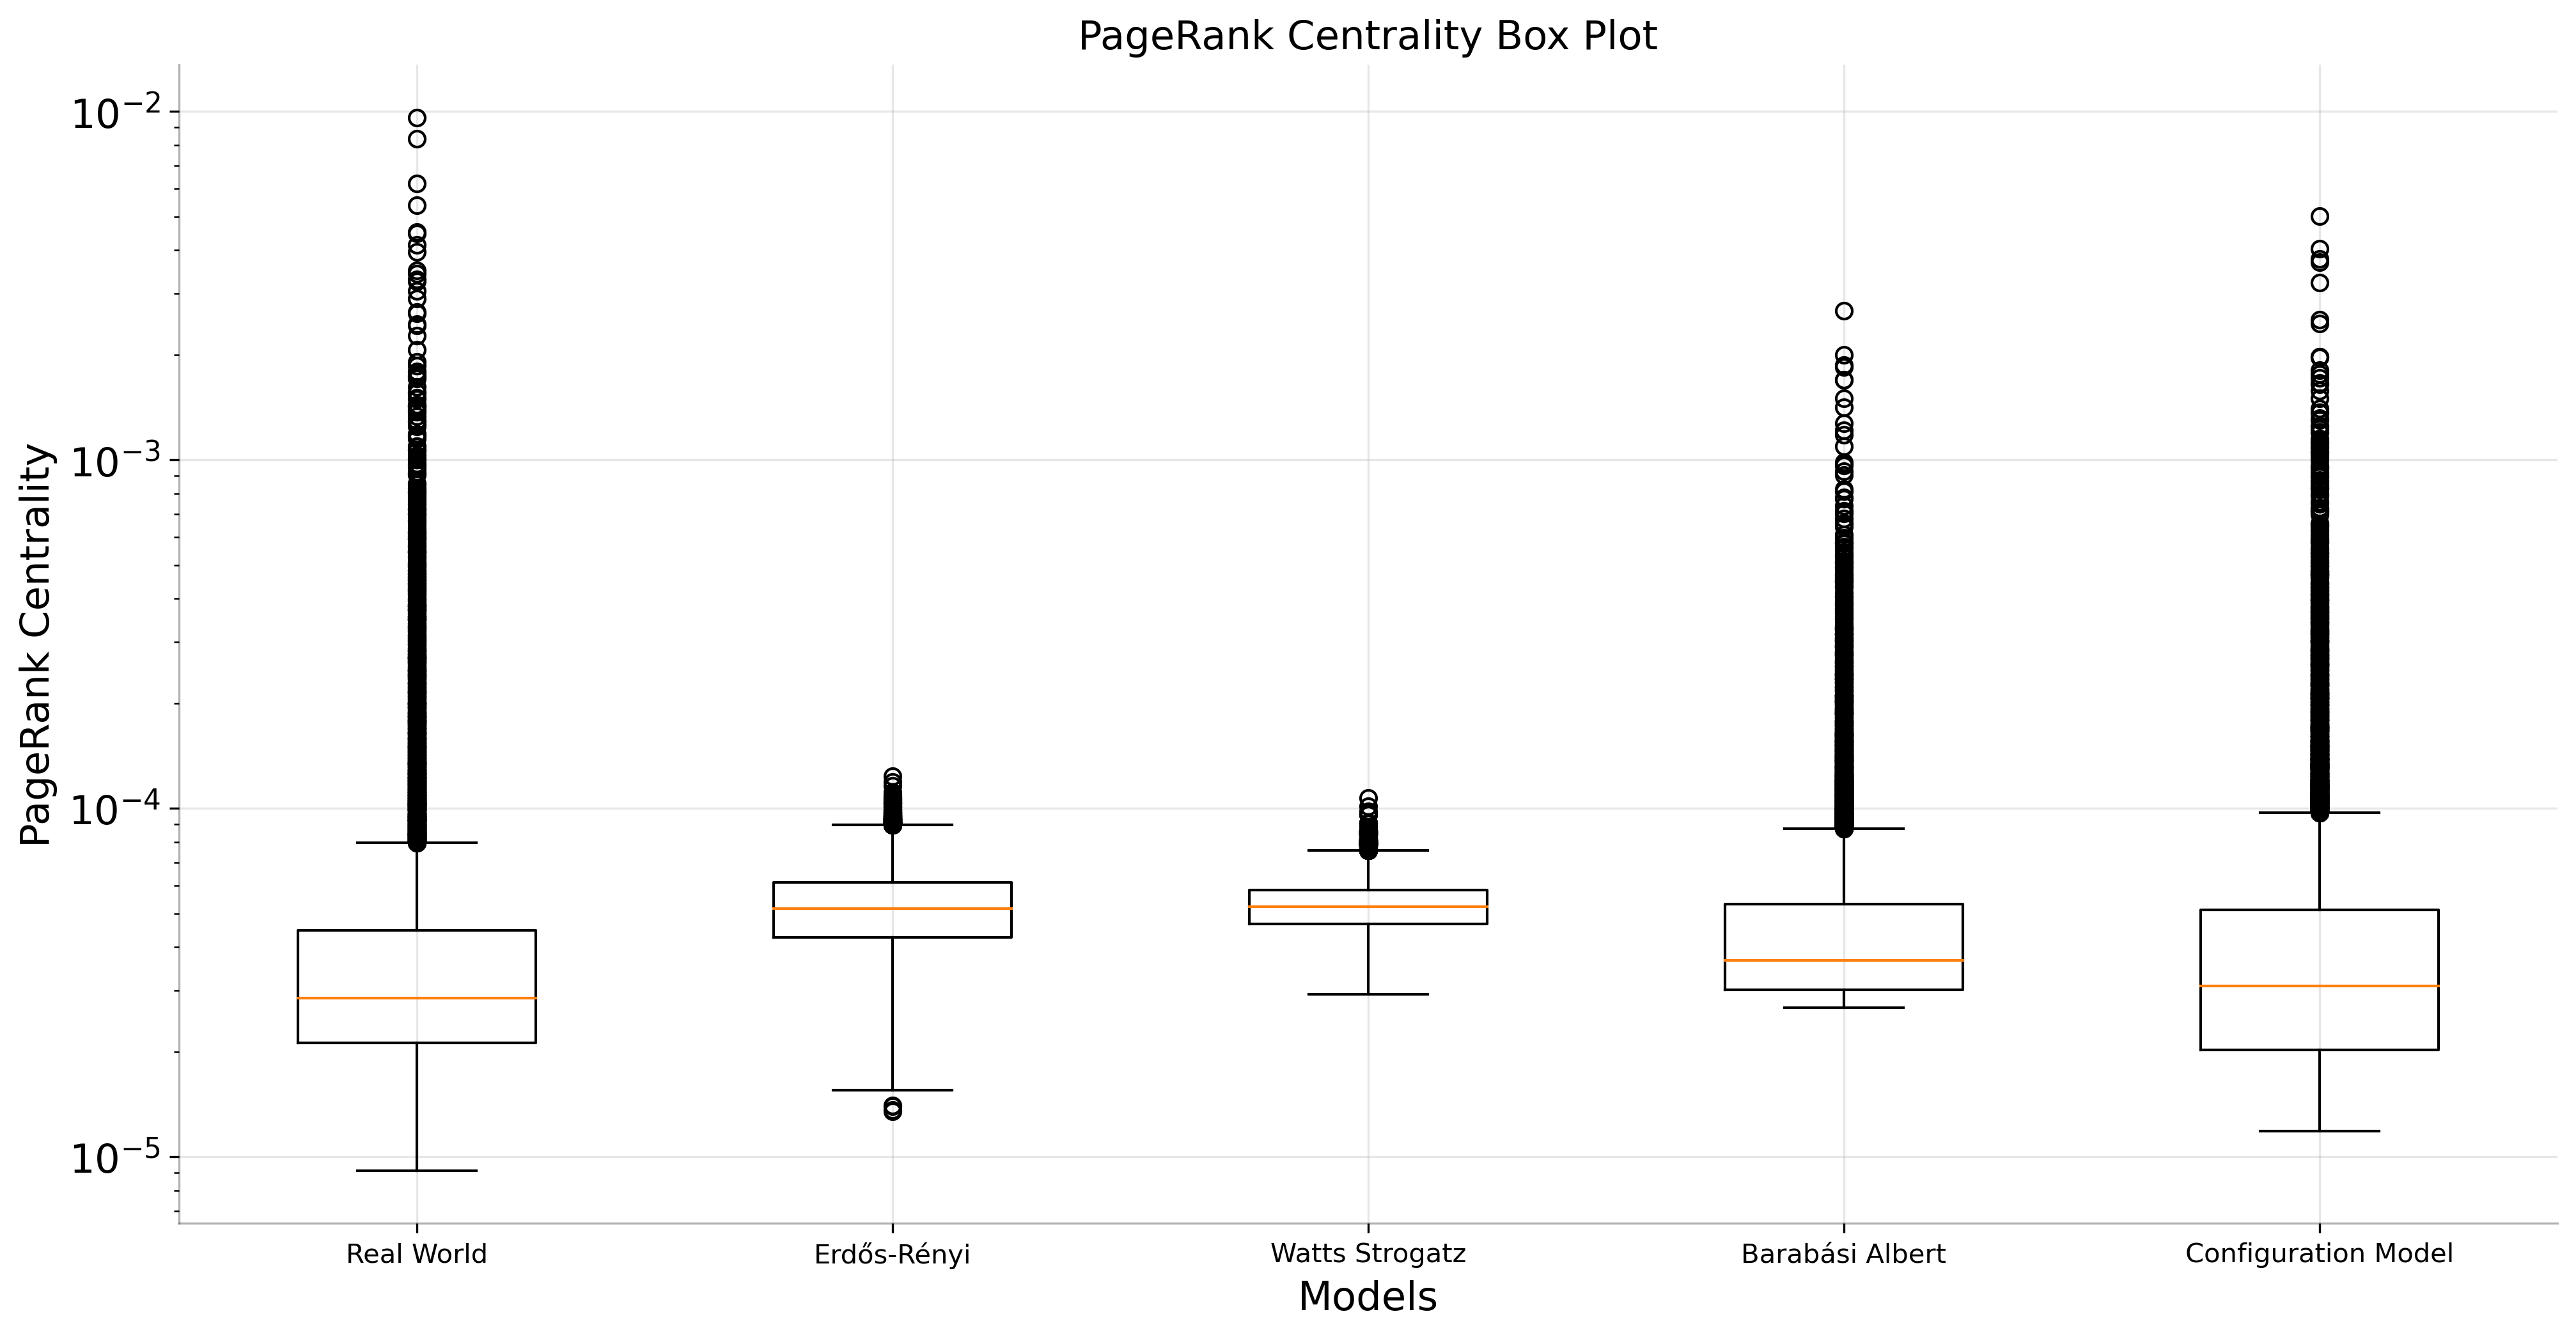

In [39]:
box_plot(pagerank_data, "PageRank Centrality")

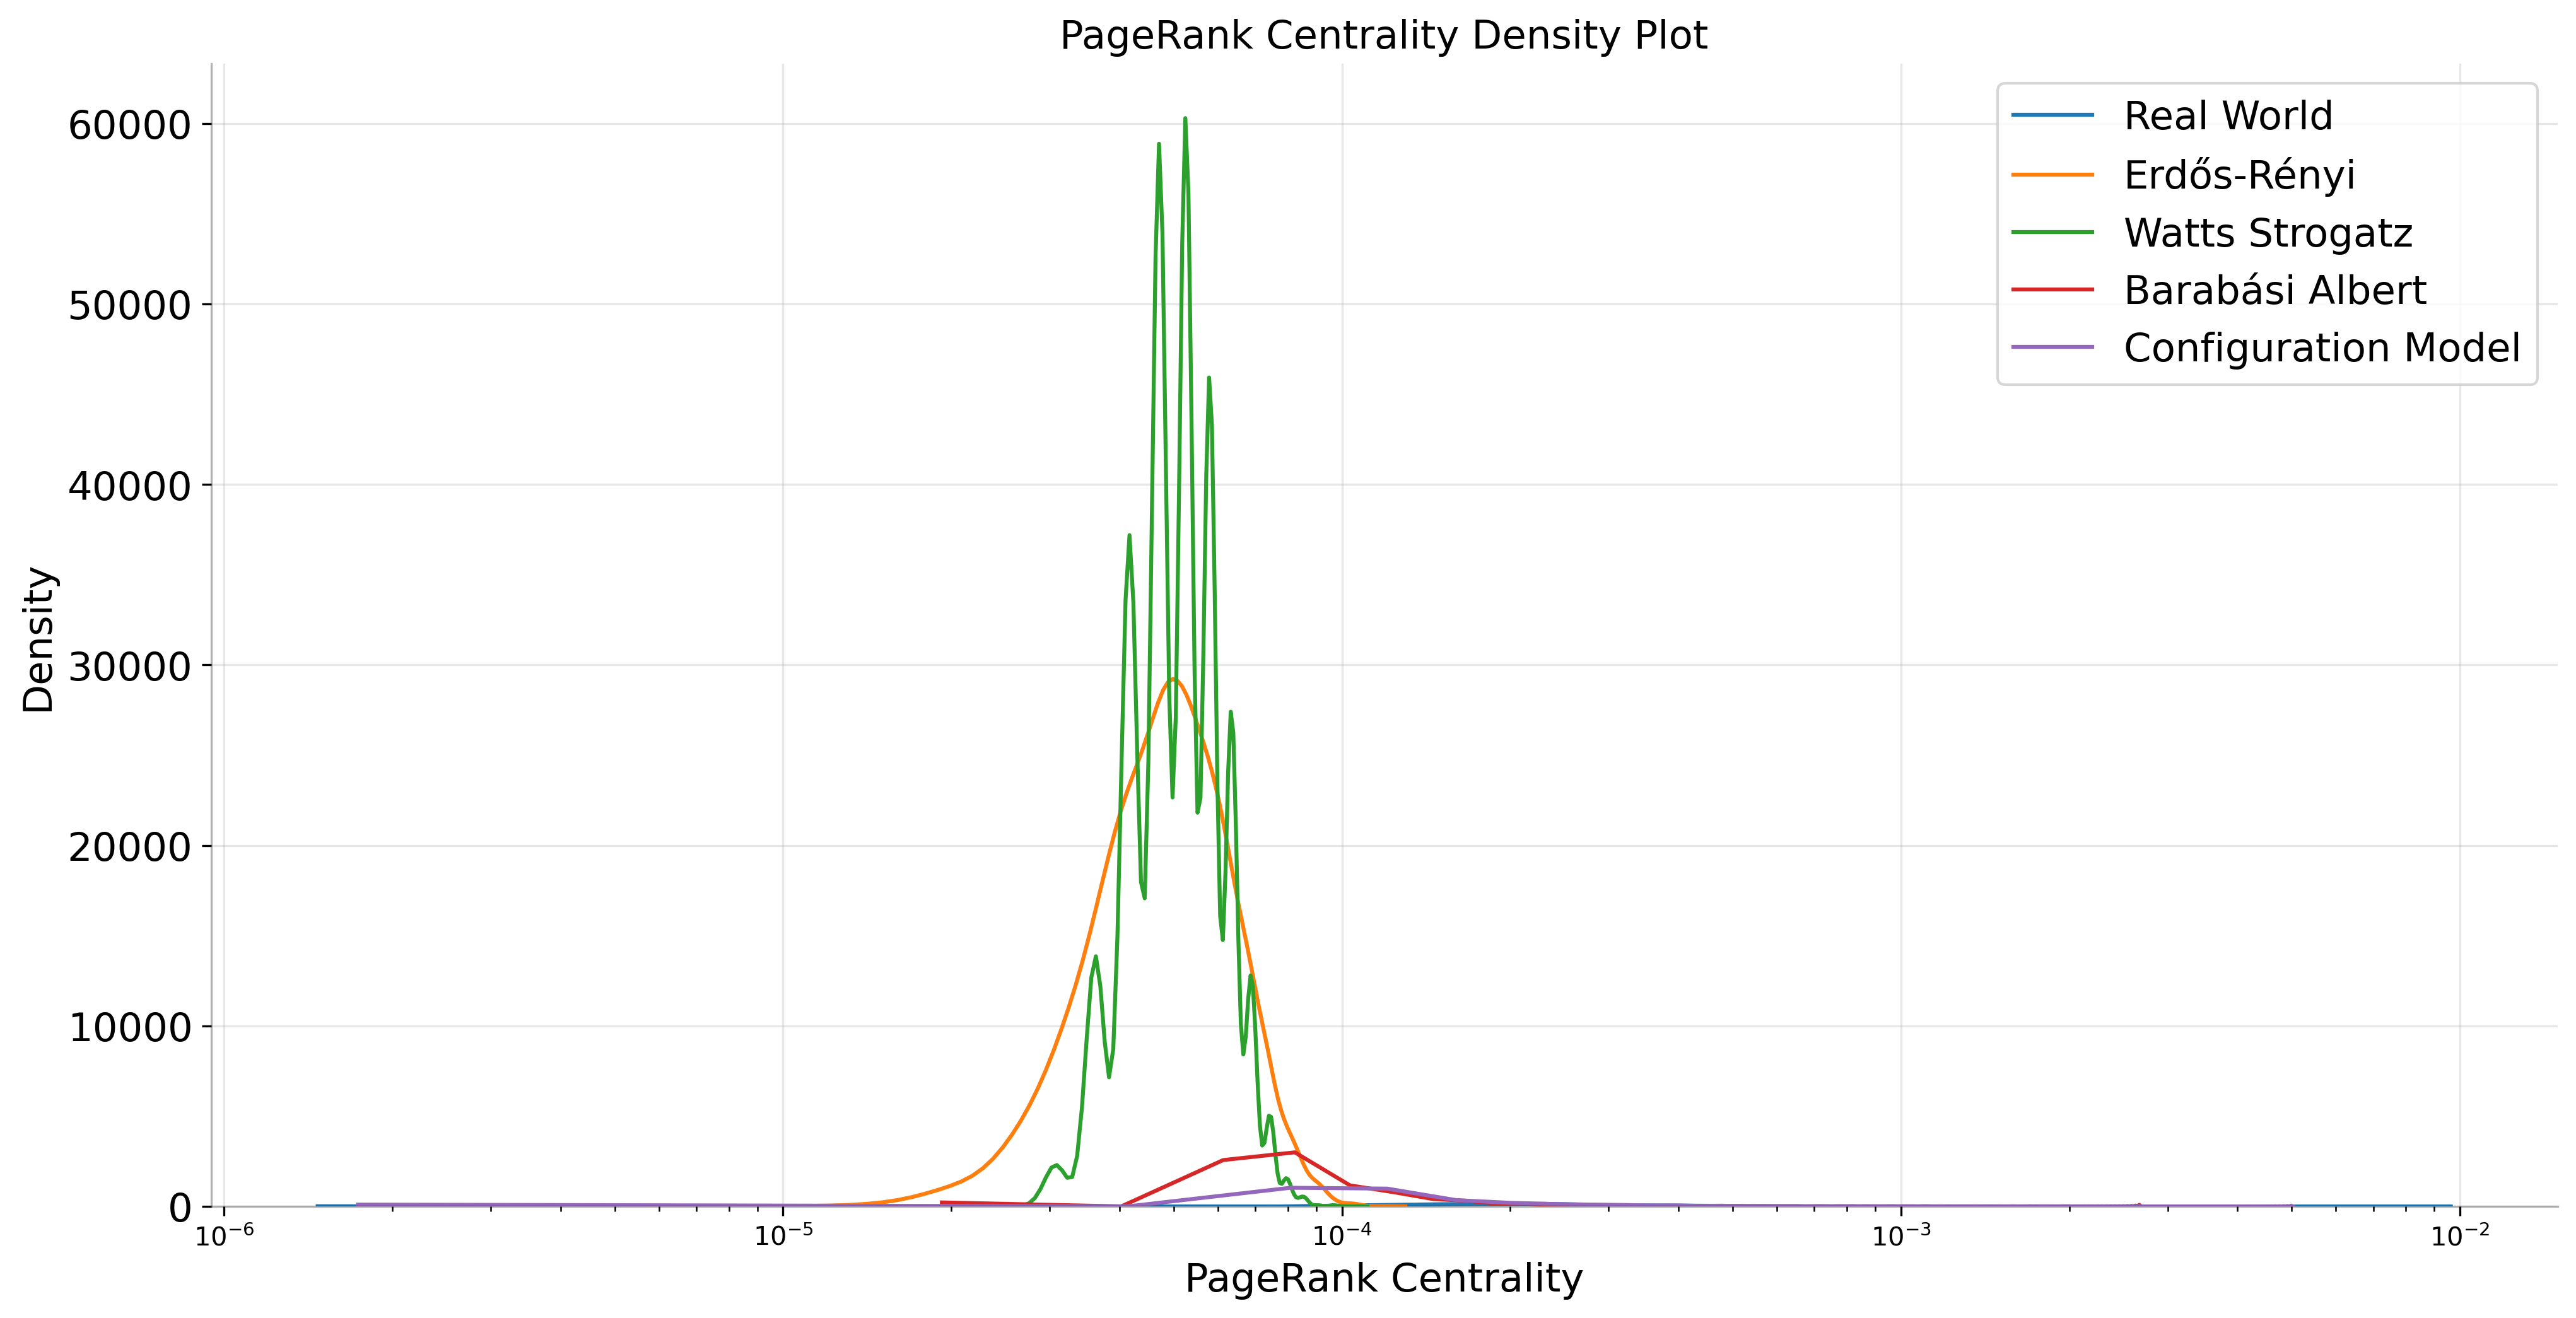

In [40]:
dist_plot(pagerank_data, "PageRank Centrality")

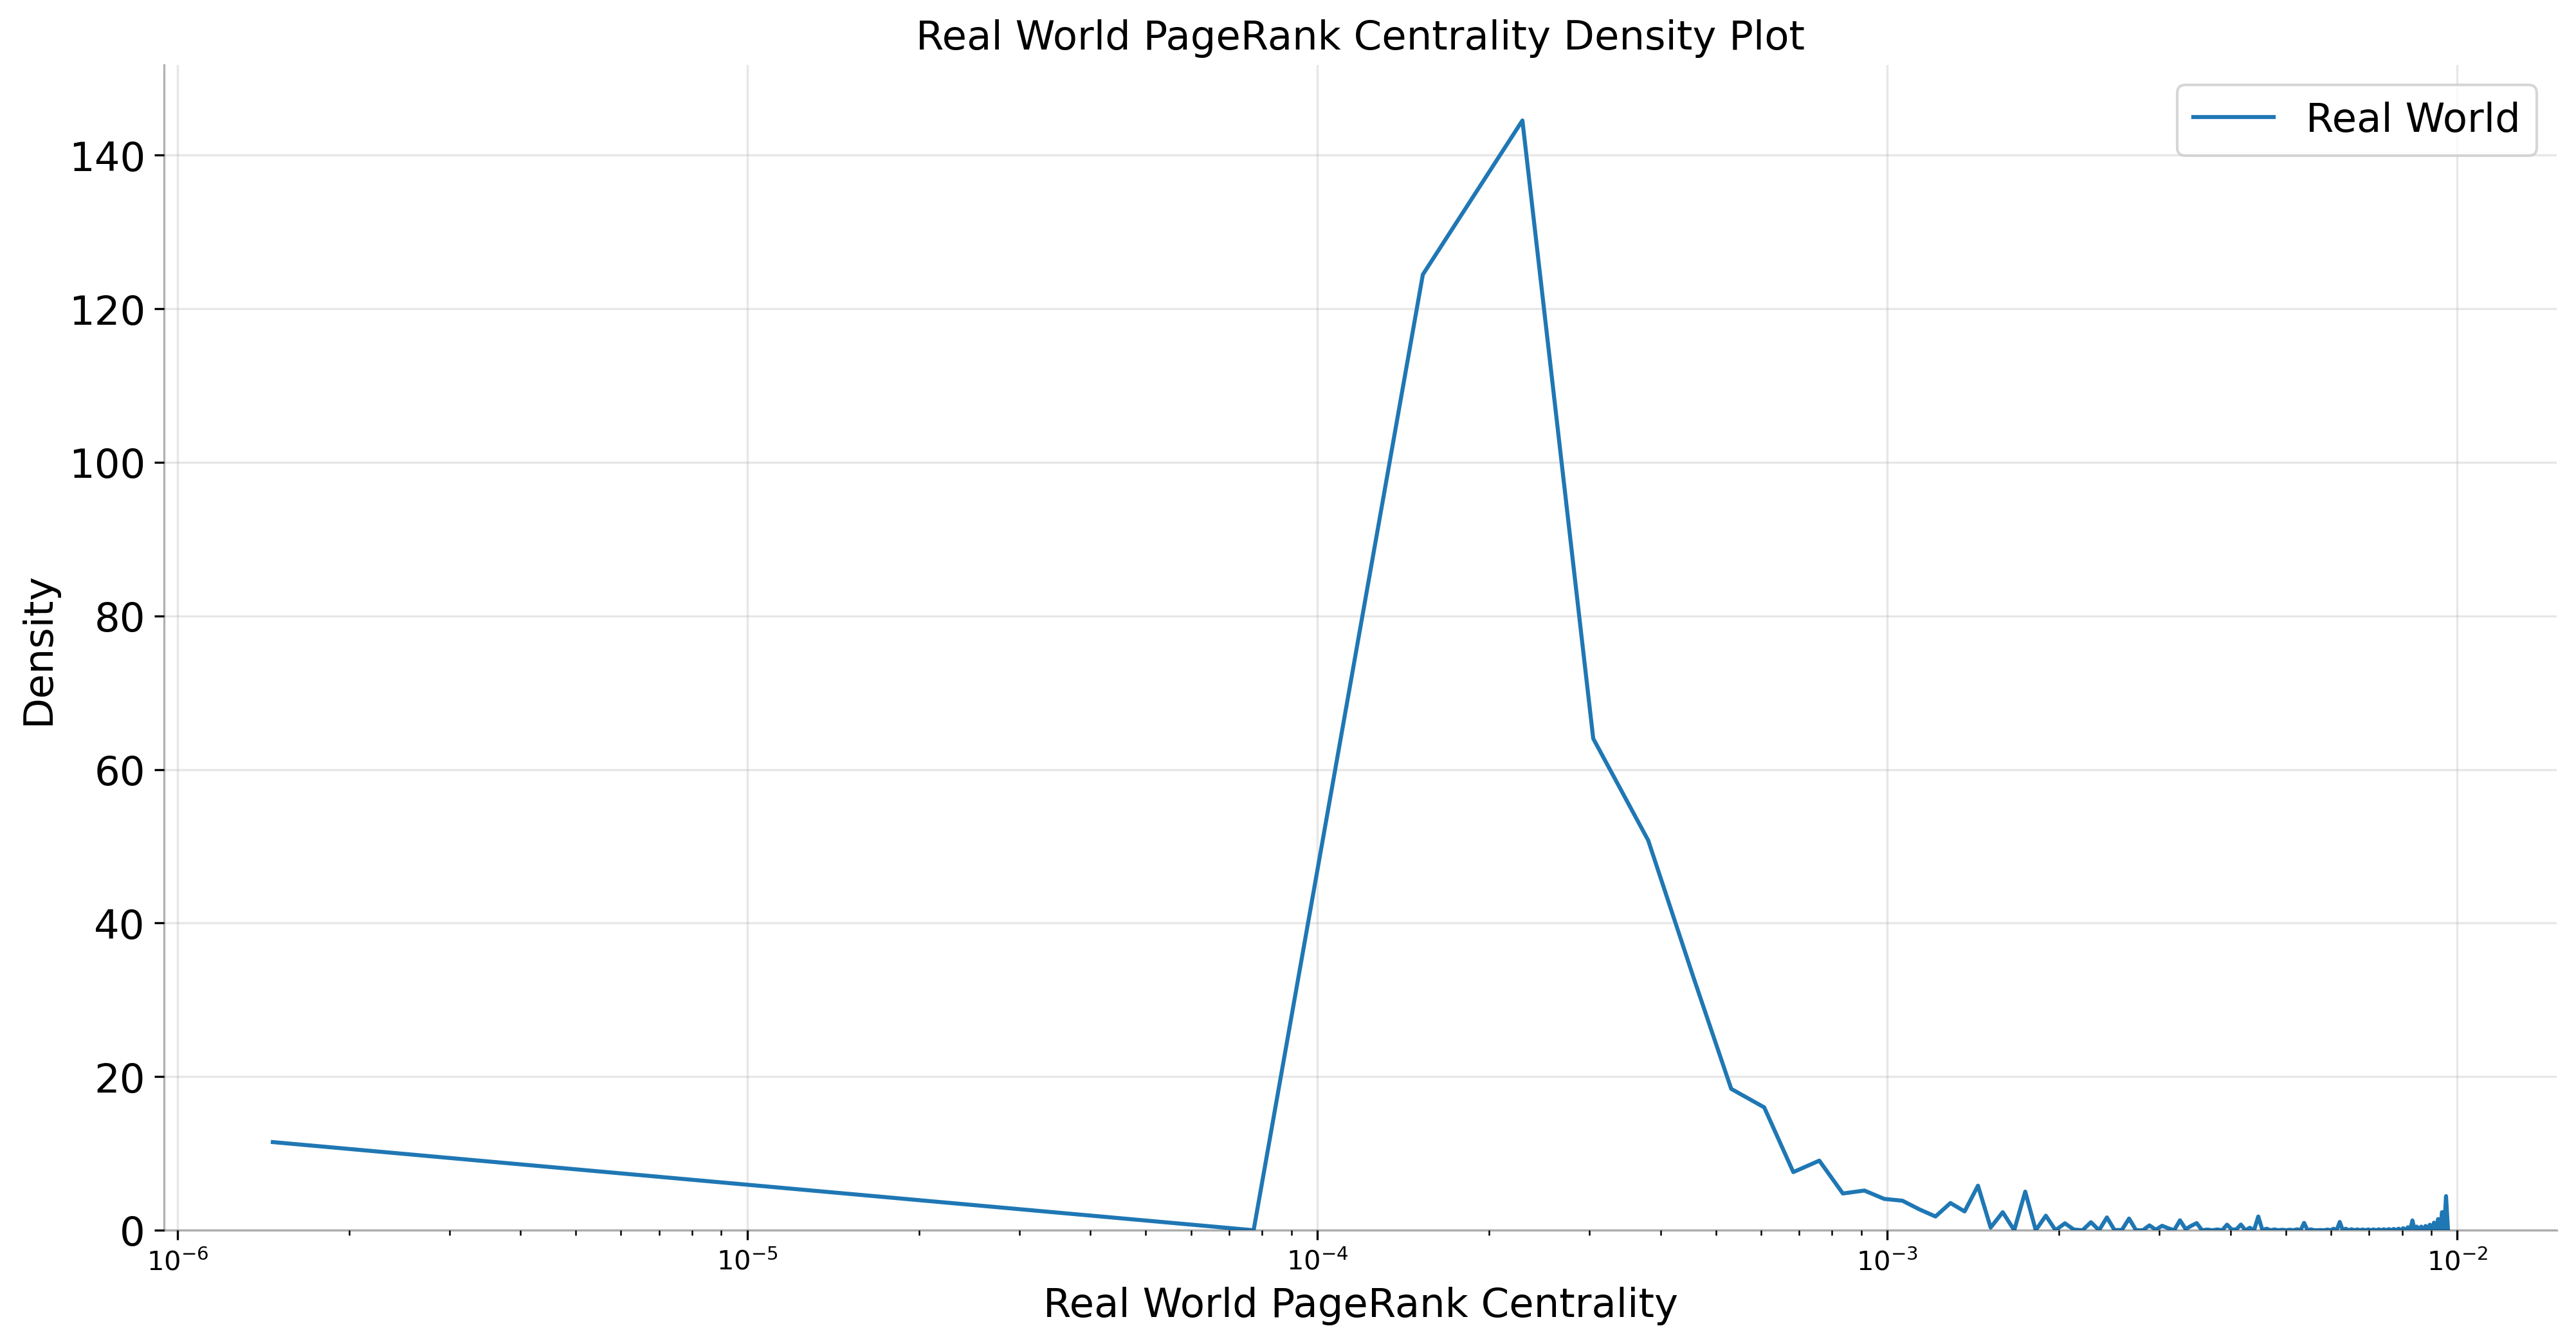

In [41]:
dist_plot(real_world_pagerank_data, "Real World PageRank Centrality")

## Geometric Centrality


In [42]:
closeness_centrality = nx.closeness_centrality(G)
closeness_centrality = {k: v for k, v in sorted(closeness_centrality.items(), key = lambda item: item[1], reverse = True)}

In [43]:
closeness_list = list(closeness_centrality.values())

#### ER Closeness Centrality

In [44]:
er_closeness_centrality = nx.closeness_centrality(er)
er_closeness_centrality = {k: v for k, v in sorted(er_closeness_centrality.items(), key = lambda item: item[1], reverse = True)}
er_closeness_list = list(er_closeness_centrality.values())

#### WS Closeness Centrality

In [45]:
ws_closeness_centrality = nx.closeness_centrality(ws)
ws_closeness_centrality = {k: v for k, v in sorted(ws_closeness_centrality.items(), key = lambda item: item[1], reverse = True)}
ws_closeness_list = list(ws_closeness_centrality.values())

#### BA Closeness Centrality

In [46]:
ba_closeness_centrality = nx.closeness_centrality(ba)
ba_closeness_centrality = {k: v for k, v in sorted(ba_closeness_centrality.items(), key = lambda item: item[1], reverse = True)}
ba_closeness_list = list(ba_closeness_centrality.values())

#### CM Closeness Centrality

In [47]:
cm_closeness_centrality = nx.closeness_centrality(cm)
cm_closeness_centrality = {k: v for k, v in sorted(cm_closeness_centrality.items(), key = lambda item: item[1], reverse = True)}
cm_closeness_list = list(cm_closeness_centrality.values())

In [48]:
closeness_data = {
    "real_word":{
        "name":"Real World",
        "list":closeness_list
    },
    "erdos_renyi":{
        "name":"Erdős-Rényi",
        "list":er_closeness_list
    },
    "watts_strogatz":{
        "name":"Watts Strogatz",
        "list":ws_closeness_list
    },
    "barabasi–Albert":{
        "name":"Barabási Albert",
        "list":ba_closeness_list
    },
    "configuration_model":{
        "name":"Configuration Model",
        "list":cm_closeness_list
    }
}
real_world_closeness_data = {
    "real_word":{
        "name":"Real World",
        "list":closeness_list
    }
}

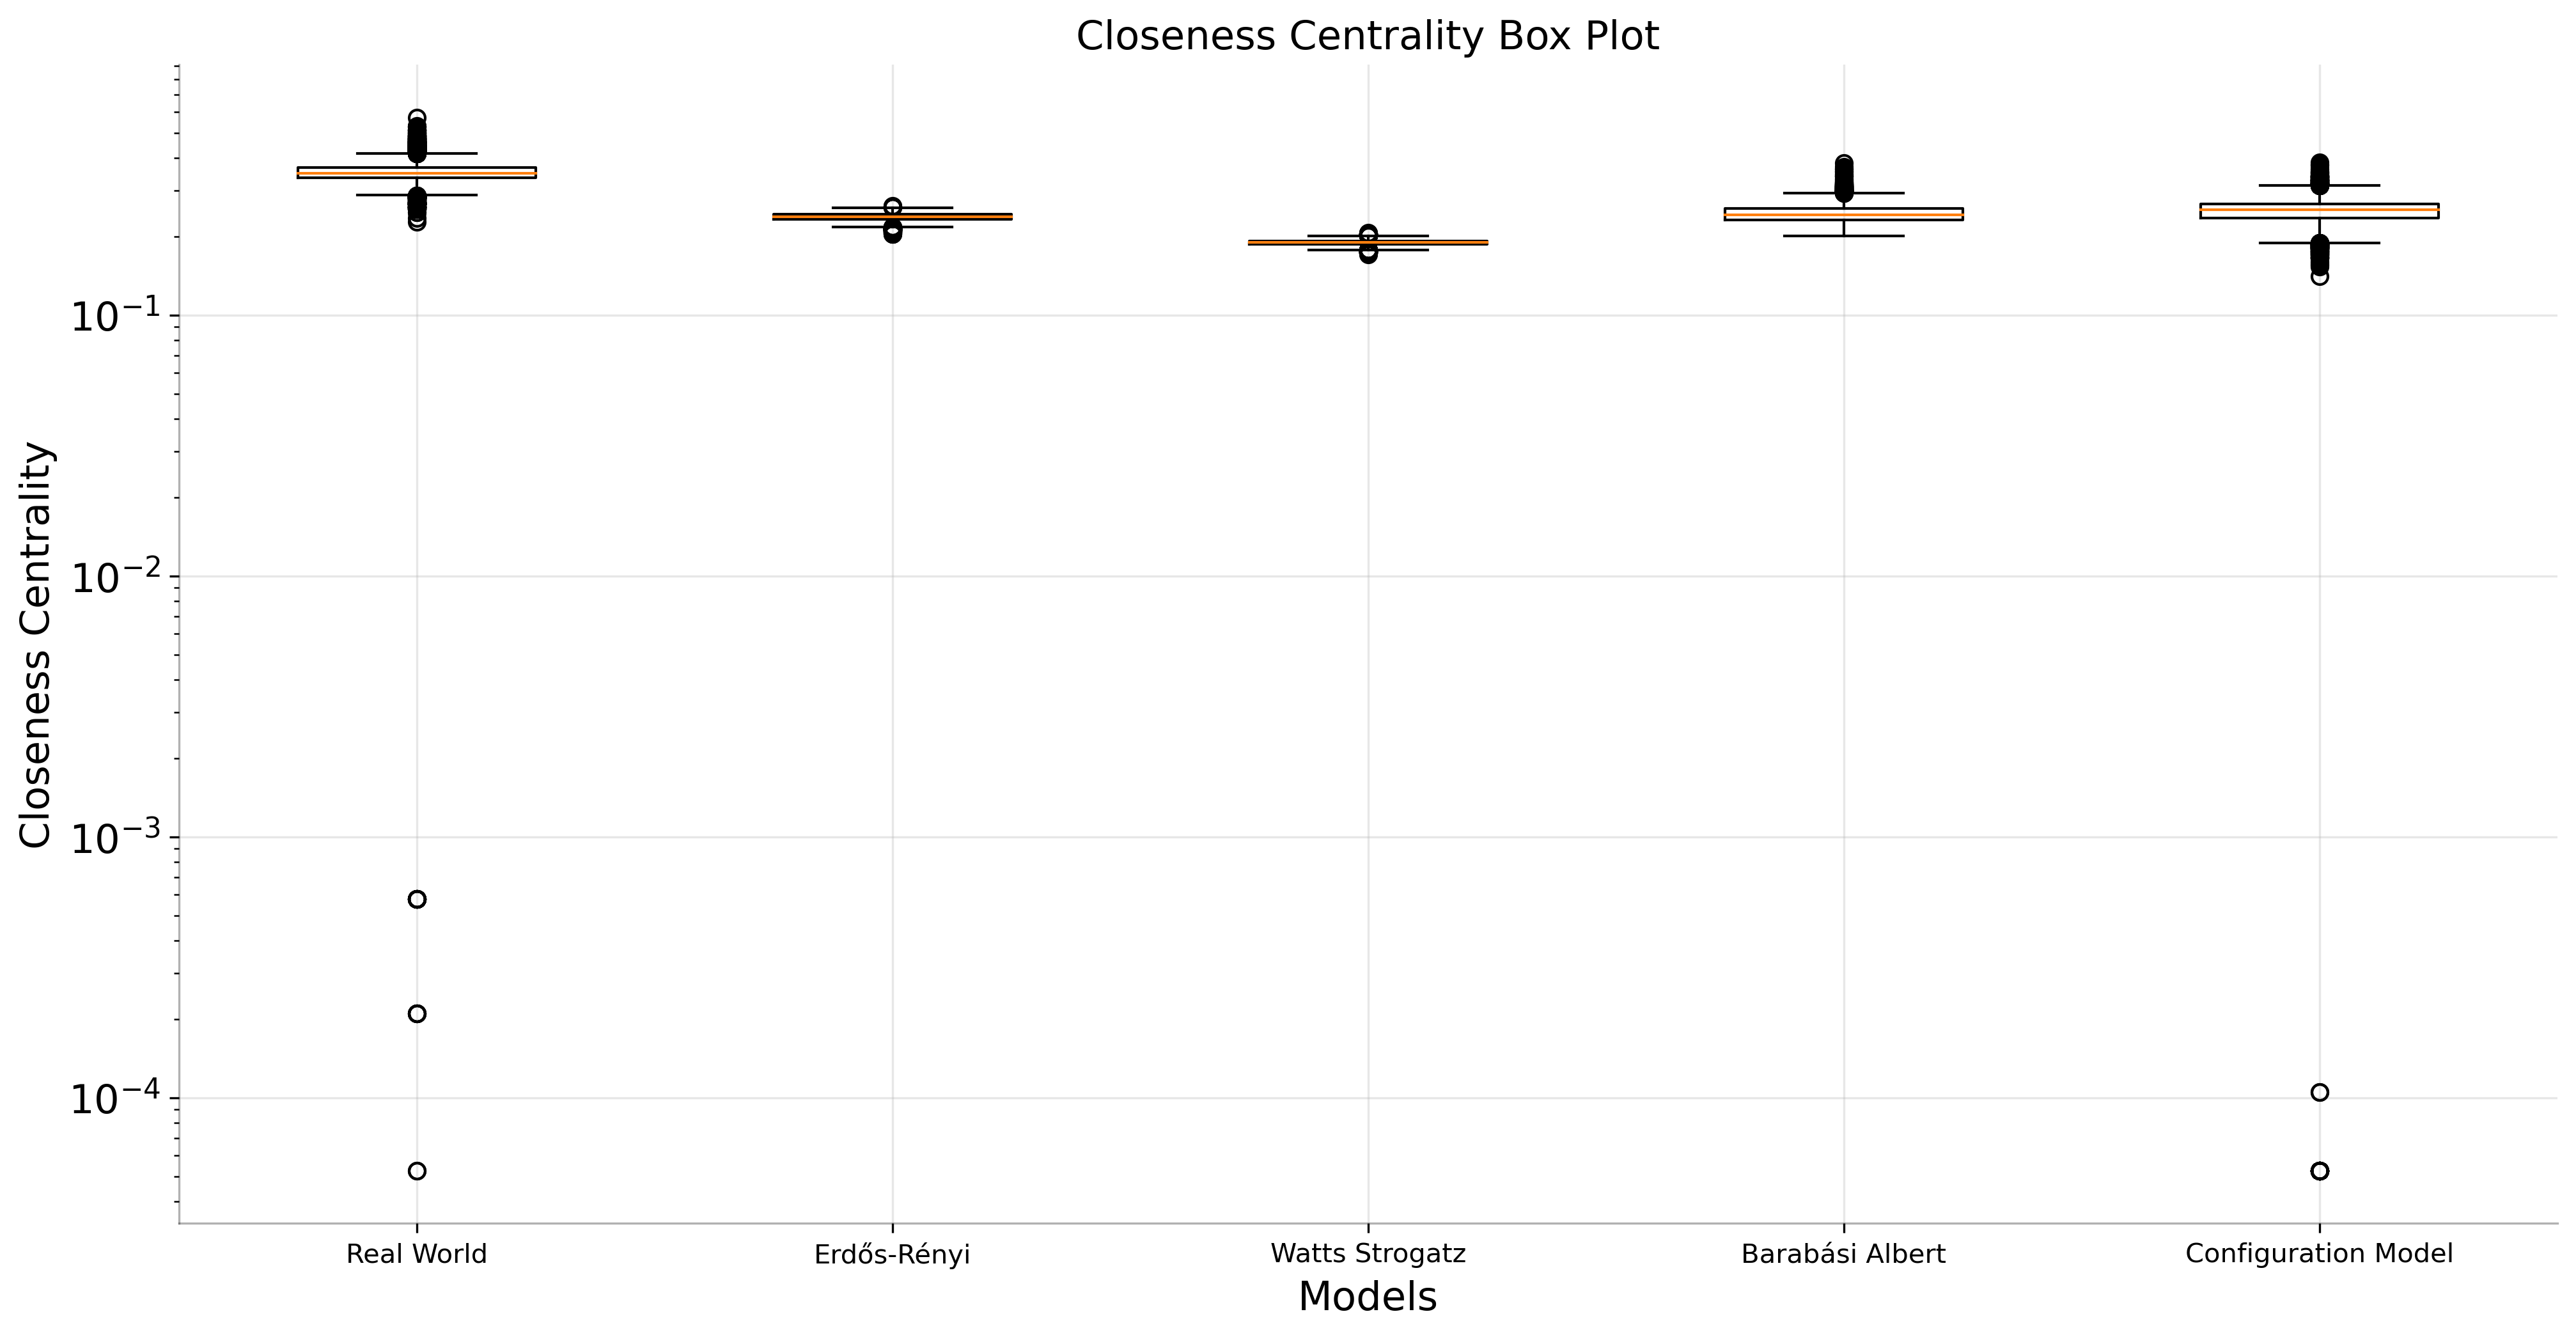

In [49]:
box_plot(closeness_data, "Closeness Centrality")

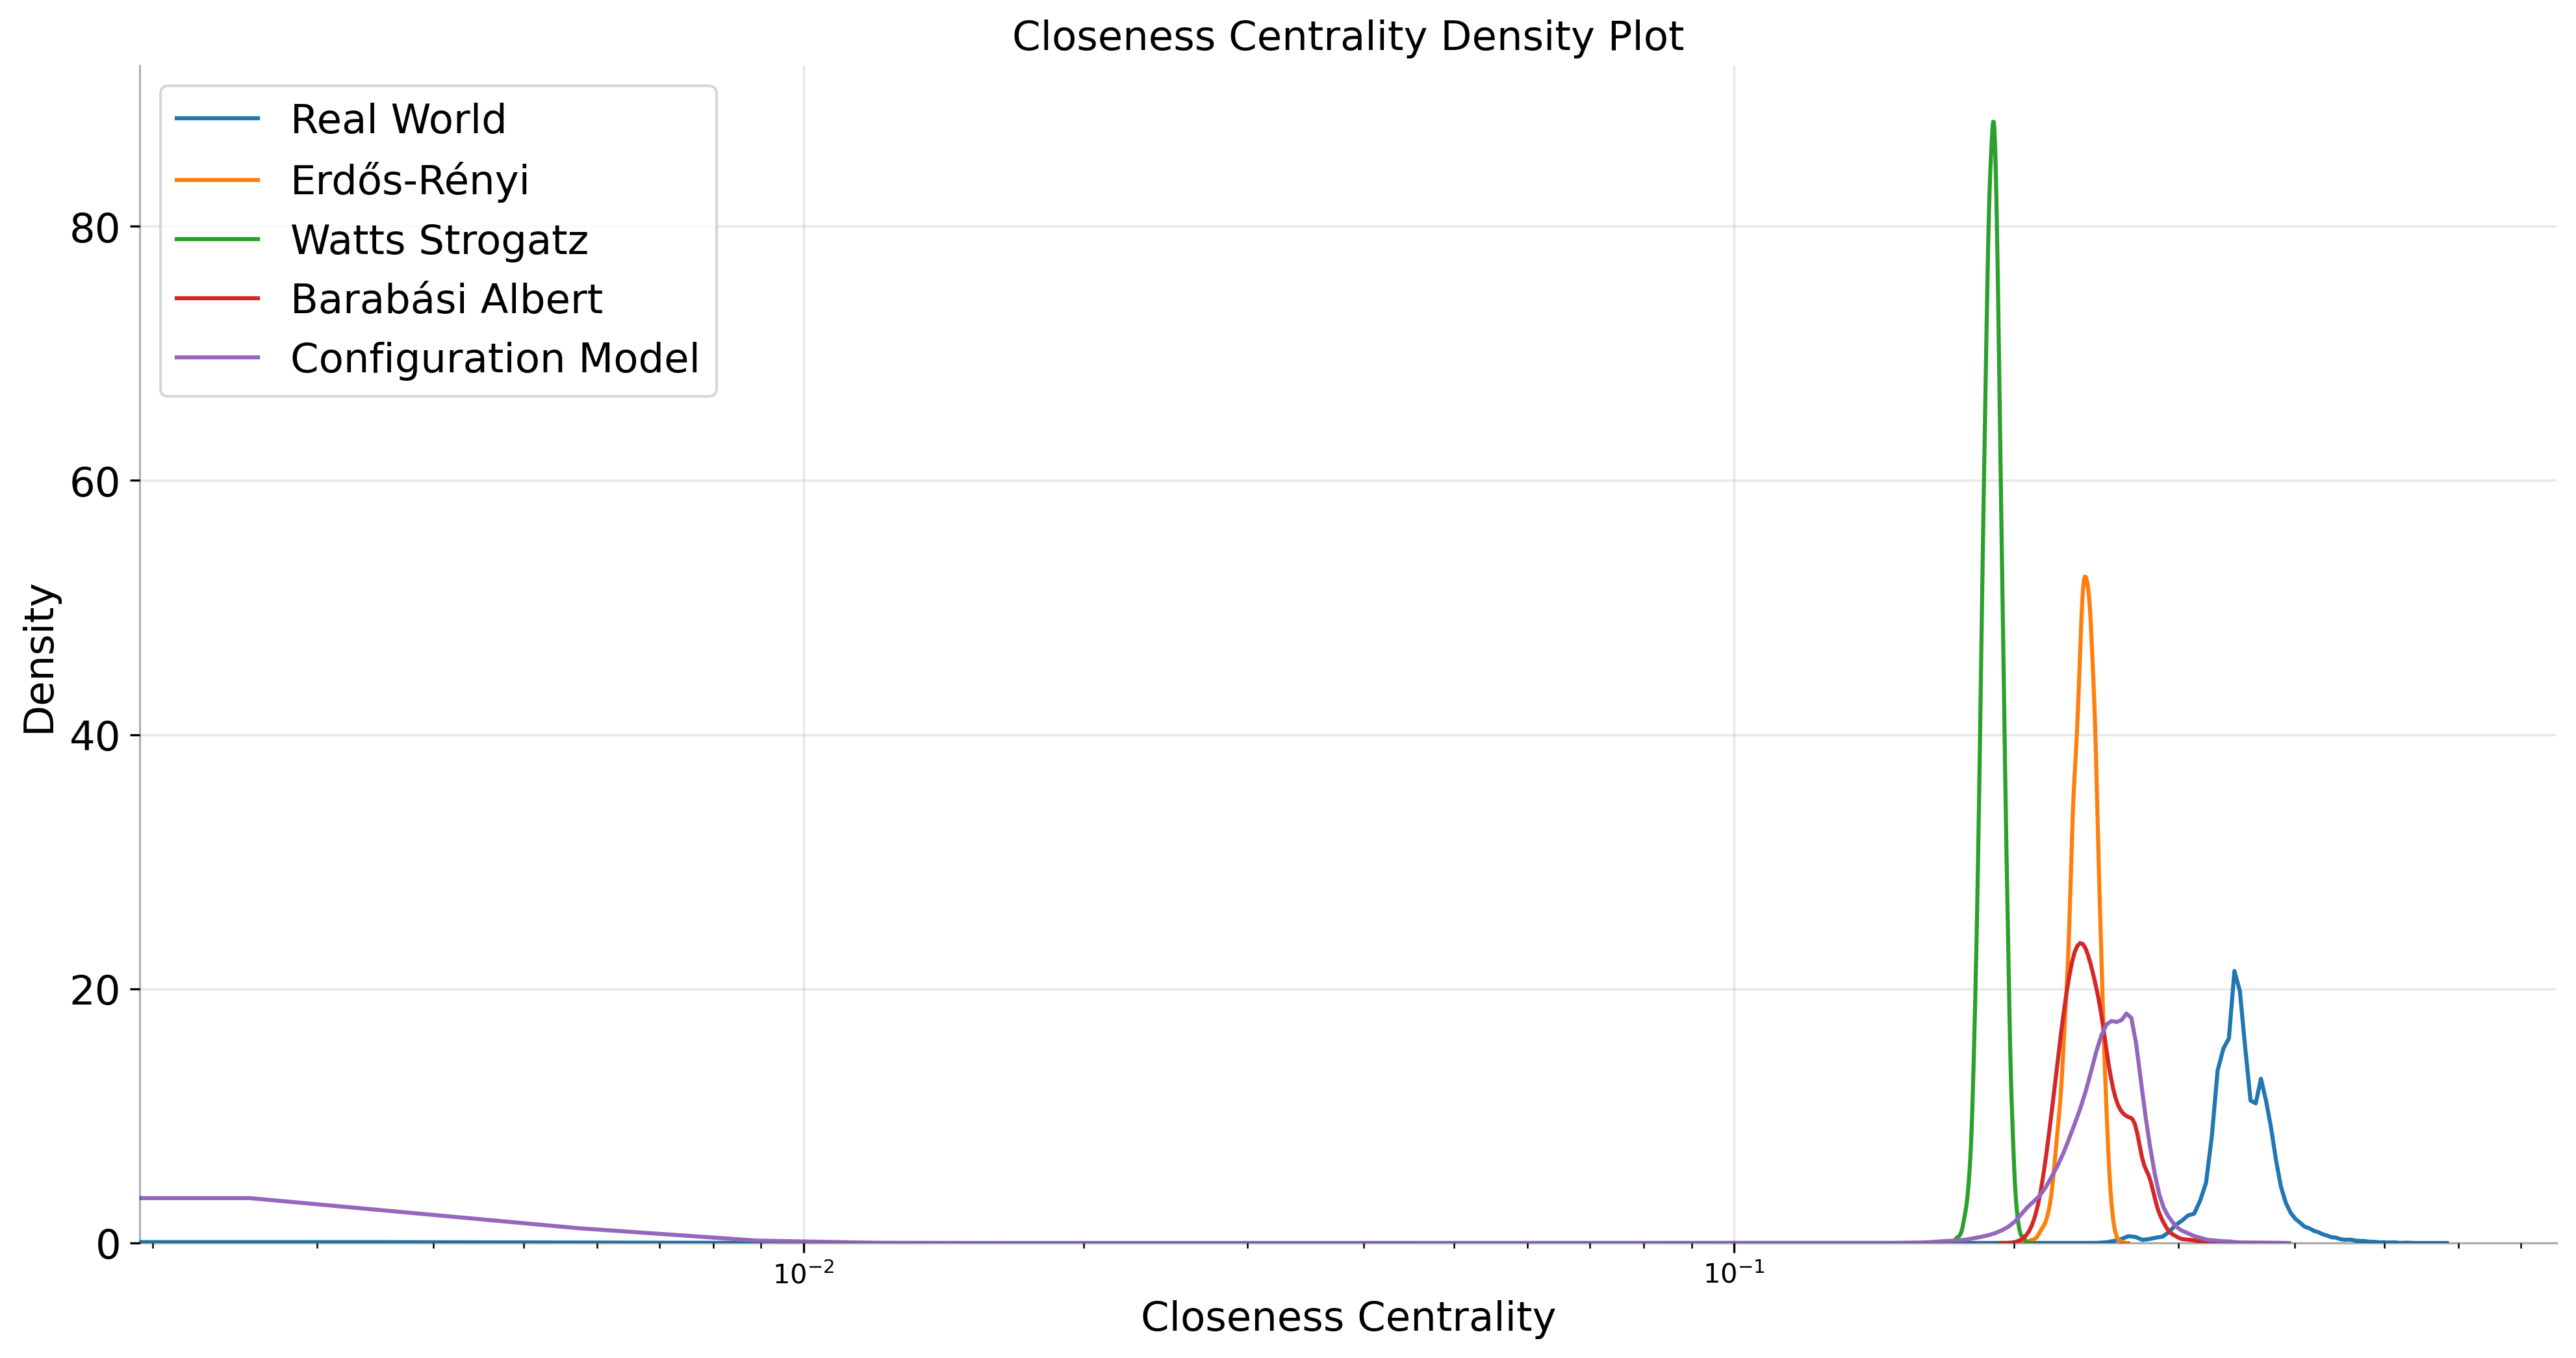

In [50]:
dist_plot(closeness_data, "Closeness Centrality")

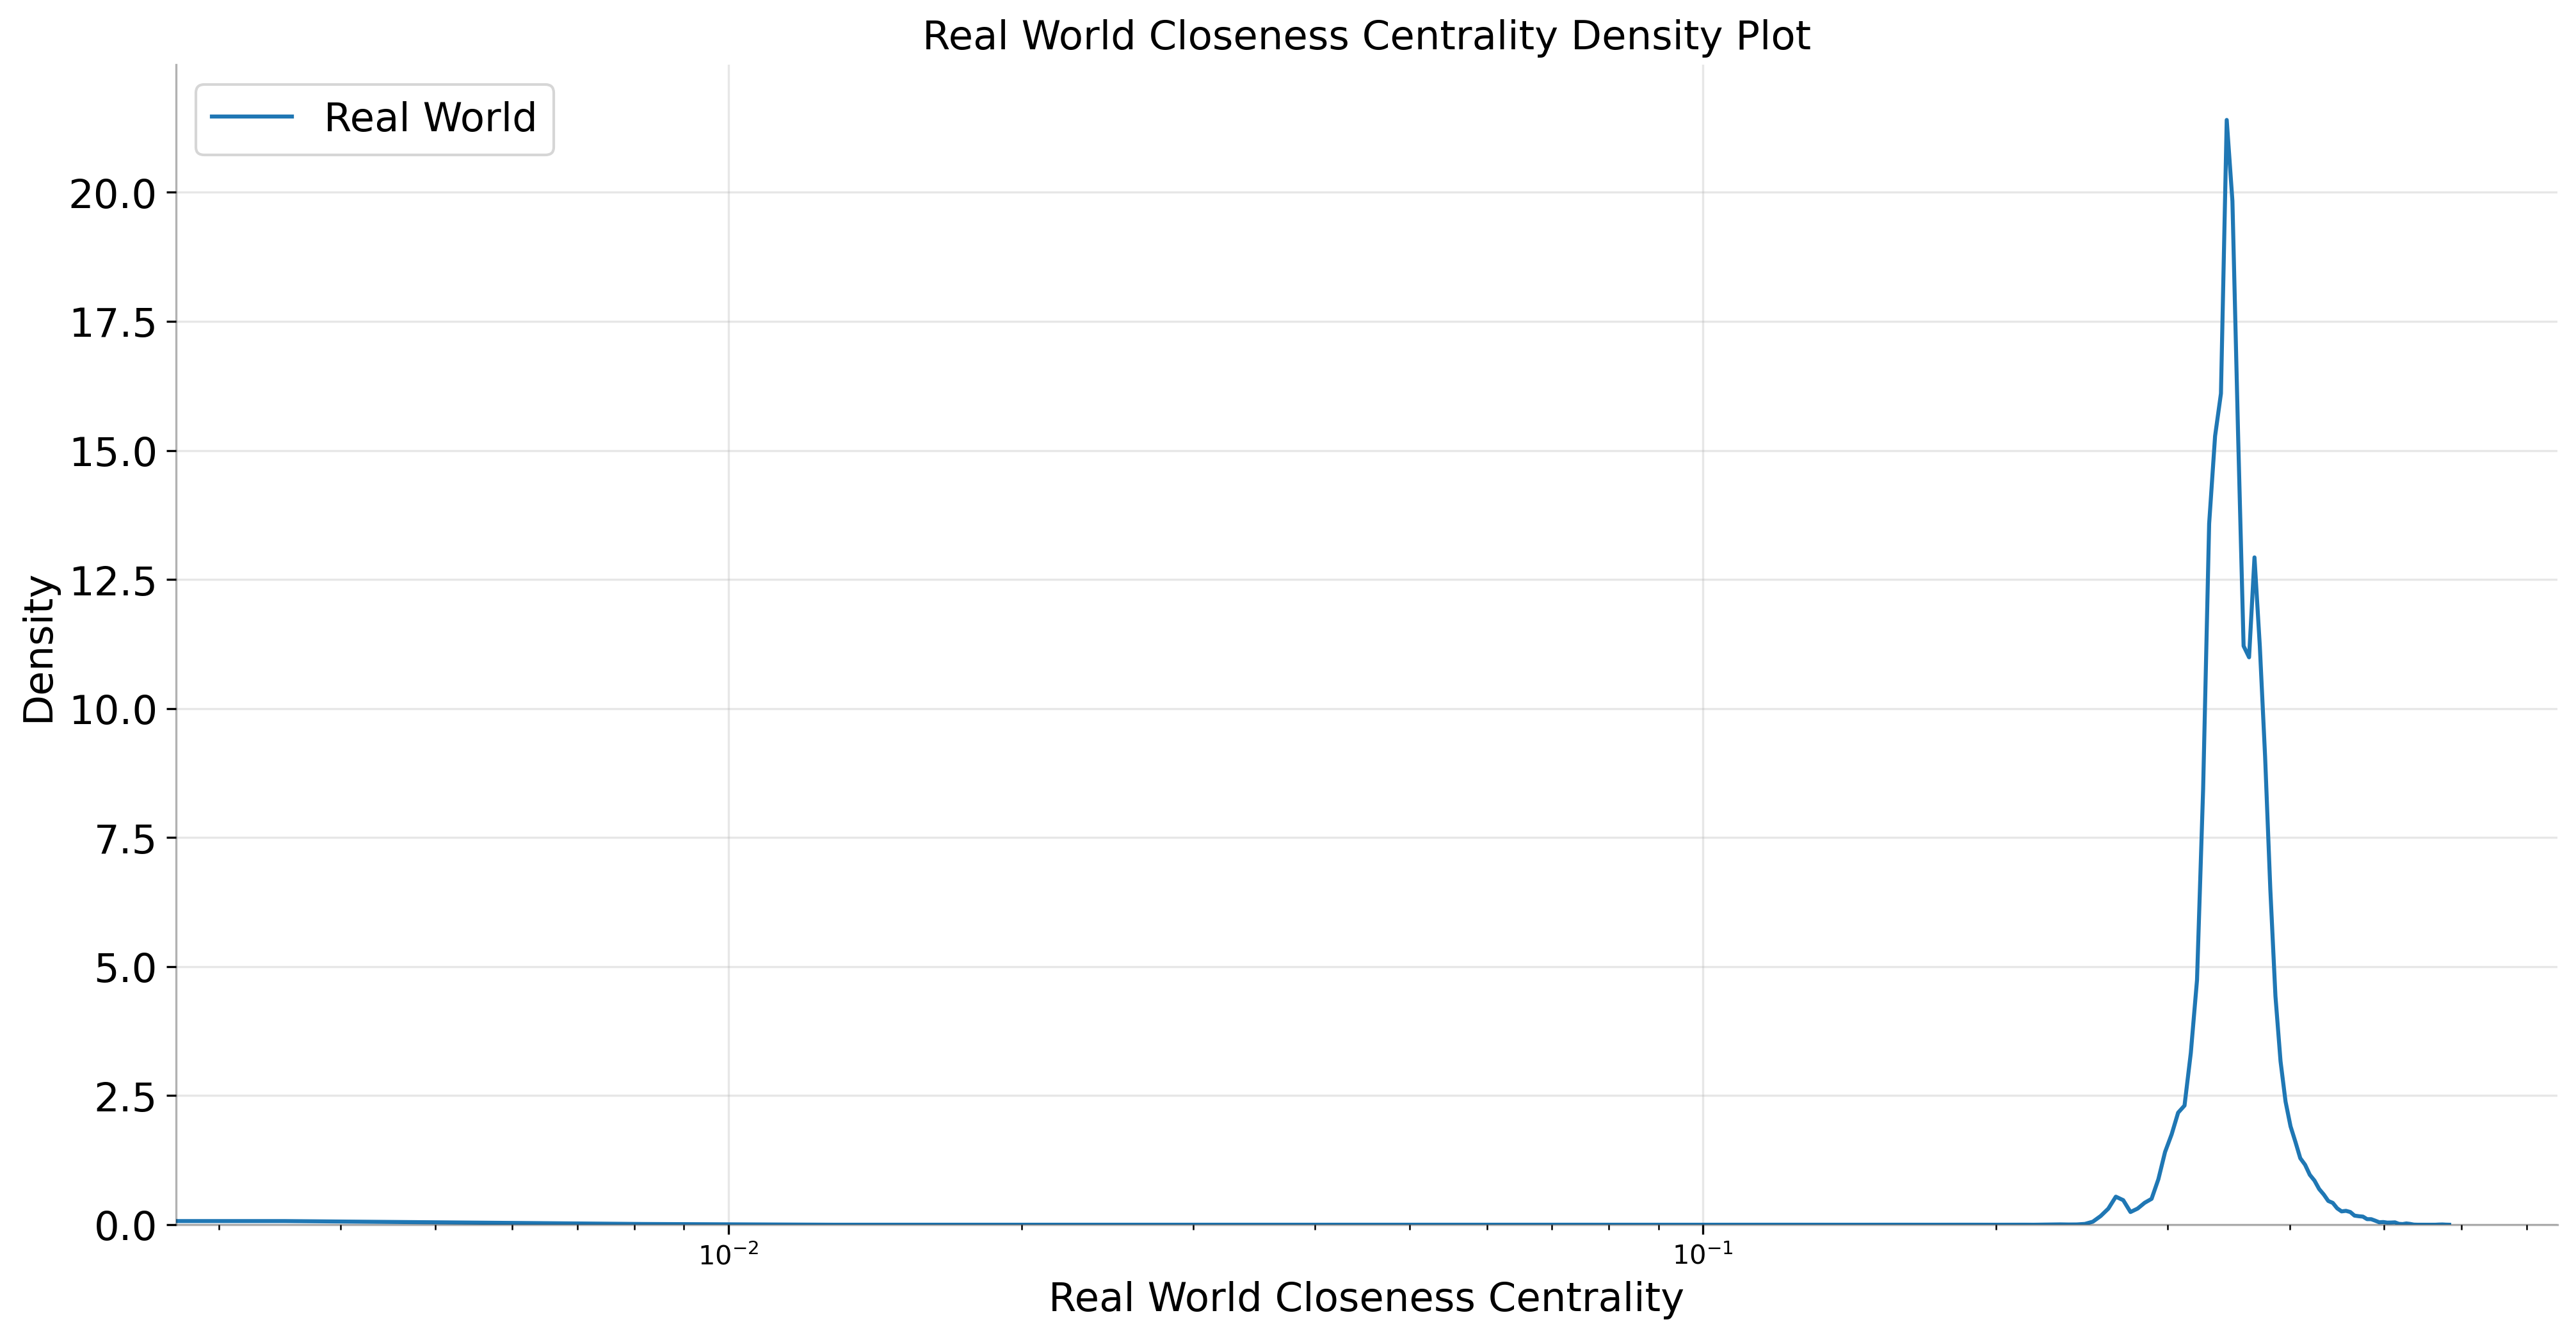

In [51]:
dist_plot(real_world_closeness_data, "Real World Closeness Centrality")

In [52]:
dict(itertools.islice(closeness_centrality.items(), 10))# top Ten

{'9666': 0.5726096744587953,
 '4235': 0.531746785493076,
 '1784': 0.5288731991428809,
 '13169': 0.5271697619333688,
 '19298': 0.5266287300574247,
 '10211': 0.52440323093579,
 '12907': 0.5166685437186785,
 '1504': 0.5124984877187896,
 '3190': 0.5124293264967282,
 '4861': 0.5124016672342395}

## Harmonic Centrality

In [53]:
harmonic_centrality = nx.harmonic_centrality(G)
harmonic_centrality = {k: v for k, v in sorted(harmonic_centrality.items(), key = lambda item: item[1], reverse = True)}
dict(itertools.islice(harmonic_centrality.items(), 10))# top Ten

{'9666': 11980.000000000093,
 '4235': 10831.333333333654,
 '13169': 10758.416666667135,
 '1784': 10742.666666667003,
 '19298': 10658.166666666988,
 '10211': 10552.750000000267,
 '12907': 10328.66666666702,
 '9820': 10304.833333333961,
 '1504': 10238.166666667128,
 '4861': 10212.00000000042}

In [54]:
harmonic_list = list(harmonic_centrality.values())

#### ER Harmonic Centrality

In [55]:
er_harmonic_centrality = nx.harmonic_centrality(er)
er_harmonic_centrality = {k: v for k, v in sorted(er_harmonic_centrality.items(), key = lambda item: item[1], reverse = True)}
er_harmonic_list = list(er_harmonic_centrality.values())

#### WS Harmonic Centrality

In [56]:
ws_harmonic_centrality = nx.harmonic_centrality(ws)
ws_harmonic_centrality = {k: v for k, v in sorted(ws_harmonic_centrality.items(), key = lambda item: item[1], reverse = True)}
ws_harmonic_list = list(ws_harmonic_centrality.values())

#### BA Harmonic Centrality

In [57]:
ba_harmonic_centrality = nx.harmonic_centrality(ba)
ba_harmonic_centrality = {k: v for k, v in sorted(ba_harmonic_centrality.items(), key = lambda item: item[1], reverse = True)}
ba_harmonic_list = list(ba_harmonic_centrality.values())

#### CM Harmonic Centrality

In [58]:
cm_harmonic_centrality = nx.harmonic_centrality(cm)
cm_harmonic_centrality = {k: v for k, v in sorted(cm_harmonic_centrality.items(), key = lambda item: item[1], reverse = True)}
cm_harmonic_list = list(cm_harmonic_centrality.values())

In [59]:
harmonic_data = {
    "real_word":{
        "name":"Real World",
        "list":harmonic_list
    },
    "erdos_renyi":{
        "name":"Erdős-Rényi",
        "list":er_harmonic_list
    },
    "watts_strogatz":{
        "name":"Watts Strogatz",
        "list":ws_harmonic_list
    },
    "barabasi–Albert":{
        "name":"Barabási Albert",
        "list":ba_harmonic_list
    },
    "configuration_model":{
        "name":"Configuration Model",
        "list":cm_harmonic_list
    }
}
real_world_harmonic_data = {
    "real_word":{
        "name":"Real World",
        "list":harmonic_list
    }
}

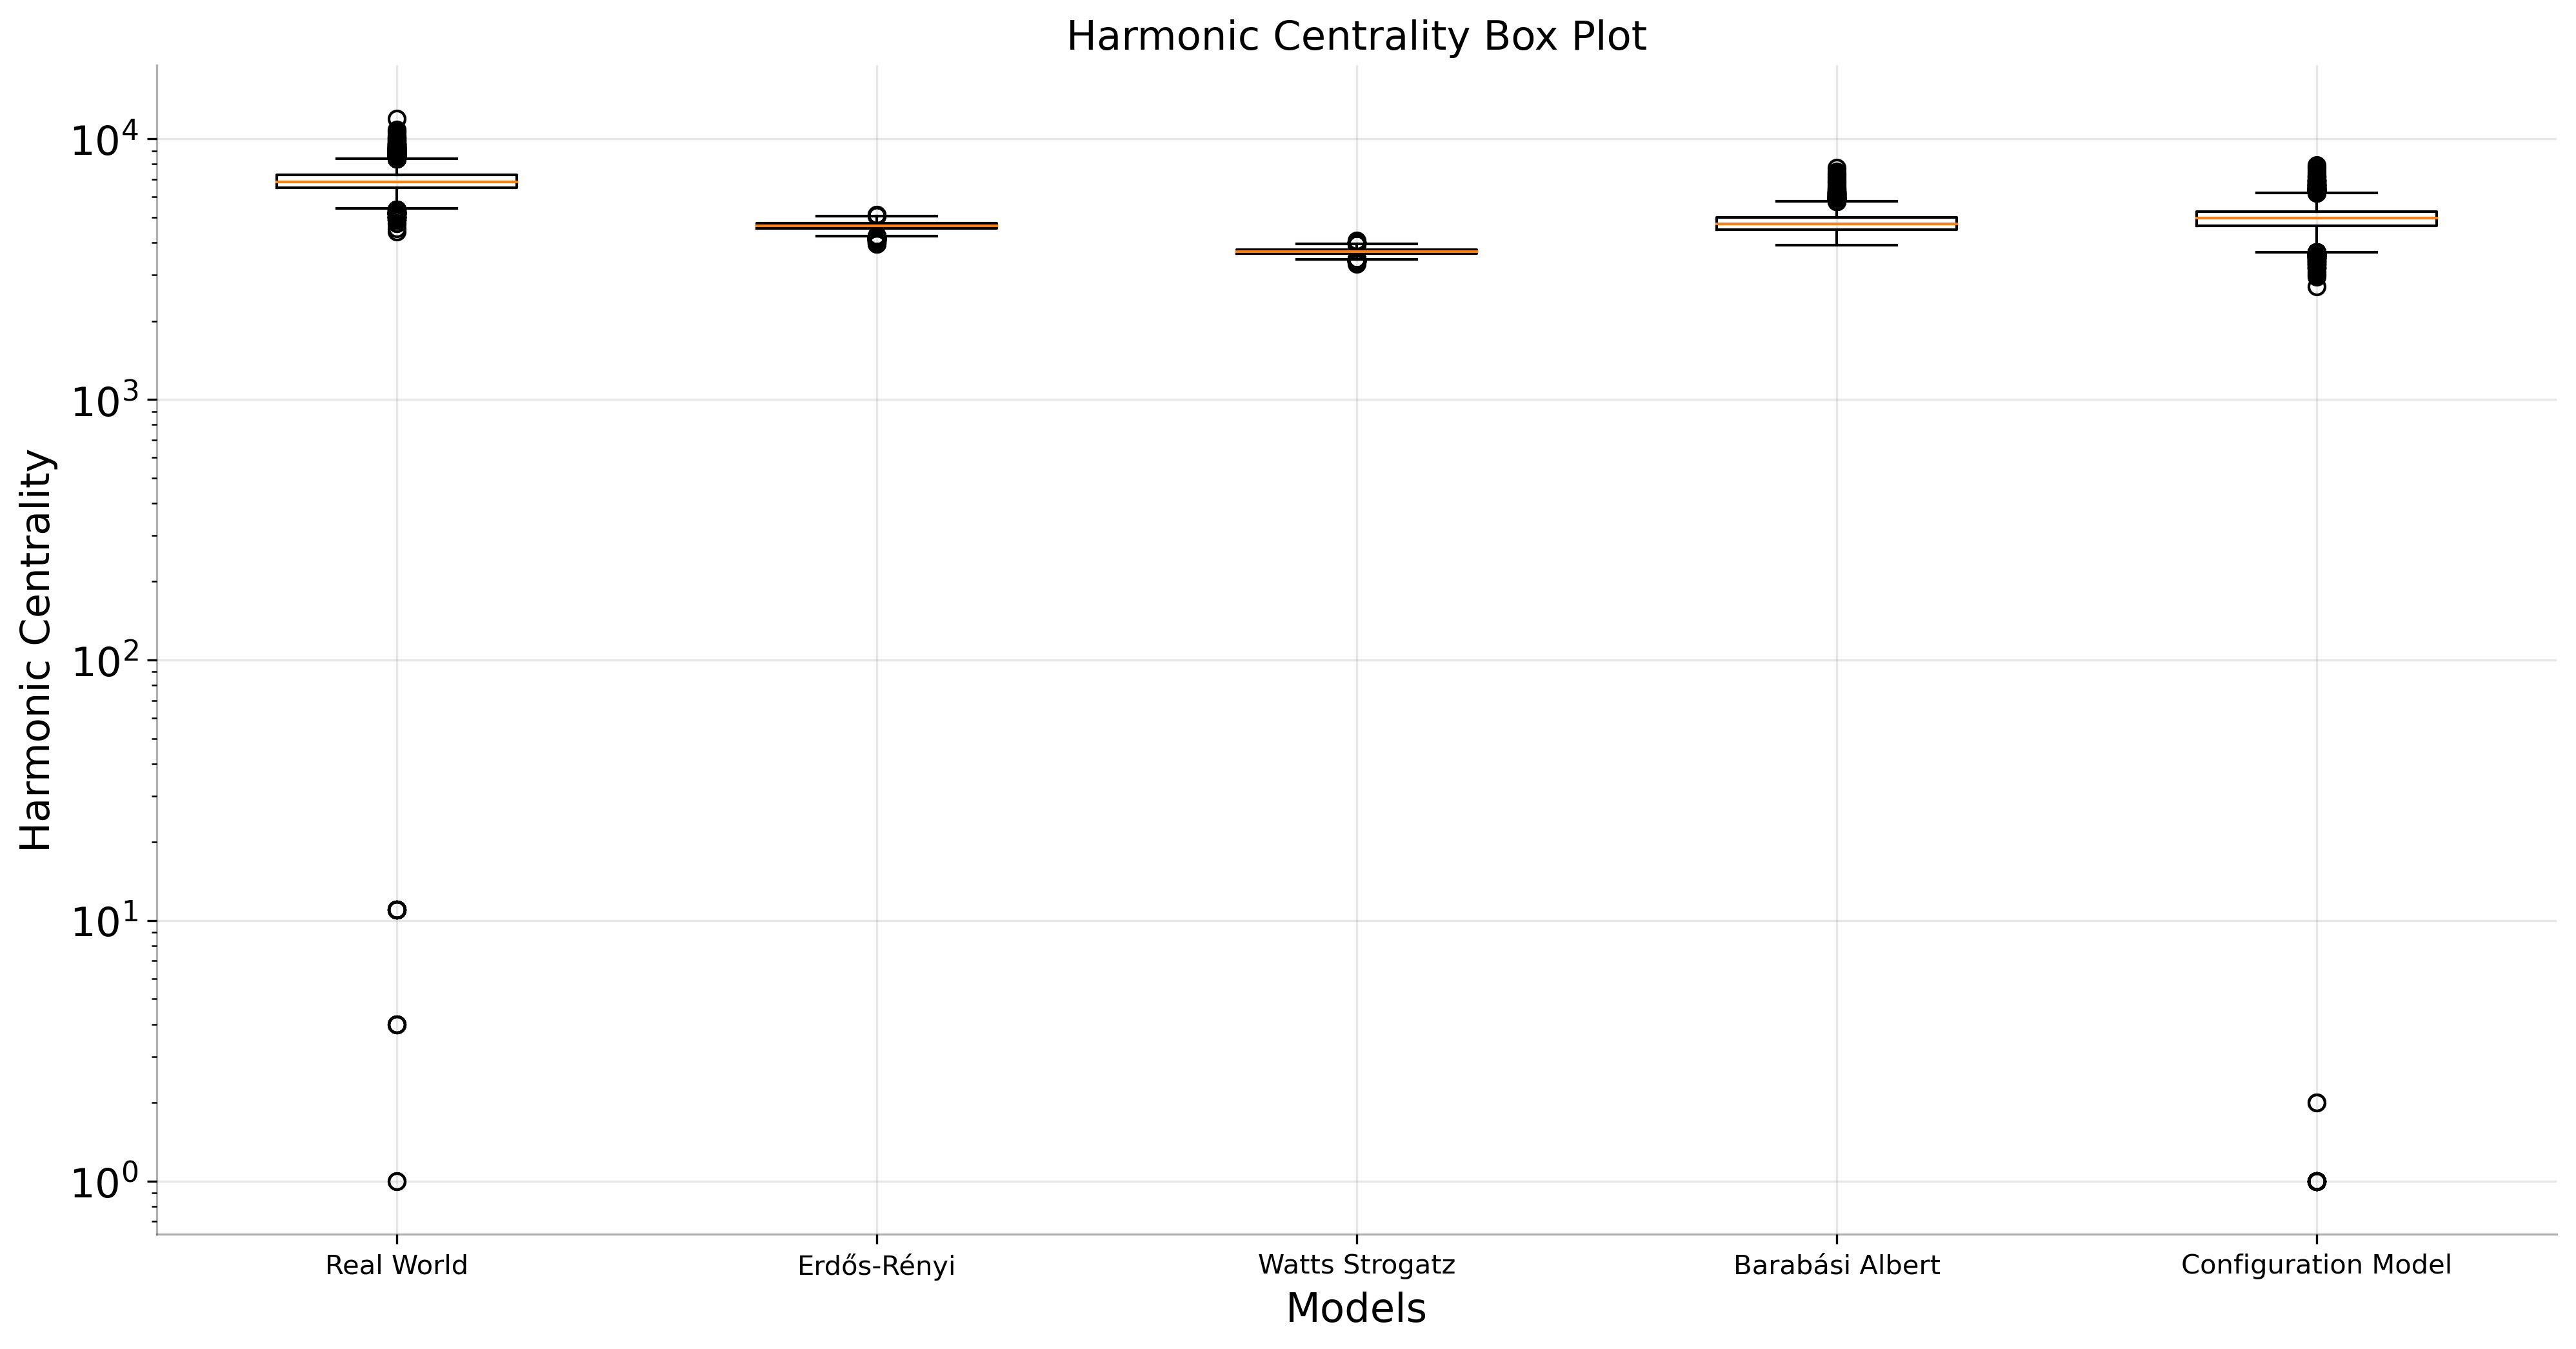

In [60]:
box_plot(harmonic_data, "Harmonic Centrality")

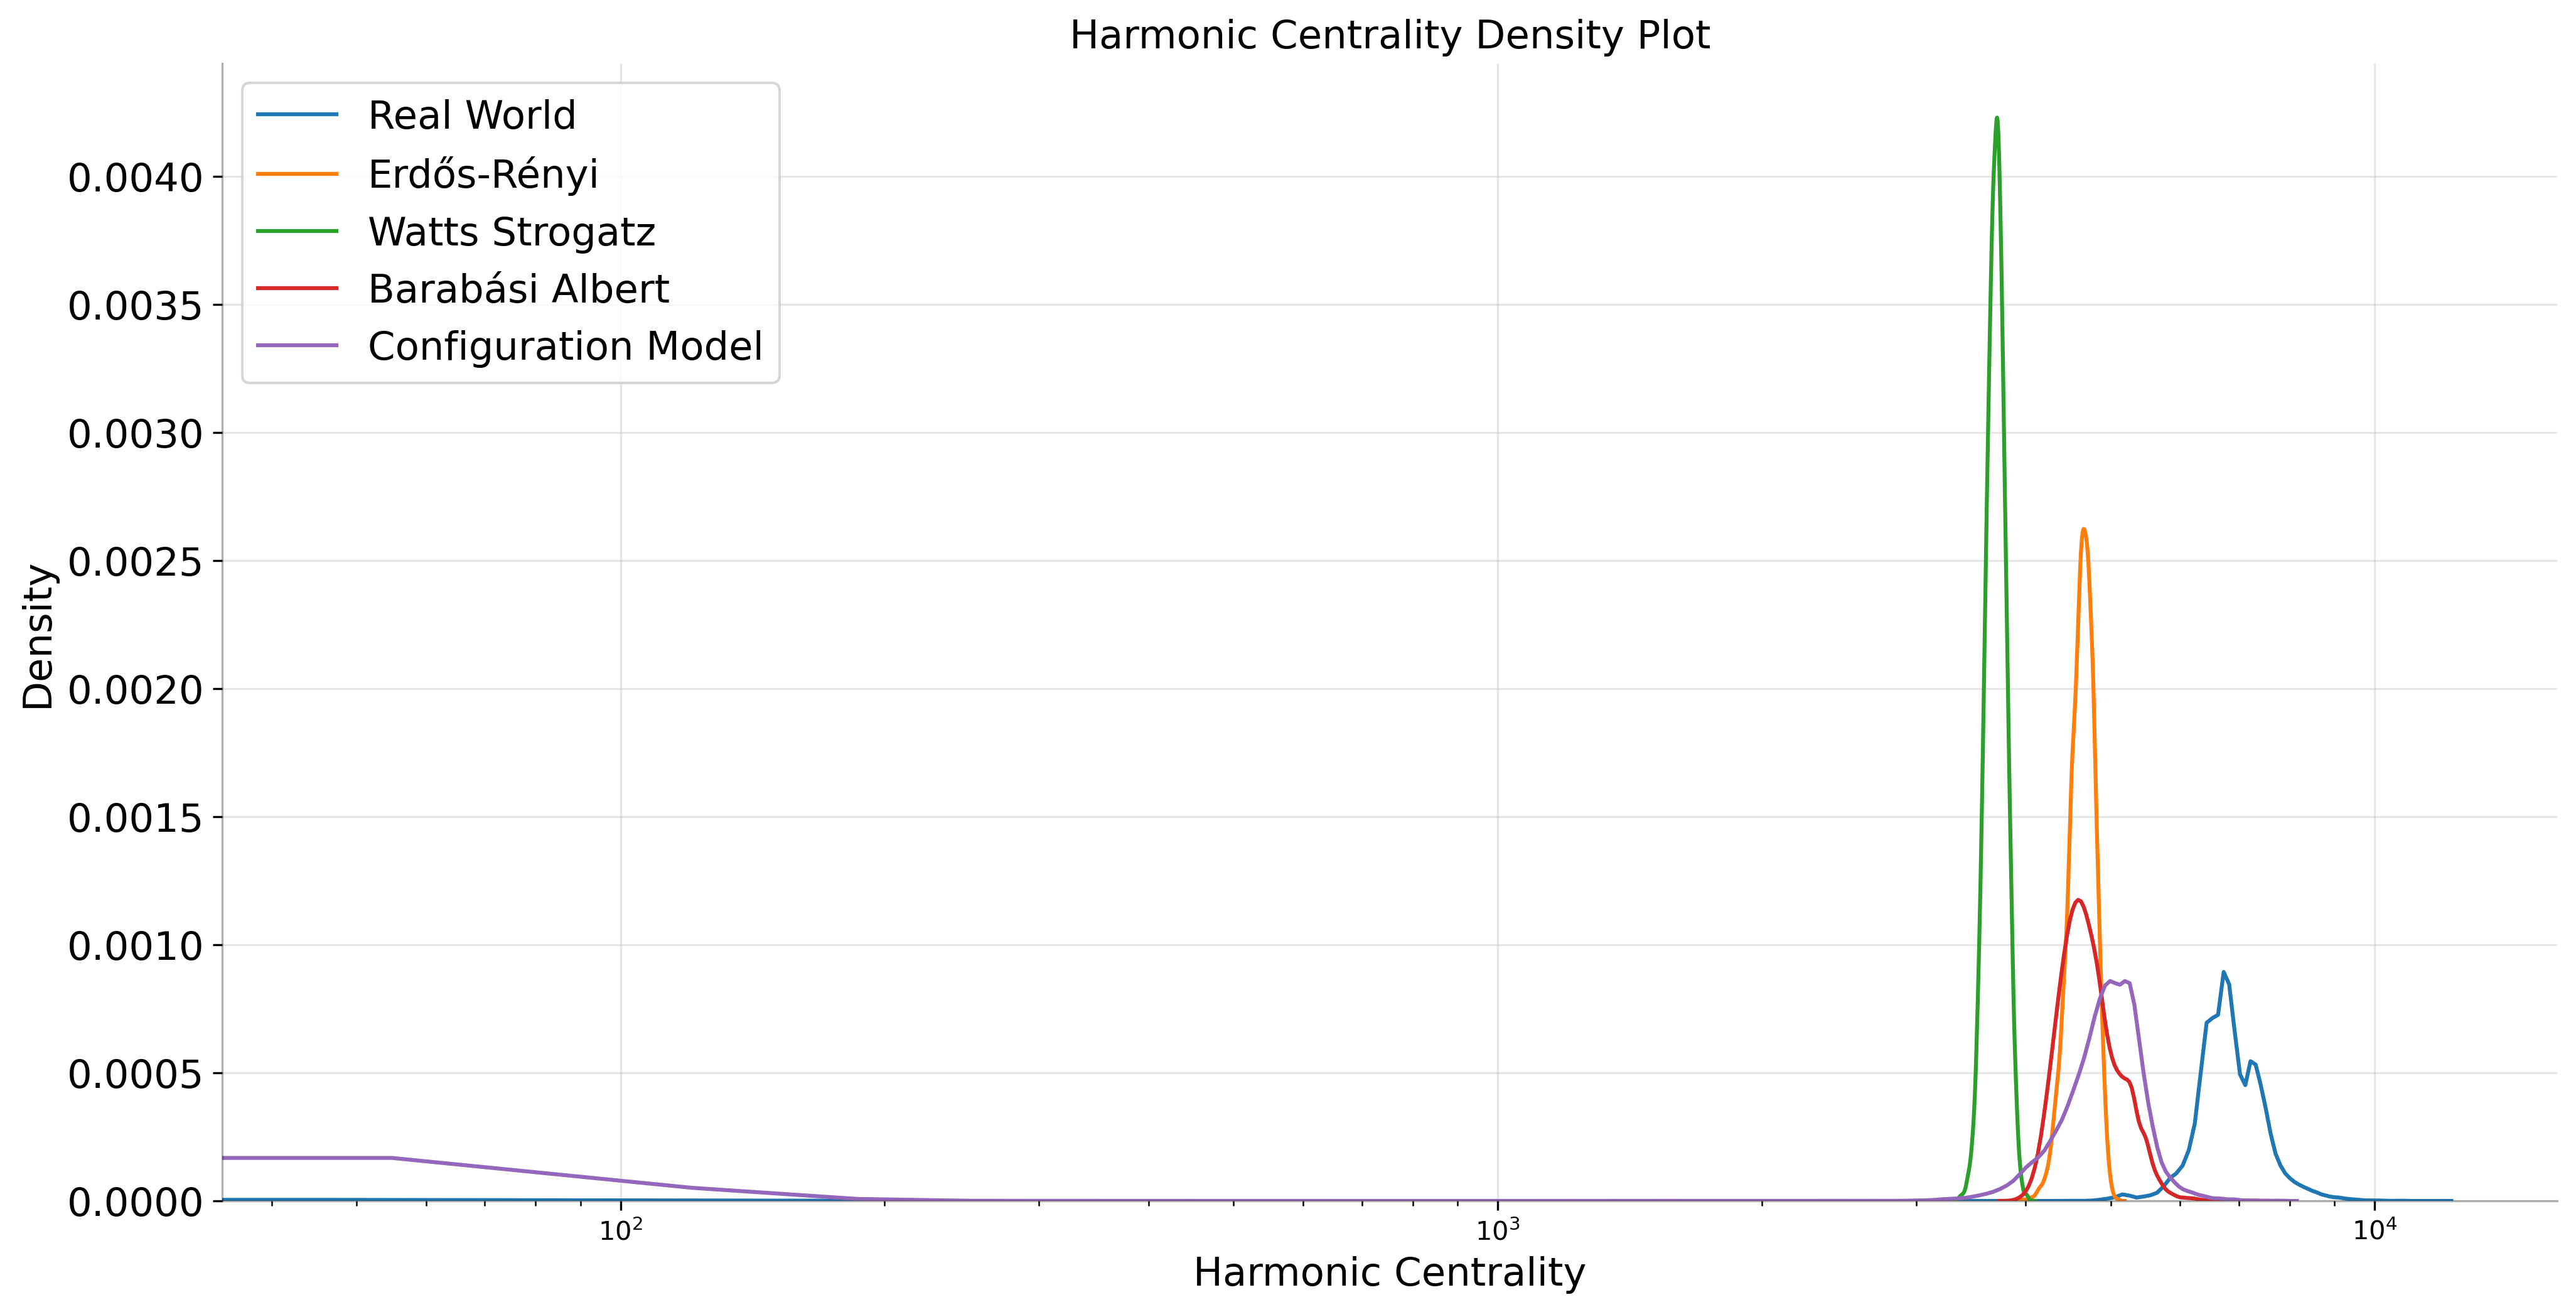

In [61]:
dist_plot(harmonic_data, "Harmonic Centrality")

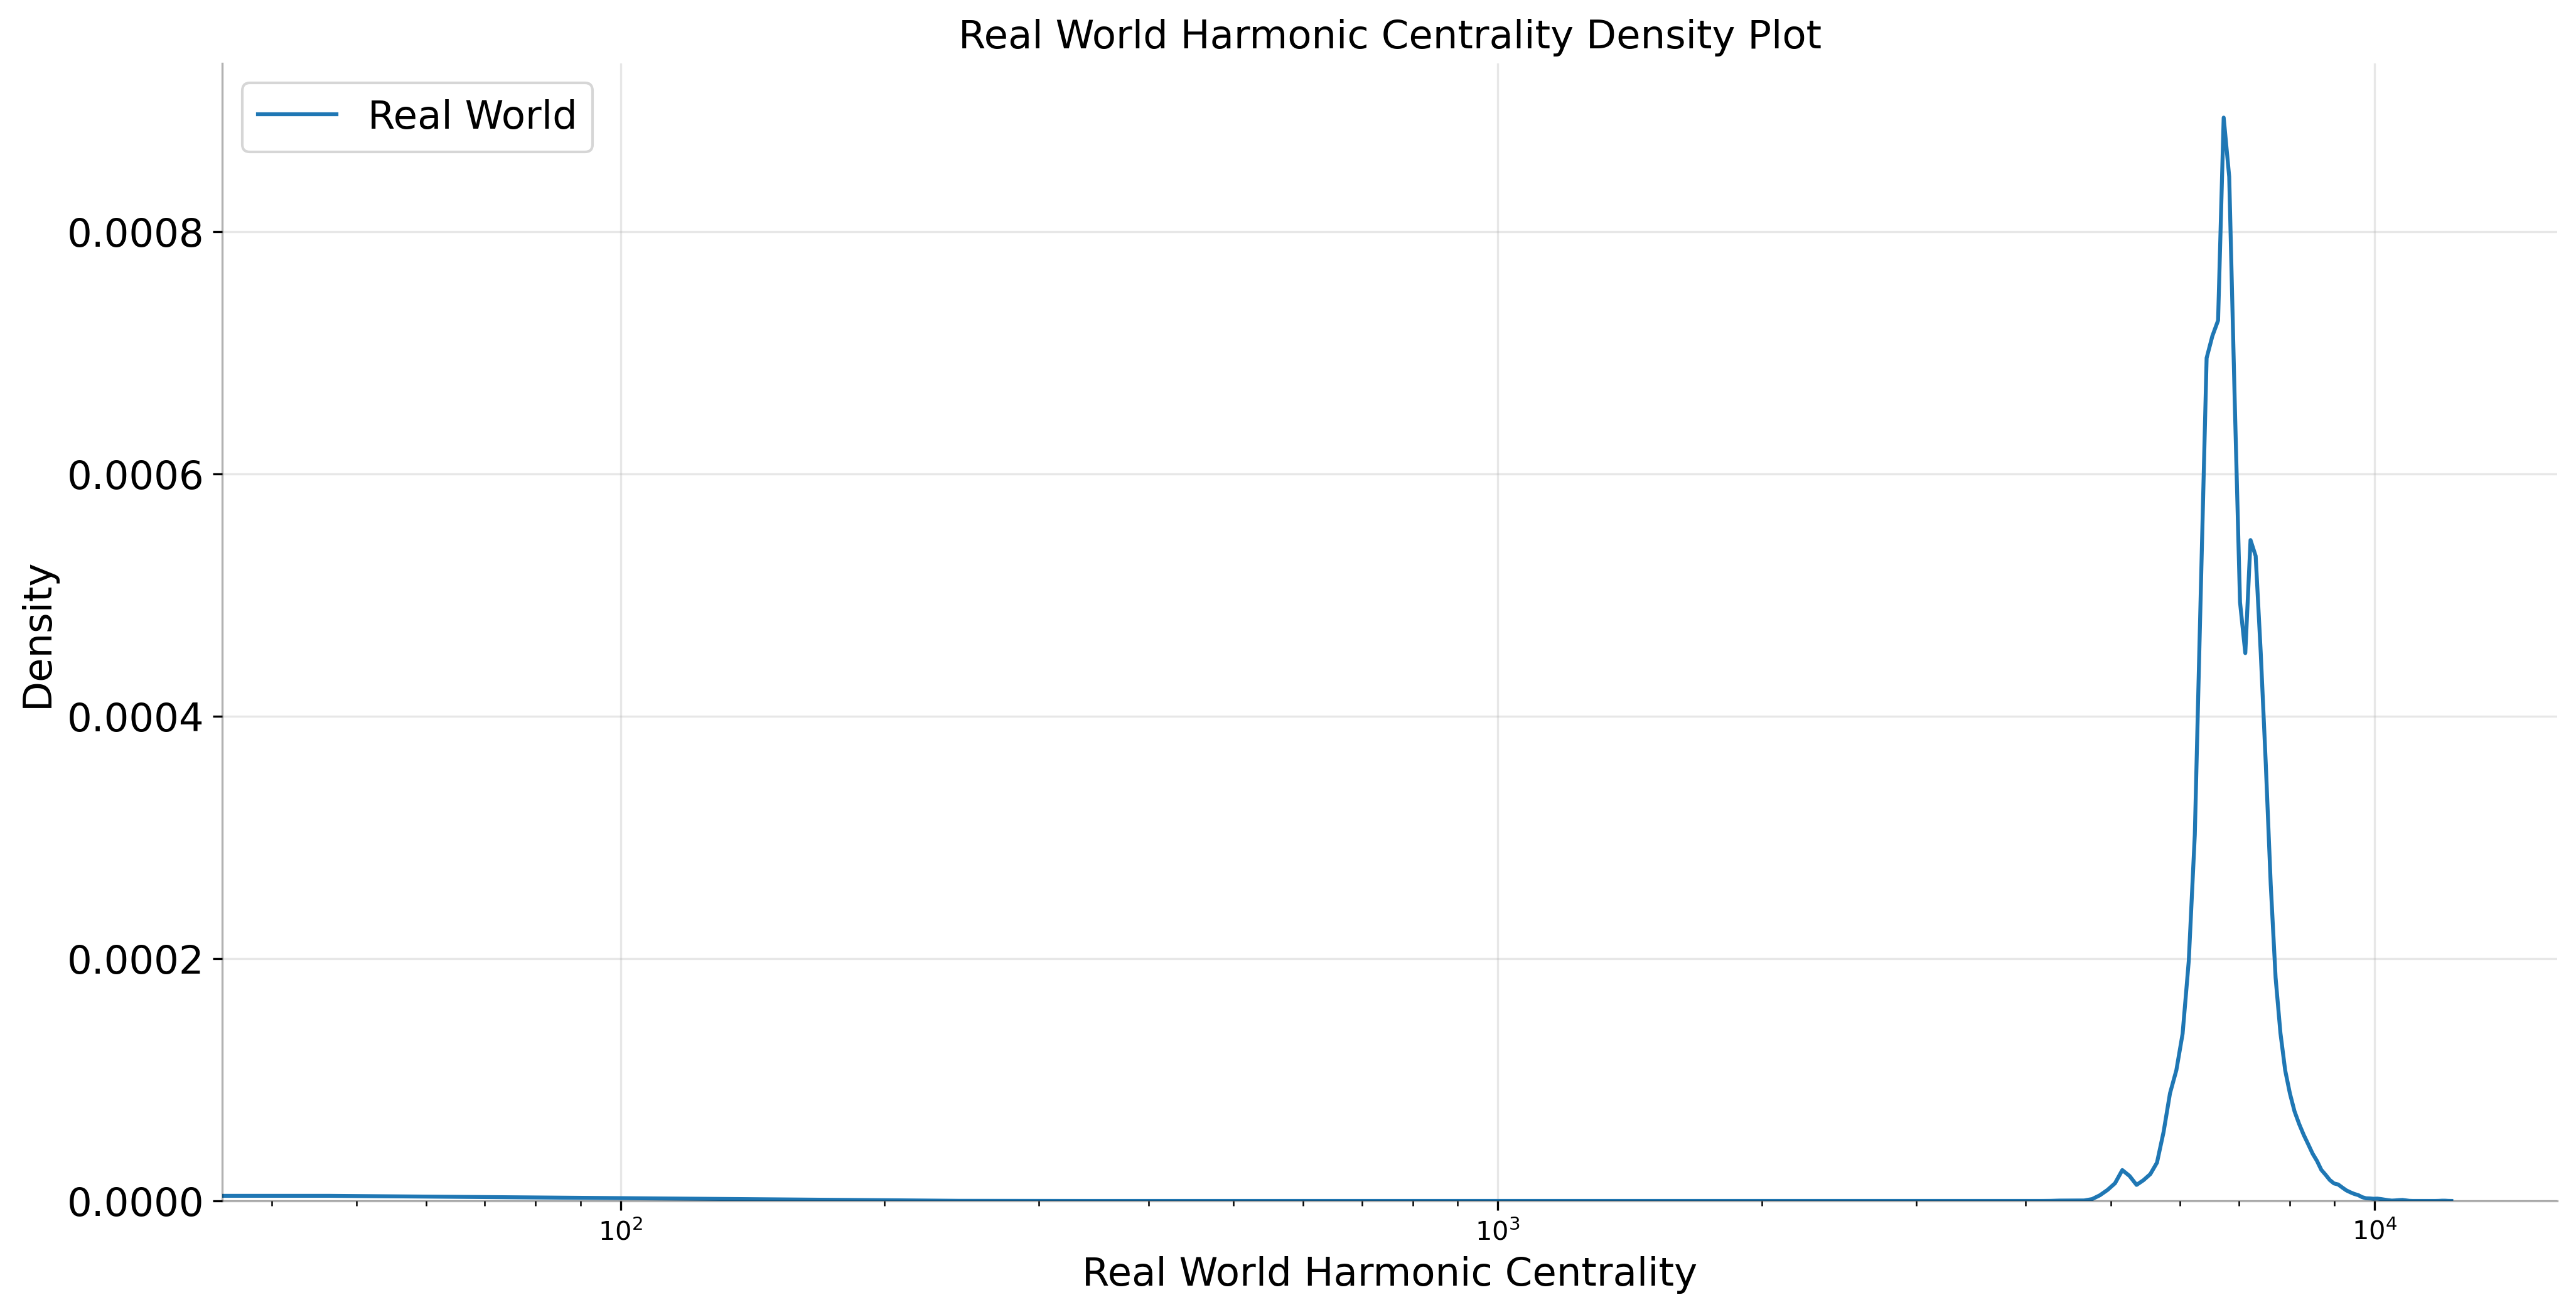

In [62]:
dist_plot(real_world_harmonic_data, "Real World Harmonic Centrality")

## Betweenness Centrality

In [63]:
betweenness_centrality = nx.betweenness_centrality(G, normalized = False)
betweenness_centrality = {k: v for k, v in sorted(betweenness_centrality.items(), key = lambda item: item[1], reverse = True)}
dict(itertools.islice(betweenness_centrality.items(), 10))# top Ten

{'9666': 27097256.839651756,
 '13169': 25332420.331793364,
 '8732': 13597213.6165269,
 '19298': 11318687.735100491,
 '10211': 8344988.050481106,
 '7777': 7486193.444143408,
 '2339': 7348411.9705283595,
 '4235': 7324192.7392715905,
 '14531': 6643401.820622386,
 '17606': 6639383.022792585}

In [64]:
betweenness_list = list(betweenness_centrality.values())

#### ER Betweenness Centrality

In [65]:
er_betweenness_centrality = nx.betweenness_centrality(er, normalized = False)
er_betweenness_centrality = {k: v for k, v in sorted(er_betweenness_centrality.items(), key = lambda item: item[1], reverse = True)}
er_betweenness_list = list(er_betweenness_centrality.values())

#### WS Betweenness Centrality

In [66]:
ws_betweenness_centrality = nx.betweenness_centrality(ws, normalized = False)
ws_betweenness_centrality = {k: v for k, v in sorted(ws_betweenness_centrality.items(), key = lambda item: item[1], reverse = True)}
ws_betweenness_list = list(ws_betweenness_centrality.values())

#### BA Betweenness Centrality

In [67]:
ba_betweenness_centrality = nx.betweenness_centrality(ba, normalized = False)
ba_betweenness_centrality = {k: v for k, v in sorted(ba_betweenness_centrality.items(), key = lambda item: item[1], reverse = True)}
ba_betweenness_list = list(ba_betweenness_centrality.values())

#### CM Betweenness Centrality

In [68]:
cm_betweenness_centrality = nx.betweenness_centrality(cm, normalized = False)
cm_betweenness_centrality = {k: v for k, v in sorted(cm_betweenness_centrality.items(), key = lambda item: item[1], reverse = True)}
cm_betweenness_list = list(cm_betweenness_centrality.values())

In [69]:
betweenness_data = {
    "real_word":{
        "name":"Real World",
        "list":betweenness_list
    },
    "erdos_renyi":{
        "name":"Erdős-Rényi",
        "list":er_betweenness_list
    },
    "watts_strogatz":{
        "name":"Watts Strogatz",
        "list":ws_betweenness_list
    },
    "barabasi–Albert":{
        "name":"Barabási Albert",
        "list":ba_betweenness_list
    },
    "configuration_model":{
        "name":"Configuration Model",
        "list":cm_betweenness_list
    }
}
real_world_betweenness_data = {
    "real_word":{
        "name":"Real World",
        "list":betweenness_list
    }
}

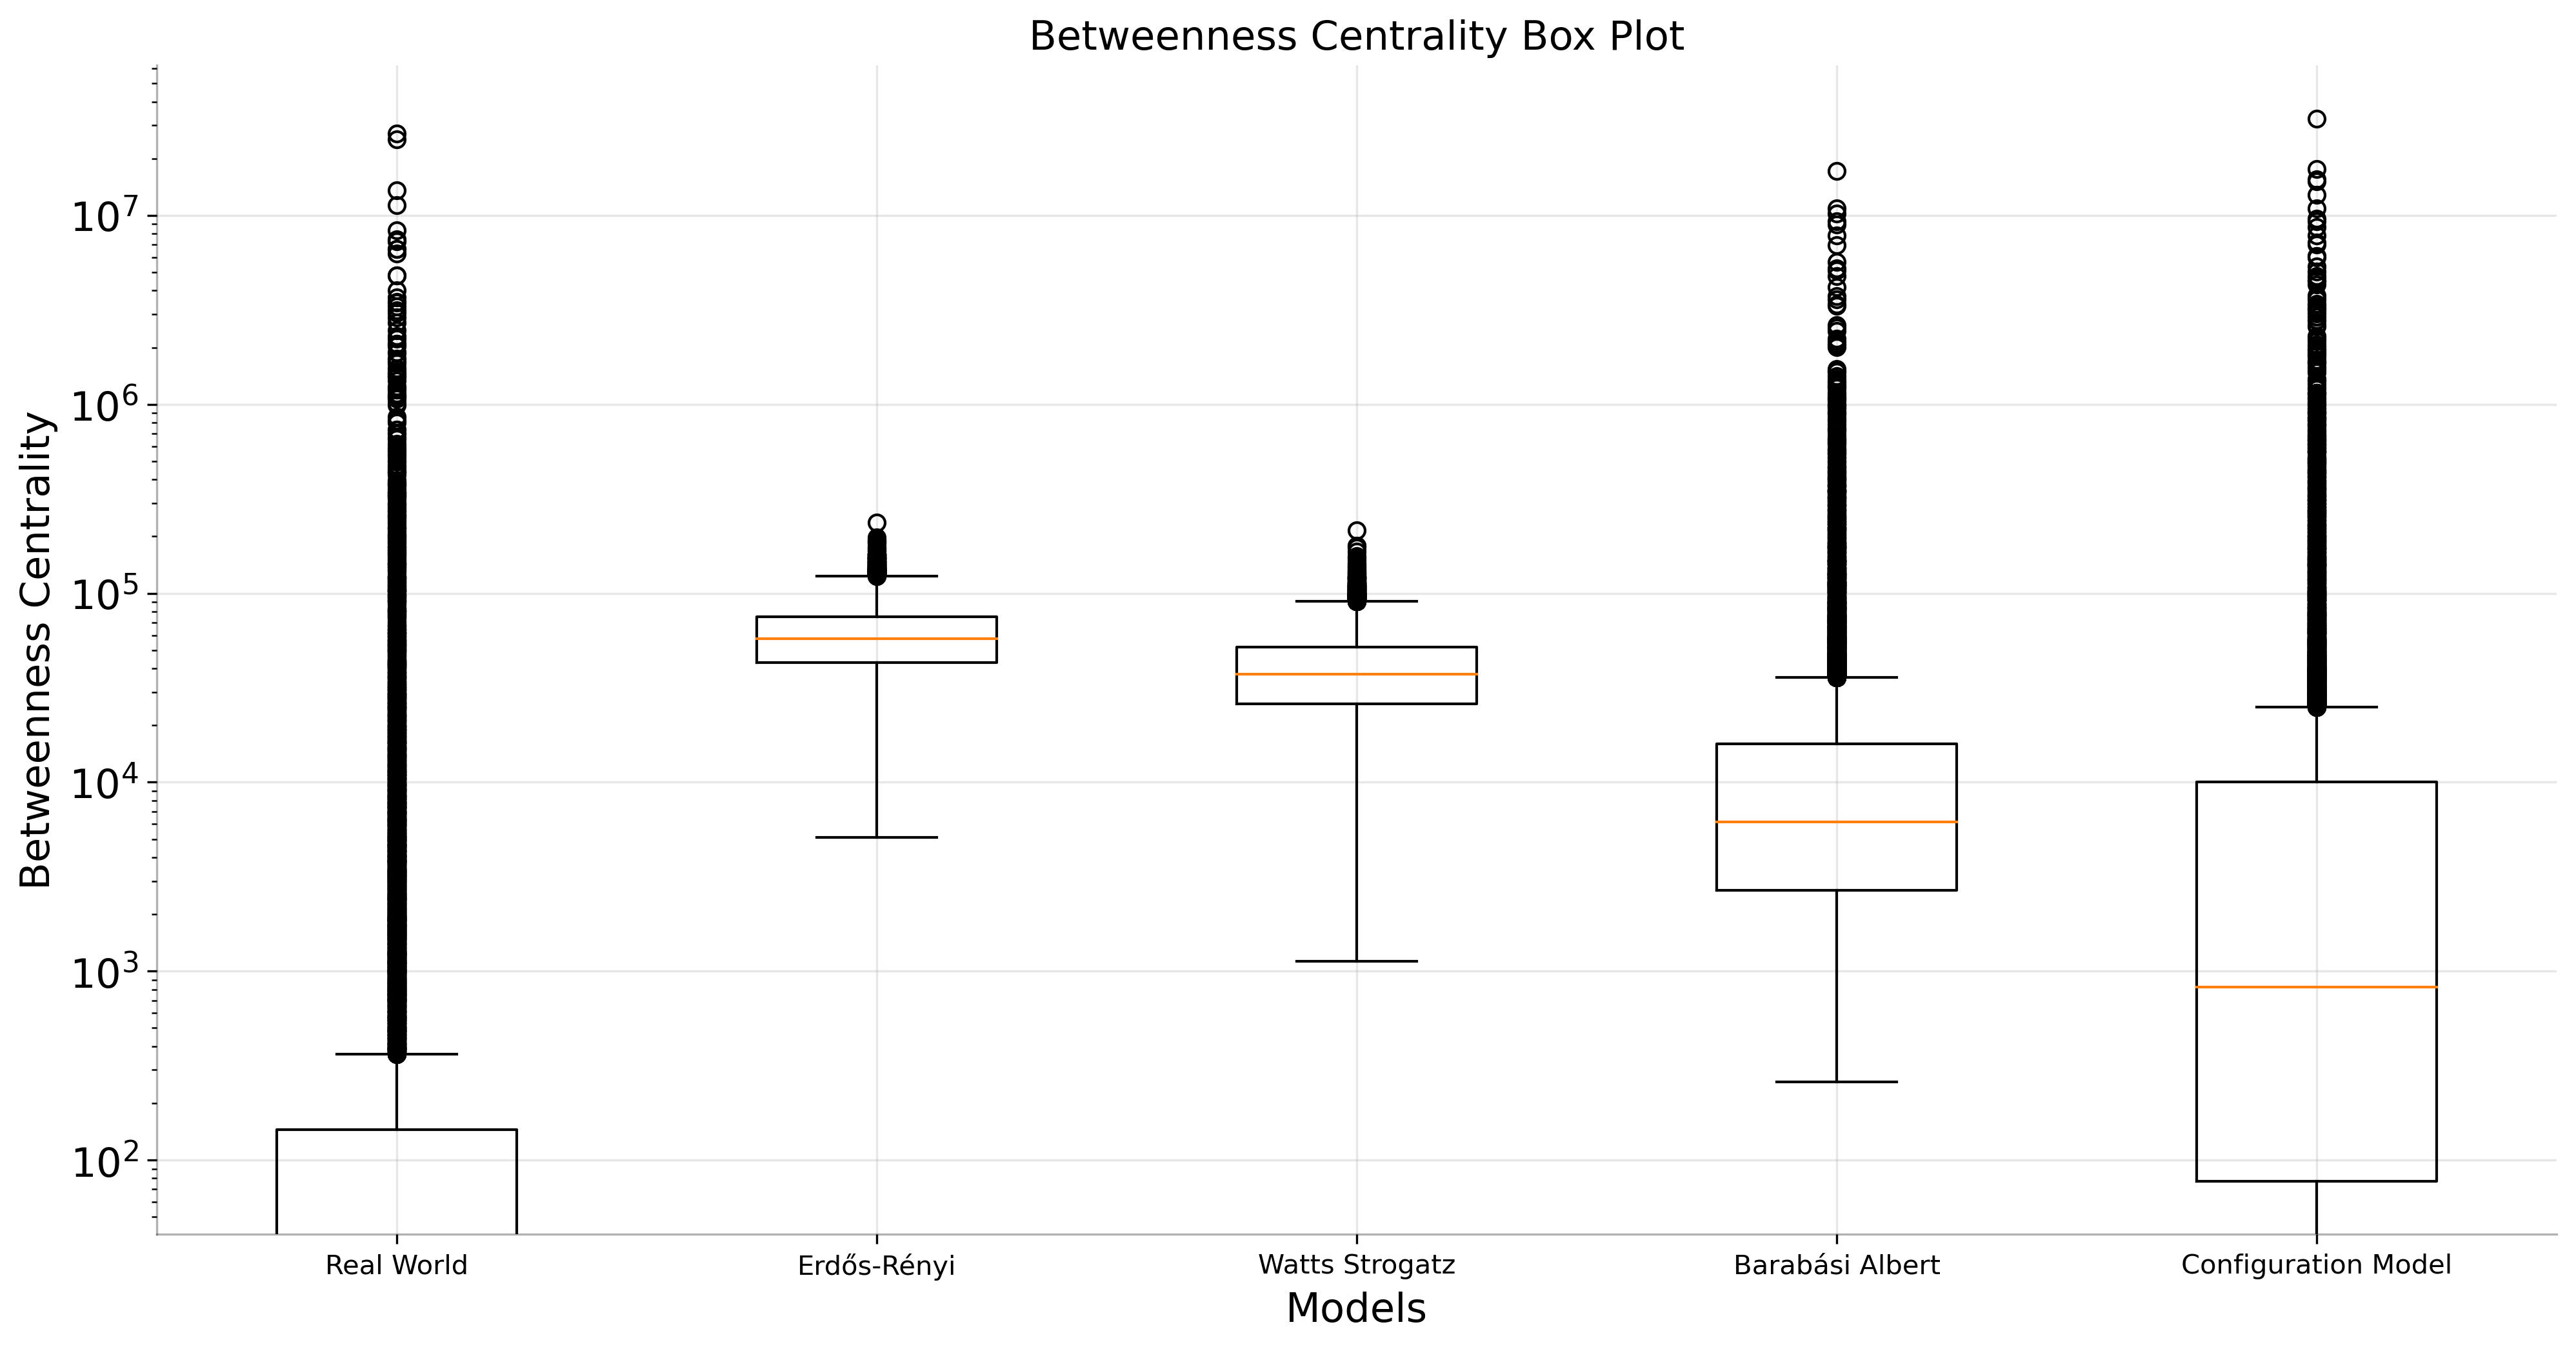

In [70]:
box_plot(betweenness_data, "Betweenness Centrality")

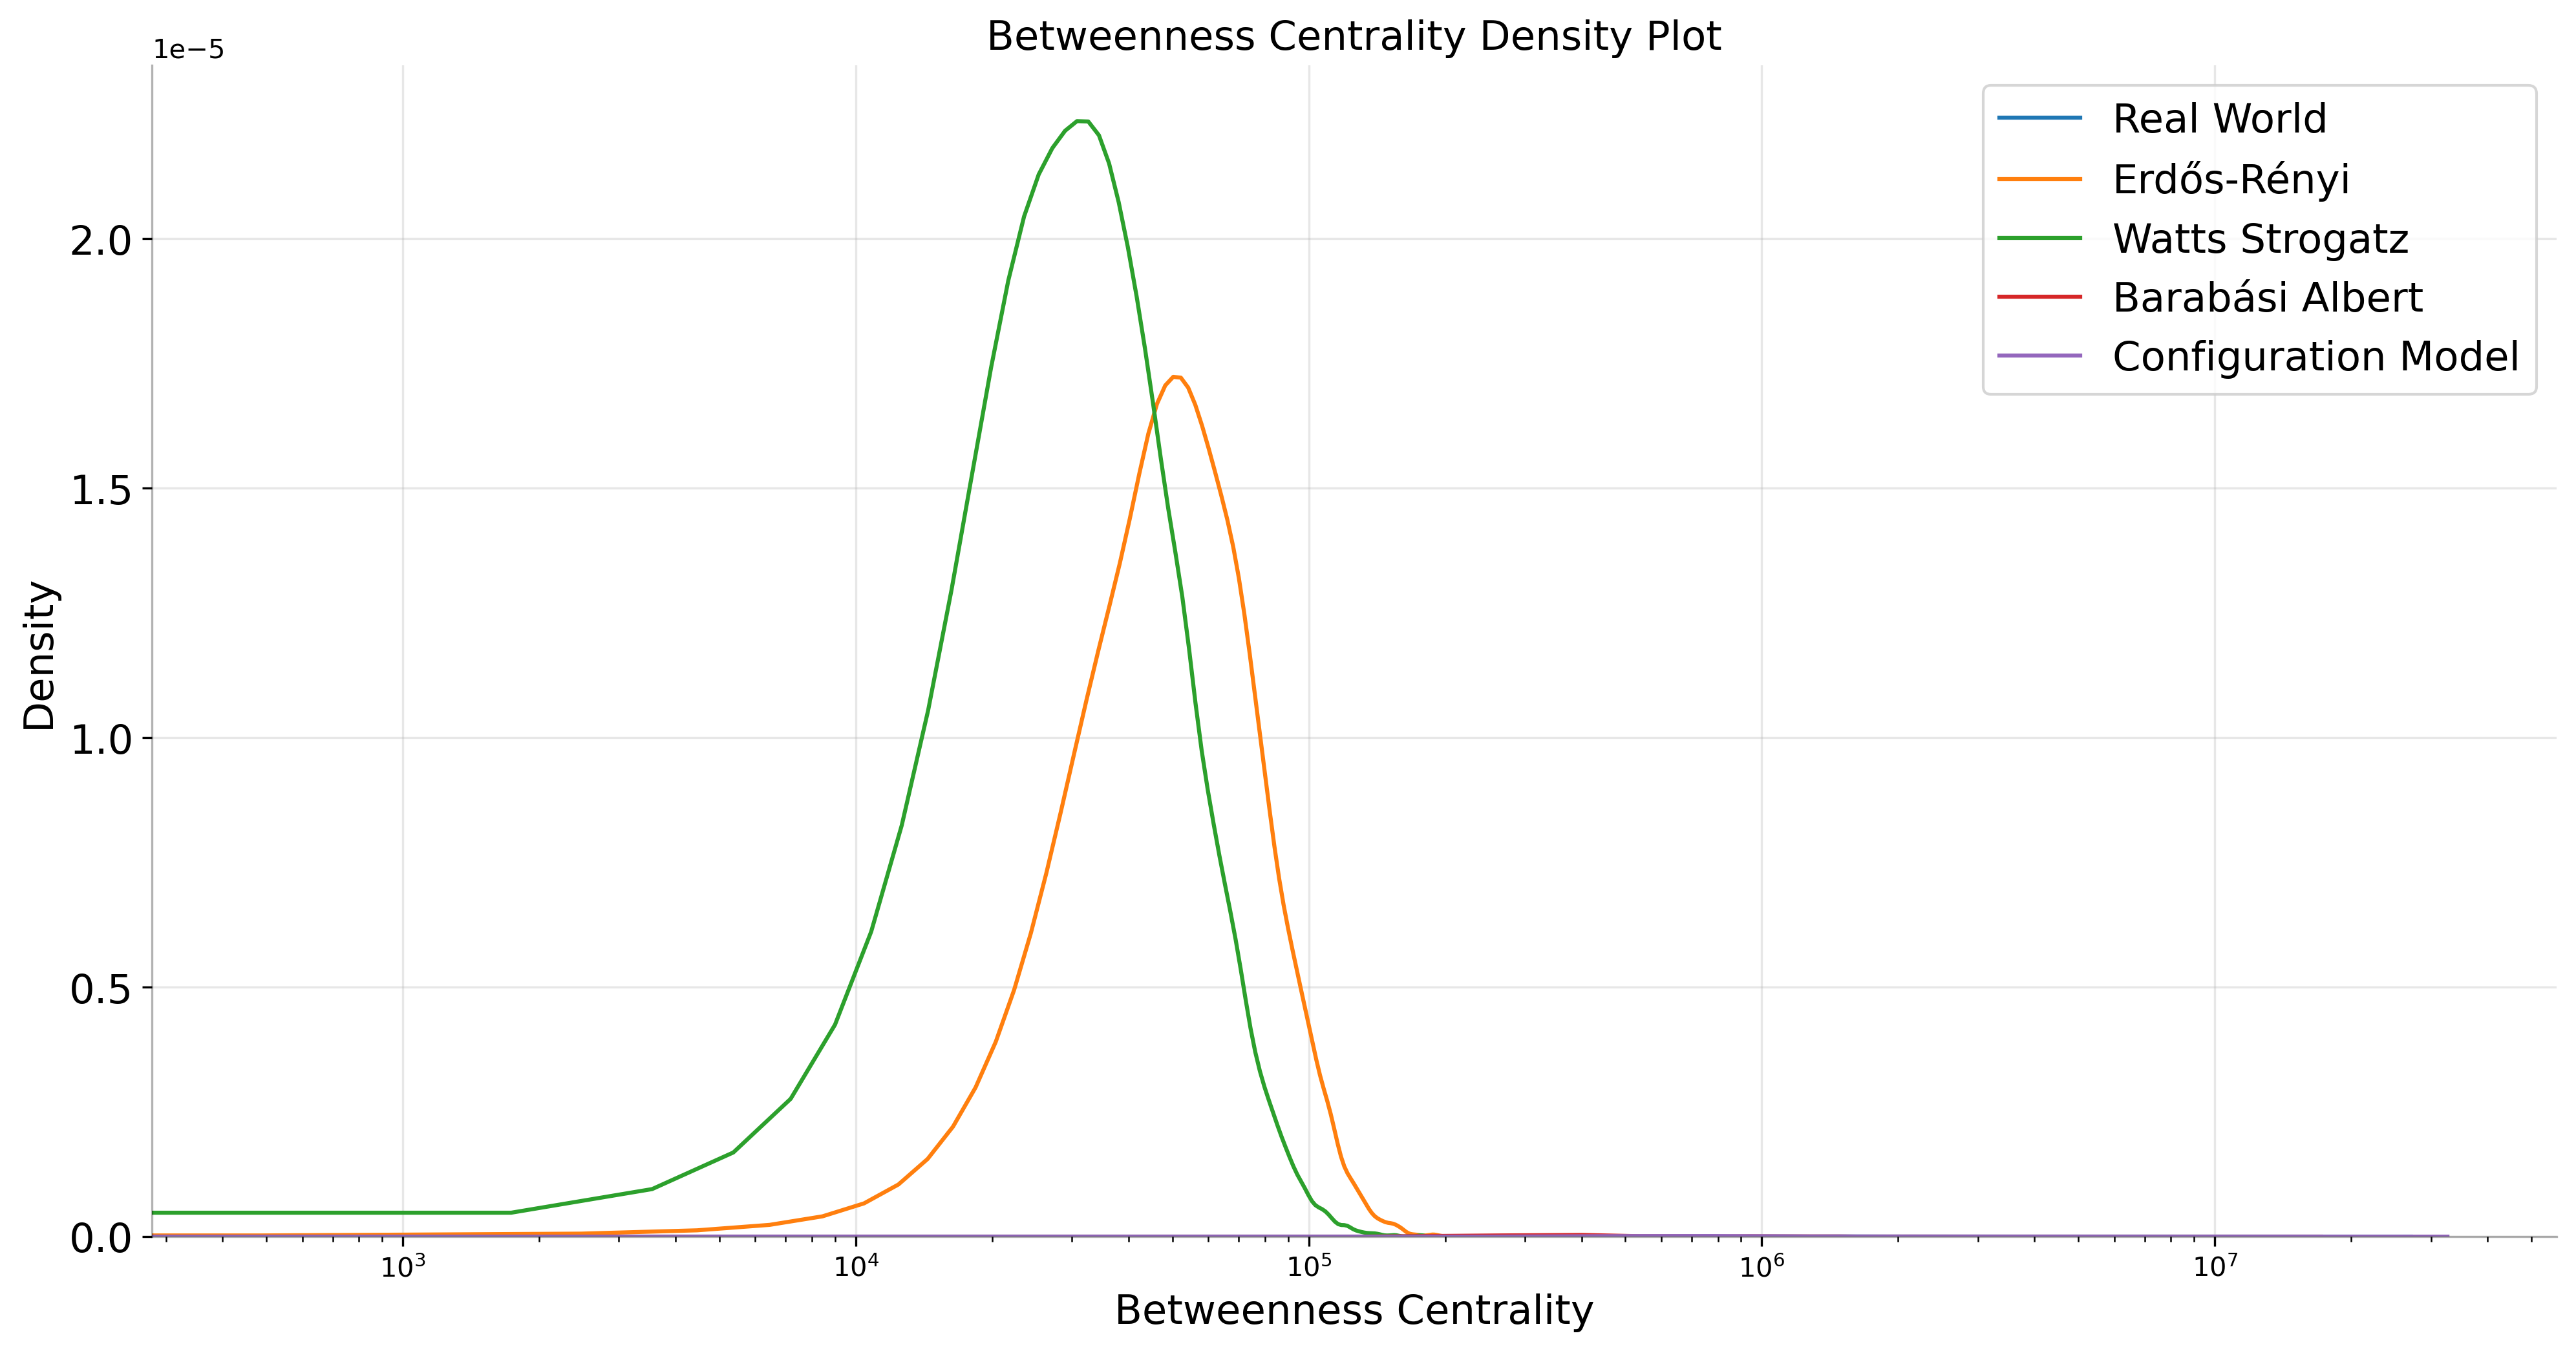

In [71]:
dist_plot(betweenness_data, "Betweenness Centrality")

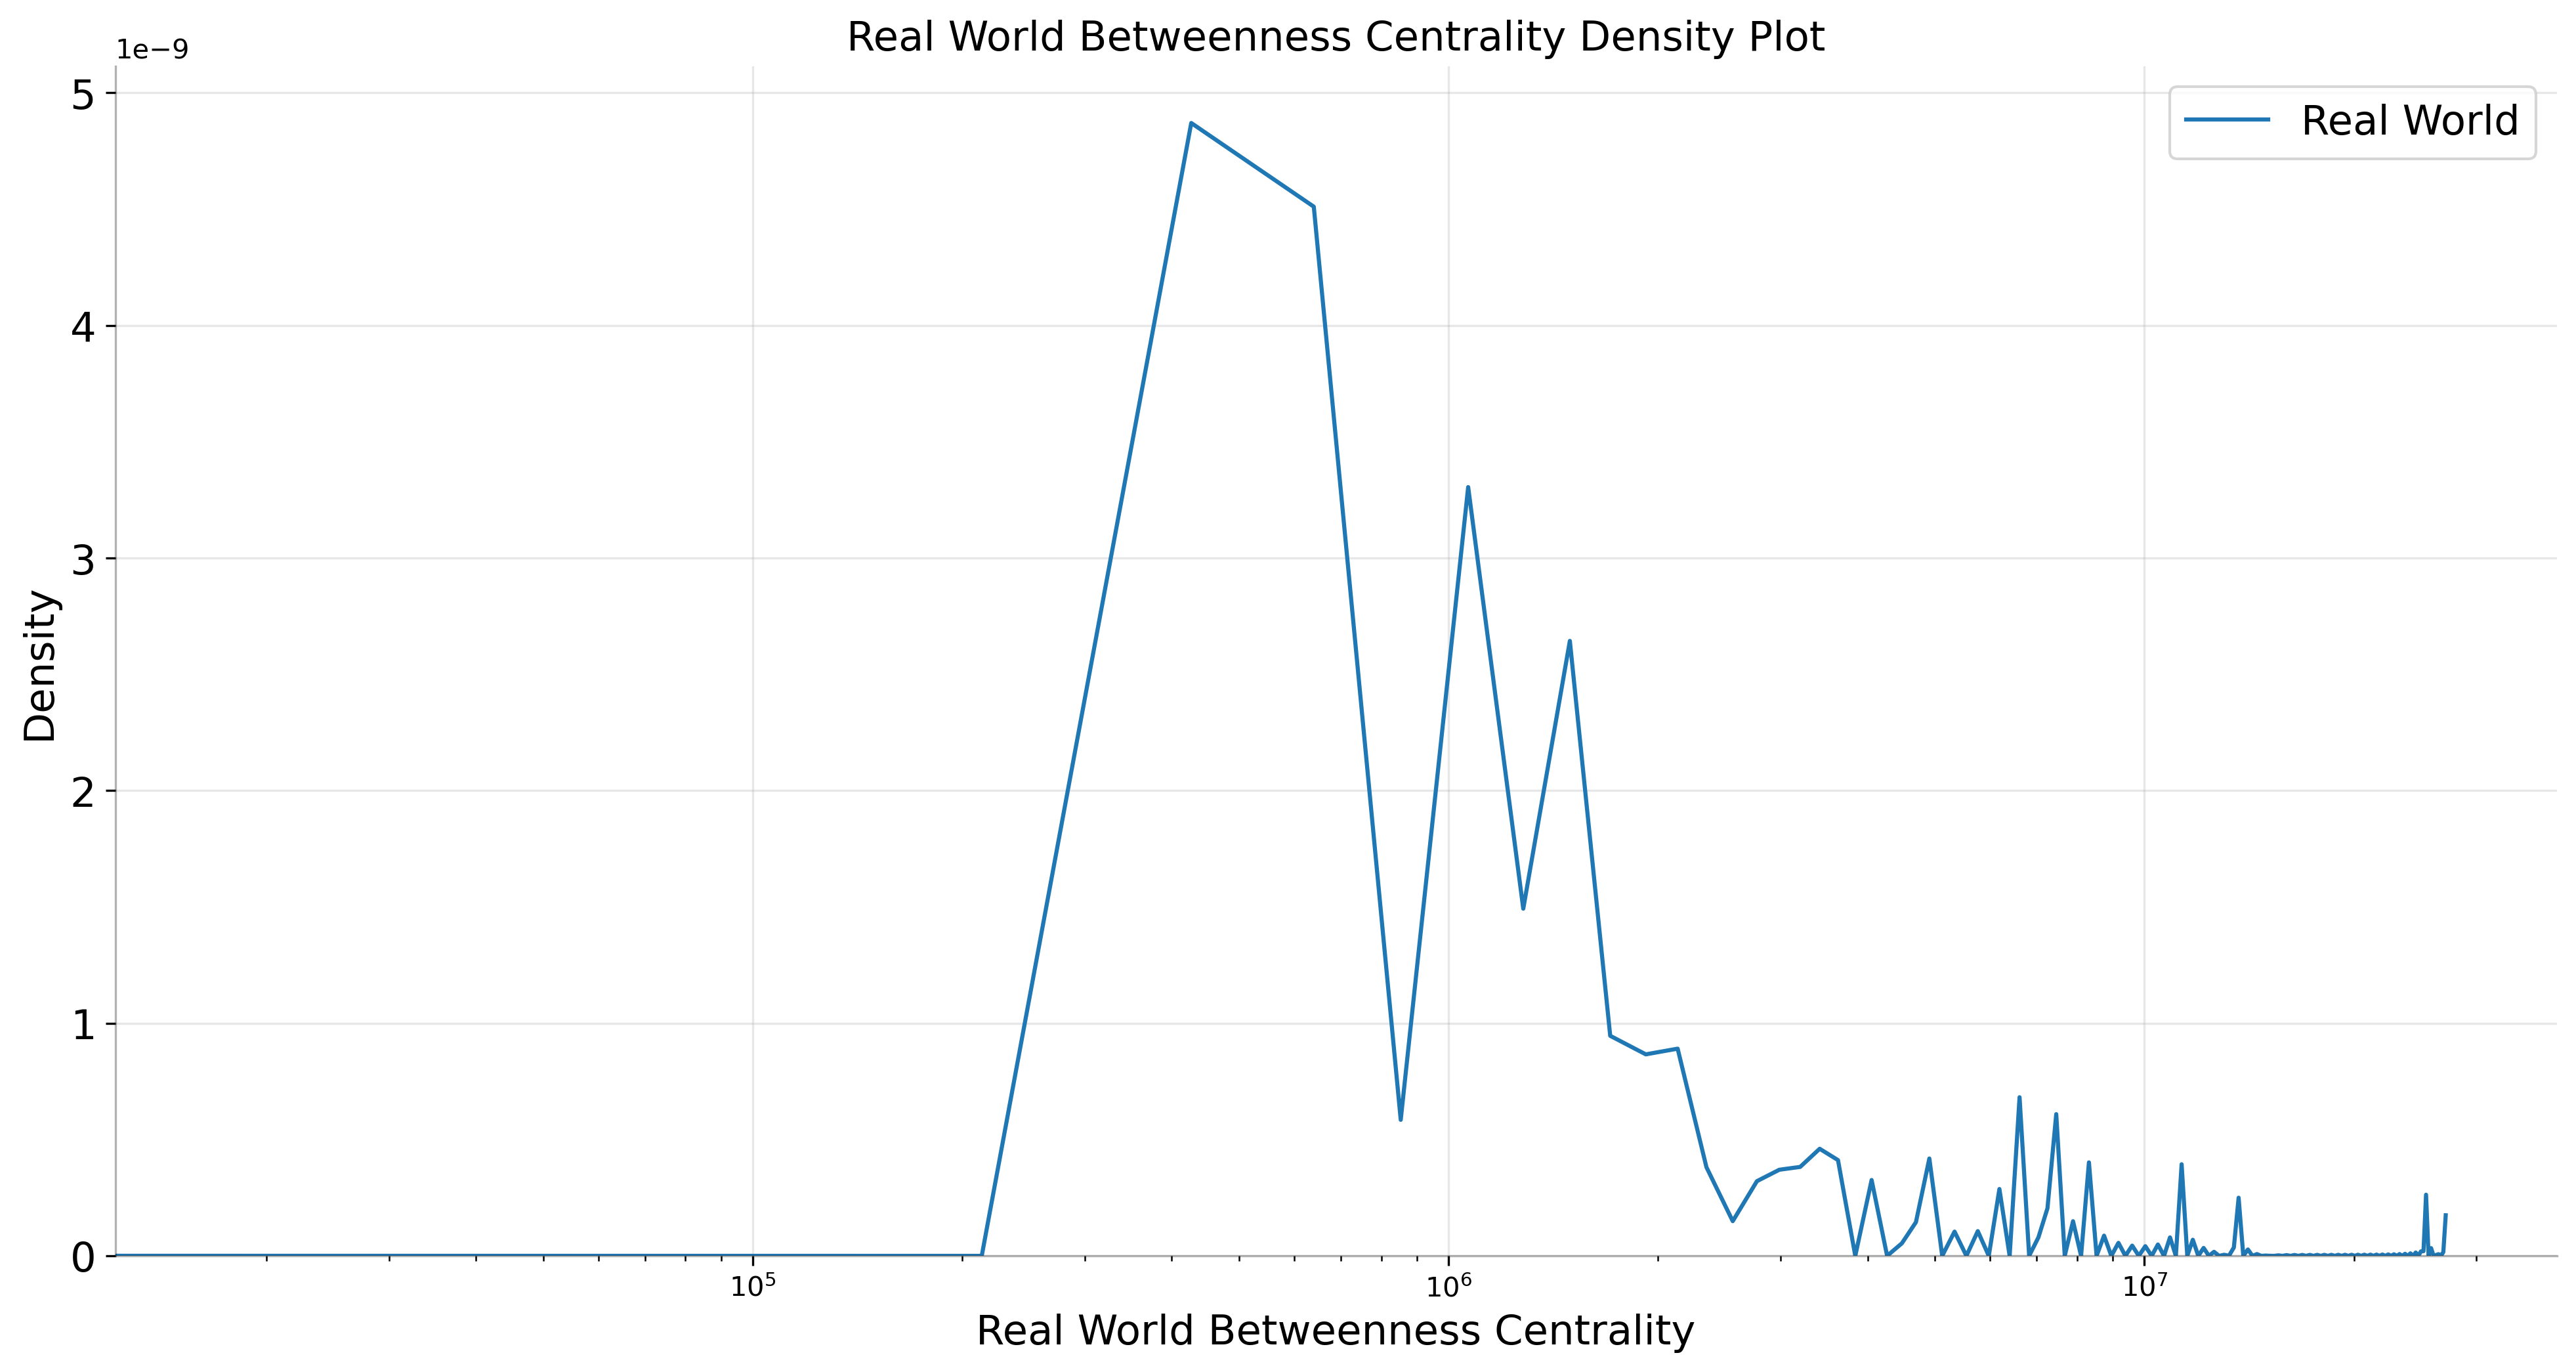

In [72]:
dist_plot(real_world_betweenness_data, "Real World Betweenness Centrality")

In [73]:
top_ten = list(page_rank_centrality.keys())[0:10]

In [74]:
page_rank_list = []
eigenvector_list = []
degree_list = []
for i in top_ten:
    page_rank_list.append(page_rank_centrality[i])
    eigenvector_list.append(eigenvector_centrality[i])
    for j in degree_sequence:
        if i != j[0]:
            continue
        else:
            degree_list.append(j[1])
top_ten = top_ten[::-1]# inverto l'ordine in modo da avere nel bar charts una visione "top to bottom"
page_rank_list = page_rank_list[::-1]
degree_list = degree_list[::-1]

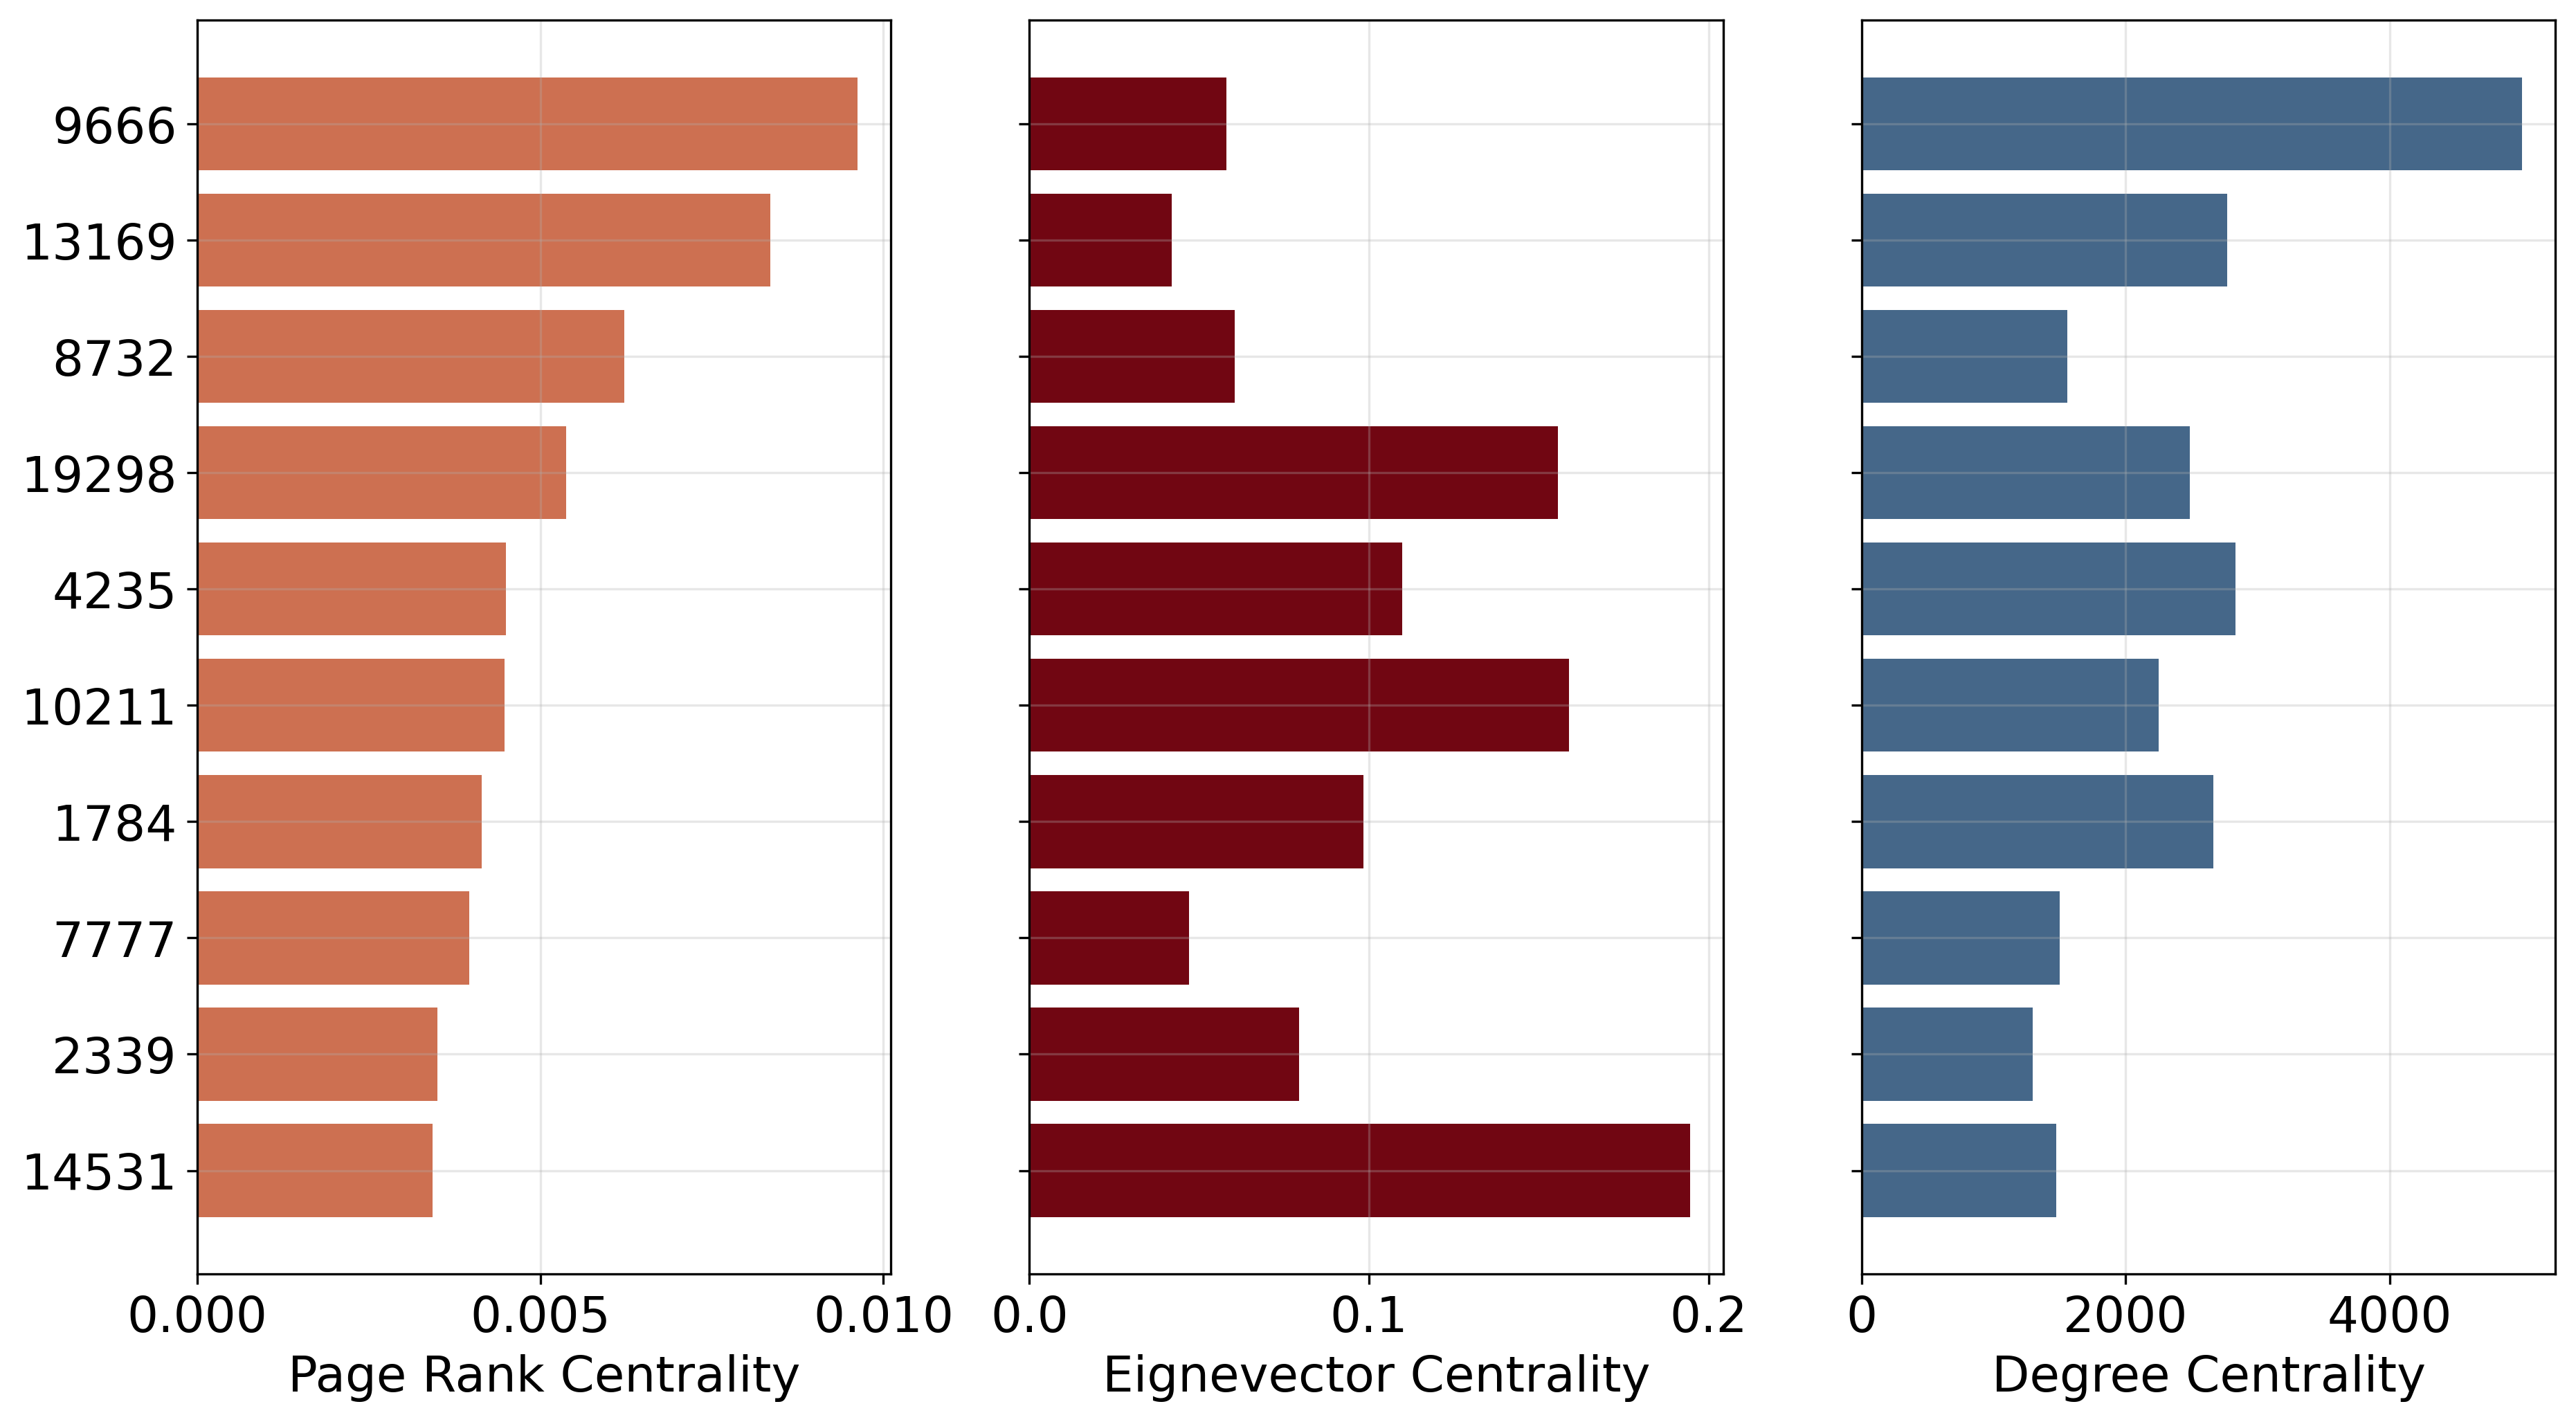

In [75]:
fig = plt.figure(figsize = (25,8), dpi = 300)

fontsize = 17
plt.rcParams.update({'font.size': fontsize})
ax = fig.add_subplot(151)
plt.barh(top_ten,page_rank_list, color = "#CD7051")
plt.grid(axis = 'both', alpha = .3)

plt.xlabel("Page Rank Centrality")

ax2 = fig.add_subplot(152)
plt.barh(top_ten,eigenvector_list, color = "#710612")
plt.grid(axis = 'both', alpha = .3)
plt.setp(ax2.get_yticklabels(), visible = False)
plt.xlabel("Eignevector Centrality")

ax3 = fig.add_subplot(153)
plt.barh(top_ten,degree_list, color = "#456789")
plt.grid(axis = 'both', alpha = .3)
plt.setp(ax3.get_yticklabels(), visible = False)
plt.xlabel("Degree Centrality")

plt.show()

In [76]:
top_ten_ = list(closeness_centrality.keys())[0:10]

In [77]:
closeness_list = []
harmonic_list = []
betweenness_list = []
for i in top_ten_:
    closeness_list.append(closeness_centrality[i])
    harmonic_list.append(harmonic_centrality[i])
    betweenness_list.append(betweenness_centrality[i])
top_ten_ = top_ten_[::-1]# inverto l'ordine in modo da avere nel bar charts una visione "top to bottom"
closeness_list = closeness_list[::-1]
harmonic_list = harmonic_list[::-1]
betweenness_list = betweenness_list[::-1]

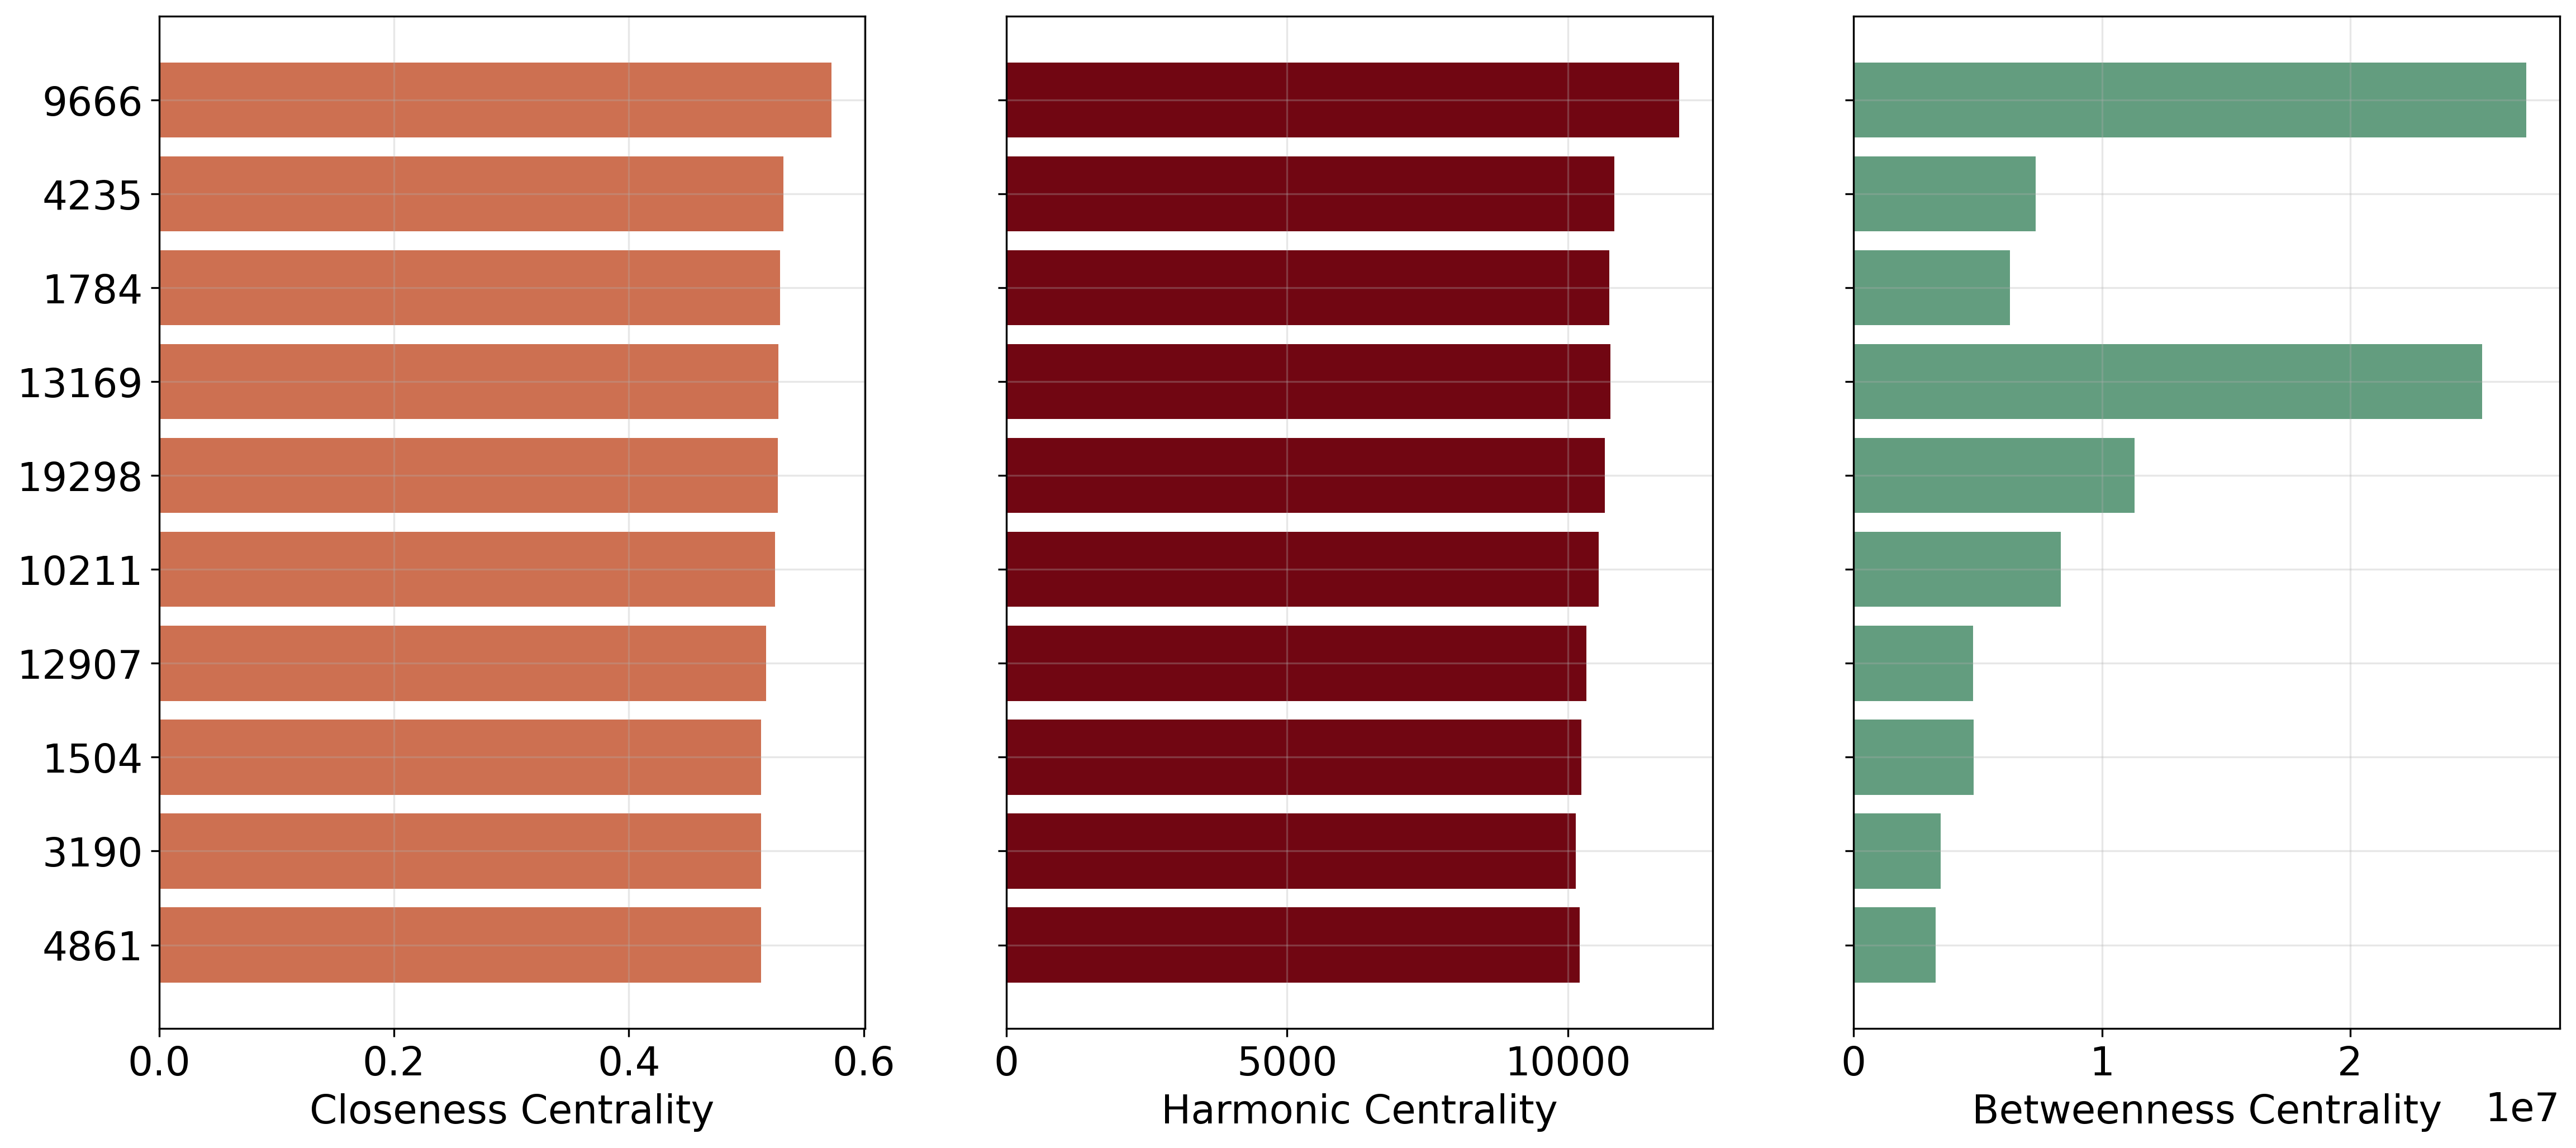

In [78]:
fig = plt.figure(figsize = (25,8), dpi = 300)

fontsize = 17
plt.rcParams.update({'font.size': fontsize})
ax = fig.add_subplot(141)
plt.barh(top_ten_,closeness_list, color = "#CD7051")
plt.grid(axis = 'both', alpha = .3)

plt.xlabel("Closeness Centrality")

ax2 = fig.add_subplot(142)
plt.barh(top_ten_,harmonic_list, color = "#710612")
plt.grid(axis = 'both', alpha = .3)
plt.setp(ax2.get_yticklabels(), visible = False)
plt.xlabel("Harmonic Centrality")


ax3 = fig.add_subplot(143)
plt.barh(top_ten_,betweenness_list, color = '#639D7F')
plt.grid(axis = 'both', alpha = .3)
plt.setp(ax3.get_yticklabels(), visible = False)
plt.xlabel("Betweenness Centrality")

plt.show()

